#### 2025 플레이브 벳지 이벤트 효과 분석
- 이벤트 기간 : 2025.02.28 ~ 2025.03.21 
- 아티스트 ID : 3207401
- 이벤트 ID : 36723
- 최근 앨범 발매 : 2025.02.03 Caligo Pt.1 (뱃지 이벤트 O)
- 전년 앨범 발매 : 2024.02.26 ASTERUM : 134-1 (뱃지 이벤트 X)
- 관련 아지트 : https://podo.agit.in/g/300093279/wall/423342418
- 뱃지 수신자 : 9,099명

#### 분석 목적 및 내용
- 플레이브 스페셜 뱃지 이벤트 효과 분석 : 이벤트 참여자수, 조건 해당자수 등. 비슷한 시기 이벤트 대비 효과적이었는지
- 해지방어효과: 해지 이후에도 재가입을 했는지  (재가입해도 뱃지 준다고 했으므로), 작년 비슷한 시기(24/2/26)와 비교해 플레이브 팬덤 가입 및 해지 변화가 있었는지 (이벤트 효과가 있었는지) 
- 기타 뱃지 이벤트 진행 시 향후 인사이트: 이번 Caligo Pt.1 이후, Pt.2 발매 시점에도 뱃지를 준다면 어떤 점을 포인트로 해야 하는지

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.4.0) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


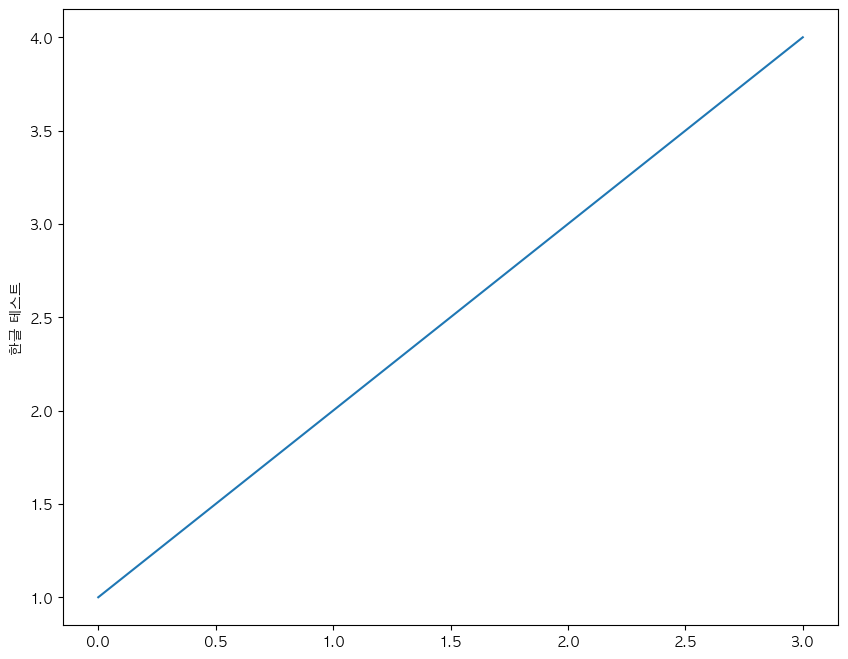

In [1]:
## import library
import trino
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable


plt.rcParams['figure.figsize'] = [10, 8]

conn = trino.dbapi.connect(
    host='kakaoent-presto-adhoc.kakaoent.io',
    port=8443,
    user='samuel-ch',
    catalog='hadoop_kent',
    schema='default',                          # 사용할 Database 지정
    http_scheme='https',
    auth=trino.auth.BasicAuthentication("samuel-ch", "melon!Q2w3e"),  # 카카오 LDAP이 아닌 하둡 LDAP 입력
    http_headers={
        'X-Presto-User': 'samuel-ch',
        'X-Presto-Time-Zone': 'Asia/Seoul'
    },
)
cur = conn.cursor()

# Set CSS properties for th elements in dataframe
th_props = [
  ('font-size', '11px'),
  ('text-align', 'center'),
  ('font-weight', 'bold'),
  ('color', '#6d6d6d'),
  ('background-color', '#f7f7f9')
  ]

# Set CSS properties for td elements in dataframe
td_props = [
  ('font-size', '11px')
  ]

# Set table styles
styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props)
  ]

cm = sns.light_palette("green", as_cmap=True)

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# AppleGothic 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'

# 테스트 플롯
plt.plot([1, 2, 3, 4])
plt.ylabel('한글 테스트')
plt.show()

## 이벤트 유입 효과 분석
- 이벤트 페이지 방문자 및 외부유입 사용자 비중 
- 이벤트 참여자 및 팬덤 사용자 유입 효과
- 동일 기간 이벤트 비교.
- 과거 플레이브 이벤트(24년 8월 뮤직웨이브,25년2월 뮤지구에이브)와 비교

In [66]:
# 동일기간 및 과거 이벤트 데이터 기준 페이지 방문자 및 이벤트 응모자 집계
event_user_query = '''
with event_df as(
select seq
         , event_id
         , parent_event_id
         , title
         , start_date
         , end_date
         , category
         , entry_target
         , winner_noti_date
         , gift_dp_name
         , case
            when event_id IN (36723,36341,36683) then 3207401
            when event_id = 36742 then 725984
            when event_id = 36746 then 468244
            when event_id = 36750 then 725984
            when event_id = 36749 then 995173
            when event_id = 36757 then 4099078
            when event_id = 36741 then 476181
            when event_id = 36740 then 647971
            when event_id = 36743 then 253688
            when event_id = 36747 then 2880278
          end artist_id  
         , case
            when event_id = 36723 then '뱃지이벤트'
            when event_id in (36742,36341,36683) then '뮤직웨이브'
            when event_id = 36746 then '에디션M'
            when event_id = 36750 then '매거진이벤트'
            when event_id = 36749 then '스포트라이트'
            when event_id = 36757 then '하이라이징'
            when event_id = 36741 then '매거진이벤트'
            when event_id = 36740 then '매거진이벤트'
            when event_id = 36743 then '매거진이벤트'
            when event_id = 36747 then '아티스트는뭘듣니'
           end event_type    
         , case
            when event_id = 36723 then 1000000386
            when event_id in (36742,36341,36683) then 1000003041
            when event_id = 36746 then 1000000498
            when event_id = 36750 then 1000000498
            when event_id = 36749 then 1000002847
            when event_id = 36757 then 1000000498
            when event_id = 36741 then 1000000498
            when event_id = 36740 then 1000000498
            when event_id = 36743 then 1000000498
            when event_id = 36747 then 1000000498
           end menu_id    
         , case
            when event_id = 36723 then '36723'
            when event_id = 36742 then '571'
            when event_id = 36746 then '15872'
            when event_id = 36750 then '15901'
            when event_id = 36749 then '152'
            when event_id = 36757 then '15911'
            when event_id = 36741 then '15893'
            when event_id = 36740 then '15892'
            when event_id = 36743 then '15894'
            when event_id = 36747 then '15897'
            when event_id in (36341,36683) then '1945'
           end conts_id  
    from HADOOP_KENT.MELON_ODS_POC_PRODUCTION.EVENT_INFO_RO 
    where melon_short_date_format(start_date) > '20240201'
    and melon_short_date_format(end_date) < '20250322'
    and entry_target = 'PROD'
    and event_id in (36723,36742,36750,36749,36757,36741,36740,36743,36747,36746,36341,36683)
    --and category = '100065' /* 이벤트 종류 (100065 : 멜론 이벤트, 100066 : 앨범이벤트, 100067 : 공연이벤트, 100068 : 뮤직스토리이벤트, 100069 : 스토리 이벤트, 100070 : 패밀리앱 이벤트, 100071 : MWK 이벤트) */
), fandom_user_df as(
    select t1.event_id
         , t1.artist_id
         , count(distinct t2.member_key) as fandom_user_cnt
    from event_df t1
    left join(
    select artist_id
         , log_date
         , member_key
    from HADOOP_KENT.MELON_MA_PROD_PRODUCTION.A_USER_ARTIST_FANDOM_TRGT_DAY 
    where (log_date between '20250228' and '20250321' or log_date between '20250203' and '20250216' or log_date between '20240820' and '20240901')
    and artist_id in (3207401,725984,4099078,476181,647971,253688,2880278,995173,468244)
    AND (CONTAINS(FANDOM_TYPE,'A')=true OR CONTAINS(FANDOM_TYPE,'B')=true OR CONTAINS(FANDOM_TYPE,'C')=true)
    group by 1,2,3
    ) t2 on t1.artist_id = t2.artist_id and t2.log_date between melon_short_date_format(t1.start_date) and melon_short_date_format(t1.end_date)
    group by 1,2
)
select t1.event_id
     , t1.title
     , t1.event_type
     , t1.start_date
     , t1.end_date
     , t1.category
     , t1.entry_target
     , t1.winner_noti_date
     , t1.gift_dp_name
     , t3.pageview_cnt
     , t3.inflow_pageview_cnt
     , t3.pageview_user_cnt
     , t3.inflow_pageview_user_cnt
     , t2.ent_user_cnt
     , t2.ent_fandom_user_cnt
     , cast(t2.ent_fandom_user_cnt as double)/cast(t2.ent_user_cnt as double)*100 as ent_fandom_user_ratio
     , t4.fandom_user_cnt
     , cast(t2.ent_fandom_user_cnt as double)/cast(t4.fandom_user_cnt as double)*100 as fandom_user_ratio
from event_df t1
left join (
    select A.event_id
         , count(A.member_key) as ent_user_cnt
         , count(if(B.member_key is not null,A.member_key)) as ent_fandom_user_cnt
    from(
        select event_id
             , member_key
             , reg_date
             , case
                when event_id IN (36723,36341,36683) then 3207401
                when event_id = 36742 then 725984
                when event_id = 36746 then 468244
                when event_id = 36750 then 725984
                when event_id = 36749 then 995173
                when event_id = 36757 then 4099078
                when event_id = 36741 then 476181
                when event_id = 36740 then 647971
                when event_id = 36743 then 253688
                when event_id = 36747 then 2880278
              end artist_id  
        from HADOOP_KENT.MELON_ODS_POC_PRODUCTION.EVENT_ENTRY_MAIN_RO 
        where (melon_short_date_format(reg_date) between '20250227' and '20250322' or melon_short_date_format(reg_date) between '20250203' and '20250216' or melon_short_date_format(reg_date) between '20240820' and '20240901')
        and event_id in (36723,36742,36750,36749,36757,36741,36740,36743,36747,36746,36341,36683)
        group by 1,2,3,4
    ) A
    left join (
        select artist_id
             , member_key
             , log_date
        from HADOOP_KENT.MELON_MA_PROD_PRODUCTION.A_USER_ARTIST_FANDOM_TRGT_DAY 
        where (log_date between '20250228' and '20250321' or log_date between '20250203' and '20250216' or log_date between '20240820' and '20240901')
        AND (CONTAINS(FANDOM_TYPE,'A')=true OR CONTAINS(FANDOM_TYPE,'B')=true OR CONTAINS(FANDOM_TYPE,'C')=true)
        group by 1,2,3
    ) B on melon_short_date_format(A.reg_date) = B.log_date and A.artist_id = B.artist_id and A.member_key = B.member_key
    left join(
        select dt
             , user_mkey
             , first_buy_no
             , buy_no
             , prod_prt_cd
             , prod_attr_cd
        from(     
        SELECT A.DT
             , A.USER_MKEY
             , A.FIRST_BUY_NO
             , A.BUY_NO
             , B.PROD_PRT_CD
             , B.prod_attr_cd
             , RANK() OVER(PARTITION BY A.USER_MKEY ORDER BY PROD_PRT_CD,prod_attr_cd) as rnk 
        FROM HADOOP_KENT.MELON_MA_STAT_PRODUCTION.F_PROD_USER_FXMT_DT A
        JOIN HADOOP_KENT.MELON_MA_STAT_PRODUCTION.D_PROD B ON (A.PROD_ID = B.PROD_ID)
        JOIN HADOOP_KENT.MELON_ODS_COMMERCE_PRODUCTION.SBY_BUY_TB_RO C ON (A.BUY_NO = C.BUY_NO)
        WHERE (A.log_date between '20250228' and '20250321' or A.log_date between '20250203' and '20250216' or A.log_date between '20240820' and '20240901')
        AND A.PROD_STAT_CD NOT IN (3401, 3901)
        AND A.DT <= A.VLD_END_DATE -- DCB 일시정지 제외
        AND B.PROD_ATTR_CD NOT IN (10040, 10050) -- 종량,기타 제외
        AND B.PROD_SELL_PRT_CD = 60000 -- B2C
        AND B.PROD_PRT_CD IN (20000,20010) -- 클럽상품,티켓상품
        AND A.PF_YN = 1
        GROUP BY 1, 2, 3, 4, 5, 6
        )
    ) C on A.member_key = C.user_mkey and date(A.reg_date) = C.dt
    group by 1
) t2 on t1.event_id = t2.event_id
LEFT JOIN (
    select B.event_id
         , count(distinct A.member_key) as pageview_user_cnt
         , count(1) as pageview_cnt
         , count(distinct if(inflow_prt_nm is not null, A.member_key )) as inflow_pageview_user_cnt
         , sum(if(inflow_prt_nm is not null, 1,0 )) as inflow_pageview_cnt
    from hadoop_kent.melon_ods_stat_production.o_pv_log_ro A
    join event_df B on A.conts_id = B.conts_id and A.reg_date between B.start_date and B.end_date and A.menu_id = B.menu_id
    LEFT JOIN HADOOP_KENT.MELON_MA_STAT_PRODUCTION.D_INFLOW_PRT C ON A.INFLOW_PLACE_CODE = C.INFLOW_PRT_CODE
    where (A.log_date between '20250228' and '20250321' or A.log_date between '20240820' and '20240901')
    and (melon_short_date_format(A.reg_date) between '20250227' and '20250322' or melon_short_date_format(A.reg_date) between '20240820' and '20240901')
    and A.menu_id in (1000000498,1000002847,1000000386,1000003041)
    group by 1
    union all /* 24년12월 ~ 25년2월 뮤직웨이브 데이터 누락으로 티아라로그로 대체 */
    select 36683 as event_id
         , count(distinct t1.member_key) as pageview_user_cnt
         , sum(pageview_cnt) as pageview_cnt
         , count(distinct t2.member_Key) as inflow_pageview_user_cnt
         , sum(t2.inflow_pageview_cnt) as inflow_pageview_cnt
    from(
        SELECT member_key
             , count(1) as pageview_cnt
        FROM HADOOP_KENT.MELON_DA_STAT_PRODUCTION.NEW_TIARA_PAGEVIEW_MUSICWAVE
        WHERE LOG_DATE BETWEEN CAST('20250203' AS VARCHAR(8)) AND CAST('20250216' AS VARCHAR(8))
        and channel_key ='artistrep_3207401'
        group by 1
    ) t1
    left join(
        select TRY_CAST(USER.MELON_ID AS BIGINT) AS MEMBER_KEY
             , count(1) as inflow_pageview_cnt
        FROM HADOOP_KENT.MELON_IDENTIFIED_PRODUCTION.TIARA_IDENTIFIED_FORMATTED_V2
        WHERE LOG_DATE BETWEEN CAST('20250203' AS VARCHAR(8)) and CAST('20250216' AS VARCHAR(8))
        AND sdk.type IN ('IA','AA')	
        and COMMON.PAGE = '유입'
        and lower(common.t_obj) like '%plave%'	 
        group by 1
    ) t2 on t1.member_key = t2.member_key
group by 1
) t3 on t1.event_id = t3.event_id
left join fandom_user_df t4 on t1.event_id = t4.event_id and t1.artist_id = t4.artist_id
order by ent_user_cnt desc
'''

cur.execute(event_user_query)

results = cur.fetchall()
colnames = [part[0] for part in cur.description]

event_user_df = pd.DataFrame(results, columns=colnames)

cur.cancel()
conn.close()
event_user_df.head()

IndexError: list index out of range

In [2]:
# pandas를 사용하여 CSV 파일 로드
import pandas as pd

# CSV 파일 경로
csv_file_path = "event_user_data_3.csv"

# CSV 파일 읽기
try:
    event_user_data = pd.read_csv(csv_file_path)
    print("CSV 파일이 성공적으로 로드되었습니다.")
    print(event_user_data.head())  # 데이터 미리보기
except FileNotFoundError:
    print(f"파일을 찾을 수 없습니다: {csv_file_path}")
except Exception as e:
    print(f"CSV 파일 로드 중 오류 발생: {e}")

CSV 파일이 성공적으로 로드되었습니다.
   event_id                  title event_type               start_date  \
0     36683  PLAVE(플레이브) 뮤직웨이브 이벤트      뮤직웨이브  2025-02-03 18:00:00.000   
1     36723    평생 PLAVE 마이획득뱃지 이벤트      뱃지이벤트  2025-02-28 12:00:00.000   
2     36341        PLAVE 뮤직웨이브 이벤트      뮤직웨이브  2024-08-20 18:00:00.000   
3     36742       j-hope 뮤직웨이브 이벤트      뮤직웨이브  2025-03-07 12:00:00.000   
4     36750          j-hope 댓글 이벤트     매거진이벤트  2025-03-07 14:00:00.000   

                  end_date  category entry_target         winner_noti_date  \
0  2025-02-16 23:59:59.000    100065         PROD  2025-02-25 12:00:00.000   
1  2025-03-21 23:59:59.000    100065         PROD  2025-04-30 00:00:00.000   
2  2024-09-01 23:59:59.000    100065         PROD  2024-09-09 15:00:00.000   
3  2025-03-21 23:59:59.000    100065         PROD  2025-04-03 12:00:00.000   
4  2025-03-21 23:59:59.000    100068         PROD  2025-03-28 12:00:00.000   

         gift_dp_name  pageview_cnt  ...  pageview_user_cnt  \


In [4]:
event_user_data.columns

Index(['event_id', 'title', 'event_type', 'start_date', 'end_date', 'category',
       'entry_target', 'winner_noti_date', 'gift_dp_name', 'pageview_cnt',
       'pageview_fandom_cnt', 'inflow_pageview_cnt',
       'inflow_pageview_fandom_cnt', 'pageview_user_cnt',
       'inflow_pageview_user_cnt', 'pageview_fandom_user_cnt',
       'inflow_pageview_fandom_user_cnt', 'ent_user_cnt',
       'ent_fandom_user_cnt', 'ent_normal_user_cnt', 'ent_fandom_user_ratio',
       'fandom_user_cnt', 'fandom_user_ratio'],
      dtype='object')

In [ ]:
event_user_data['ent_normal_user_cnt'] = event_user_data['ent_user_cnt'] - event_user_data['ent_fandom_user_cnt']
event_user_data['ent_user_ratio'] = event_user_data['ent_user_cnt']/event_user_data['pageview_user_cnt']*100
event_user_data['ent_fandom_user_ratio'] = event_user_data['ent_fandom_user_cnt']/event_user_data['pageview_fandom_user_cnt']*100

In [3]:
event_user_data

,event_id,title,event_type,start_date,end_date,category,entry_target,winner_noti_date,gift_dp_name,pageview_cnt,...,pageview_user_cnt,inflow_pageview_user_cnt,pageview_fandom_user_cnt,inflow_pageview_fandom_user_cnt,ent_user_cnt,ent_fandom_user_cnt,ent_normal_user_cnt,ent_fandom_user_ratio,fandom_user_cnt,fandom_user_ratio
0,36683,PLAVE(플레이브) 뮤직웨이브 이벤트,뮤직웨이브,2025-02-03 18:00:00.000,2025-02-16 23:59:59.000,100065,PROD,2025-02-25 12:00:00.000,프라이빗 메시지 20명,245749,...,39802,11525,20301,9490,17523,15526,1997,88.603550,56393,27.531786
1,36723,평생 PLAVE 마이획득뱃지 이벤트,뱃지이벤트,2025-02-28 12:00:00.000,2025-03-21 23:59:59.000,100065,PROD,2025-04-30 00:00:00.000,'평생 PLAVE' 마이획득뱃지,150113,...,33468,3547,16497,3367,16978,14754,2224,86.900695,57881,25.490230
2,36341,PLAVE 뮤직웨이브 이벤트,뮤직웨이브,2024-08-20 18:00:00.000,2024-09-01 23:59:59.000,100065,PROD,2024-09-09 15:00:00.000,사인 컨셉 포토 (5명),129024,...,28099,2857,17836,2249,14842,12776,2066,86.080043,42254,30.236191
3,36742,j-hope 뮤직웨이브 이벤트,뮤직웨이브,2025-03-07 12:00:00.000,2025-03-21 23:59:59.000,100065,PROD,2025-04-03 12:00:00.000,미공개 독점 사인 포토 3장,116703,...,25288,229,3675,98,6275,2590,3685,41.274900,7263,35.660196
4,36750,j-hope 댓글 이벤트,매거진이벤트,2025-03-07 14:00:00.000,2025-03-21 23:59:59.000,100068,PROD,2025-03-28 12:00:00.000,사인 포토 5명,40361,...,24371,46,2011,26,2882,999,1883,34.663428,7263,13.754647
5,36749,[스포트라이트] 제니 [Ruby] 발매 이벤트,스포트라이트,2025-03-07 00:00:00.000,2025-03-20 23:59:59.000,100065,PROD,2025-03-27 18:00:00.000,사인CD (30명),44632,...,30313,2564,637,161,2312,236,2076,10.207612,3573,6.605094
6,36757,KiiiKiii (키키) 댓글 이벤트 #1,하이라이징,2025-03-12 18:00:00.000,2025-03-18 23:59:59.000,100068,PROD,2025-03-20 14:00:00.000,데뷔 쇼케이스 초대권 50명 (1인 1매),26208,...,15224,2406,388,232,1932,243,1689,12.577640,1178,20.628183
7,36741,인피니트 댓글 이벤트,매거진이벤트,2025-03-06 18:00:00.000,2025-03-20 23:59:59.000,100068,PROD,2025-03-27 12:00:00.000,사인 CD 10명,19594,...,11571,252,1152,176,1065,568,497,53.333333,6283,9.040267
8,36740,비투비 댓글 이벤트,매거진이벤트,2025-03-05 18:00:00.000,2025-03-19 23:59:59.000,100068,PROD,2025-03-26 12:00:00.000,사인 CD + 미공개 단체 인화 사진 10명,14760,...,9070,20,710,11,786,275,511,34.987277,9492,2.897177
9,36743,Lady Gaga 댓글 이벤트,매거진이벤트,2025-03-07 12:00:00.000,2025-03-21 23:59:59.000,100068,PROD,2025-03-28 12:00:00.000,CD 10명,19692,...,15029,2,19,0,749,5,744,0.667557,608,0.822368


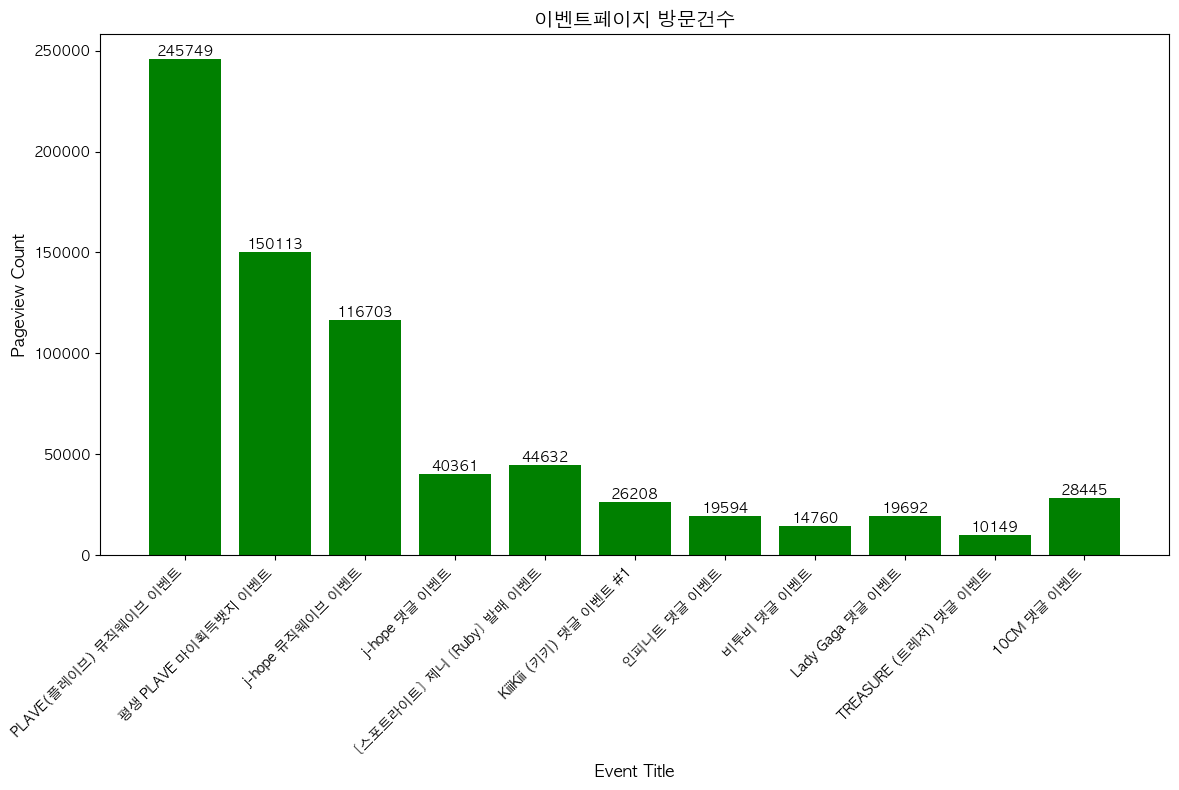

In [6]:
# 2025년도 이벤트 필터링
event_user_data['start_date'] = pd.to_datetime(event_user_data['start_date'])  # 날짜 형식 변환
events_2025 = event_user_data[event_user_data['start_date'].dt.year == 2025]  # 2025년도 필터링

# 이벤트별 pageview_cnt 시각화
plt.figure(figsize=(12, 8))
bars = plt.bar(events_2025['title'], events_2025['pageview_cnt'], color='green')

# 데이터 라벨 추가
for bar, value in zip(bars, events_2025['pageview_cnt']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value}', 
             ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Event Title', fontsize=12)
plt.ylabel('Pageview Count', fontsize=12)
plt.title('이벤트페이지 방문건수', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

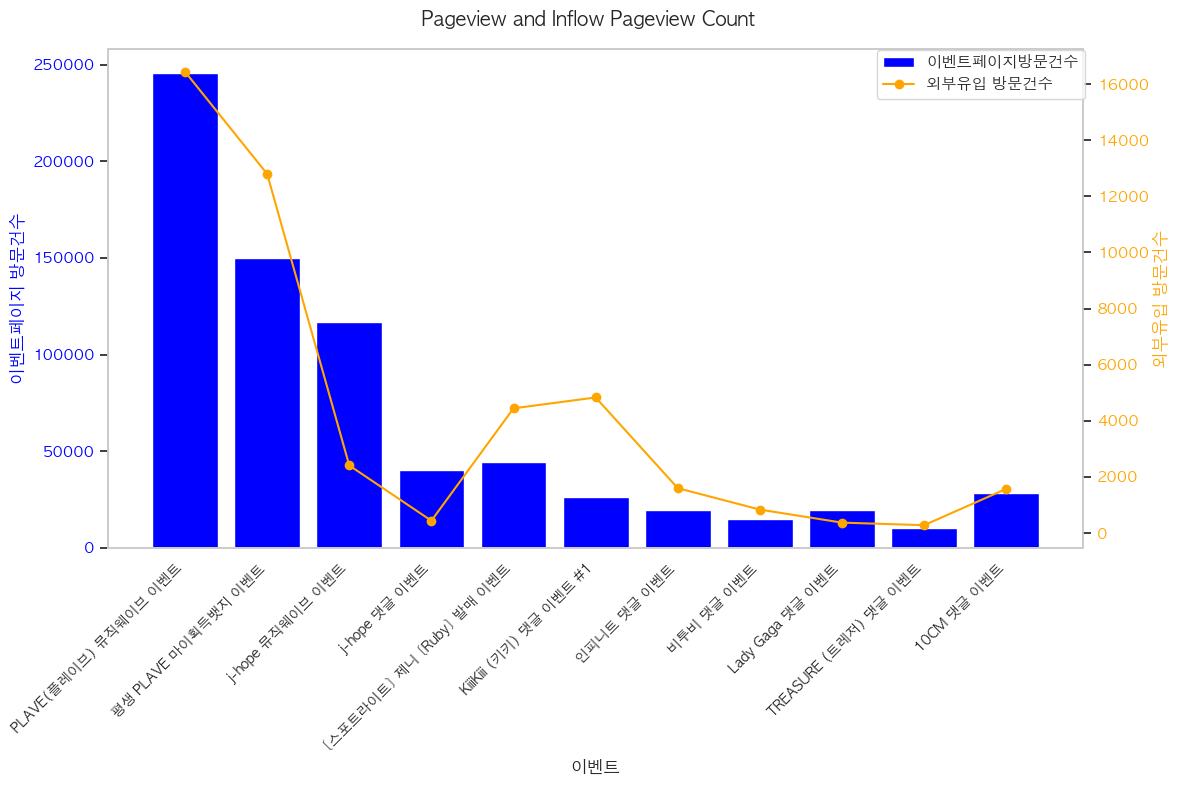

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# 2025년도 이벤트 필터링
event_user_data['start_date'] = pd.to_datetime(event_user_data['start_date'])  # 날짜 형식 변환
events_2025 = event_user_data[event_user_data['start_date'].dt.year == 2025]  # 2025년도 필터링

# 이벤트별 데이터
titles = events_2025['title']
pageview_cnt = events_2025['pageview_cnt']
inflow_pageview_cnt = events_2025['inflow_pageview_cnt']

# 그래프 생성
fig, ax1 = plt.subplots(figsize=(12, 8))

# 첫 번째 y축: pageview_user_cnt
ax1.bar(titles, pageview_cnt, color='blue', label='이벤트페이지방문건수')
ax1.set_xlabel('이벤트', fontsize=12)
ax1.set_ylabel('이벤트페이지 방문건수', fontsize=12, color='blue', fontweight='bold')  # 볼드체 설정
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(range(len(titles)))
ax1.set_xticklabels(titles, rotation=45, ha='right', fontsize=10)

# 두 번째 y축: inflow_pageview_user_cnt
ax2 = ax1.twinx()
ax2.plot(titles, inflow_pageview_cnt, color='orange', marker='o', label='외부유입 방문건수')
ax2.set_ylabel('외부유입 방문건수', fontsize=12, color='orange', fontweight='bold')  # 볼드체 설정
ax2.tick_params(axis='y', labelcolor='orange')

# 제목 및 레이아웃 설정
fig.suptitle('Pageview and Inflow Pageview Count', fontsize=14)
fig.legend(loc='upper right', bbox_to_anchor=(0.92, 0.94))
fig.tight_layout()

# Grid 제거
ax1.grid(False)  # 첫 번째 y축 grid 제거
ax2.grid(False)  # 두 번째 y축 grid 제거

plt.show()

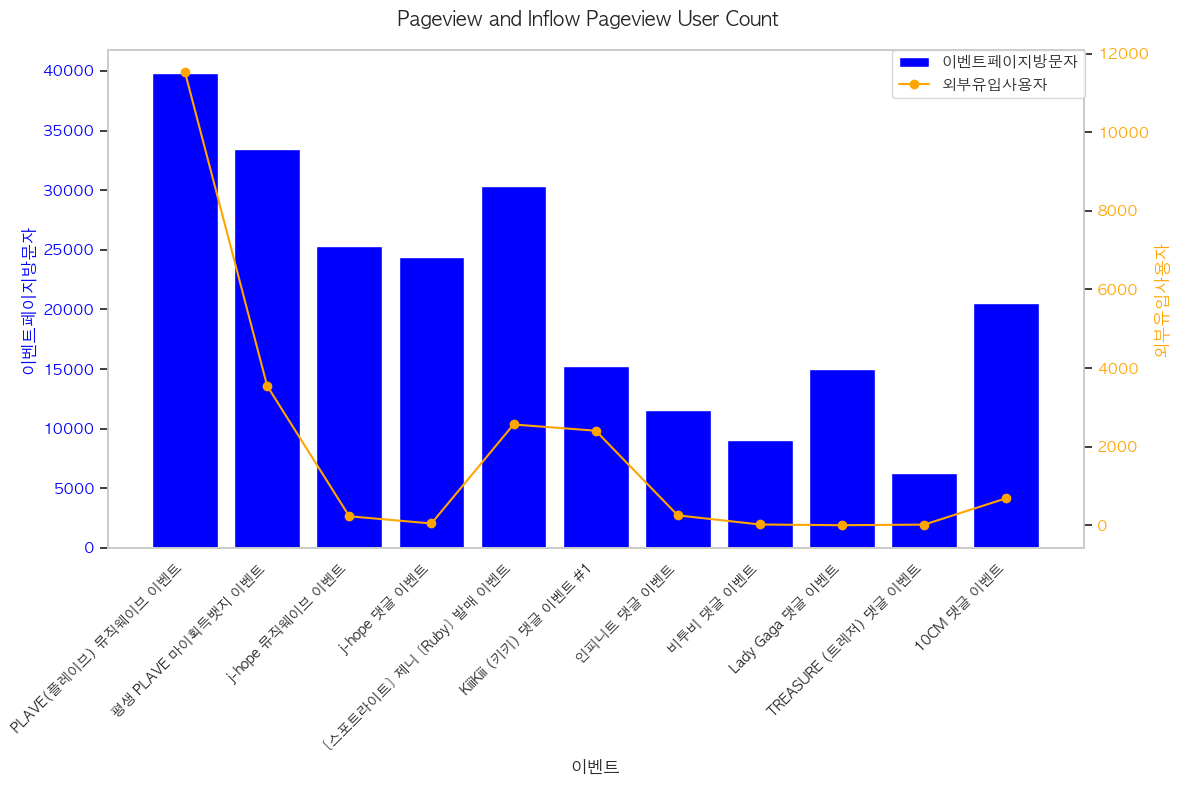

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# 2025년도 이벤트 필터링
event_user_data['start_date'] = pd.to_datetime(event_user_data['start_date'])  # 날짜 형식 변환
events_2025 = event_user_data[event_user_data['start_date'].dt.year == 2025]  # 2025년도 필터링

# 이벤트별 데이터
titles = events_2025['title']
pageview_user_cnt = events_2025['pageview_user_cnt']
inflow_pageview_user_cnt = events_2025['inflow_pageview_user_cnt']

# 그래프 생성
fig, ax1 = plt.subplots(figsize=(12, 8))

# 첫 번째 y축: pageview_user_cnt
ax1.bar(titles, pageview_user_cnt, color='blue', label='이벤트페이지방문자')
ax1.set_xlabel('이벤트', fontsize=12)
ax1.set_ylabel('이벤트페이지방문자', fontsize=12, color='blue', fontweight='bold')  # 볼드체 설정
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(range(len(titles)))
ax1.set_xticklabels(titles, rotation=45, ha='right', fontsize=10)

# 두 번째 y축: inflow_pageview_user_cnt
ax2 = ax1.twinx()
ax2.plot(titles, inflow_pageview_user_cnt, color='orange', marker='o', label='외부유입사용자')
ax2.set_ylabel('외부유입사용자', fontsize=12, color='orange', fontweight='bold')  # 볼드체 설정
ax2.tick_params(axis='y', labelcolor='orange')

# Grid 제거
ax1.grid(False)  # 첫 번째 y축 grid 제거
ax2.grid(False)  # 두 번째 y축 grid 제거

# 제목 및 레이아웃 설정
fig.suptitle('Pageview and Inflow Pageview User Count', fontsize=14)
fig.tight_layout()
fig.legend(loc='upper right', bbox_to_anchor=(0.92, 0.94))

plt.show()

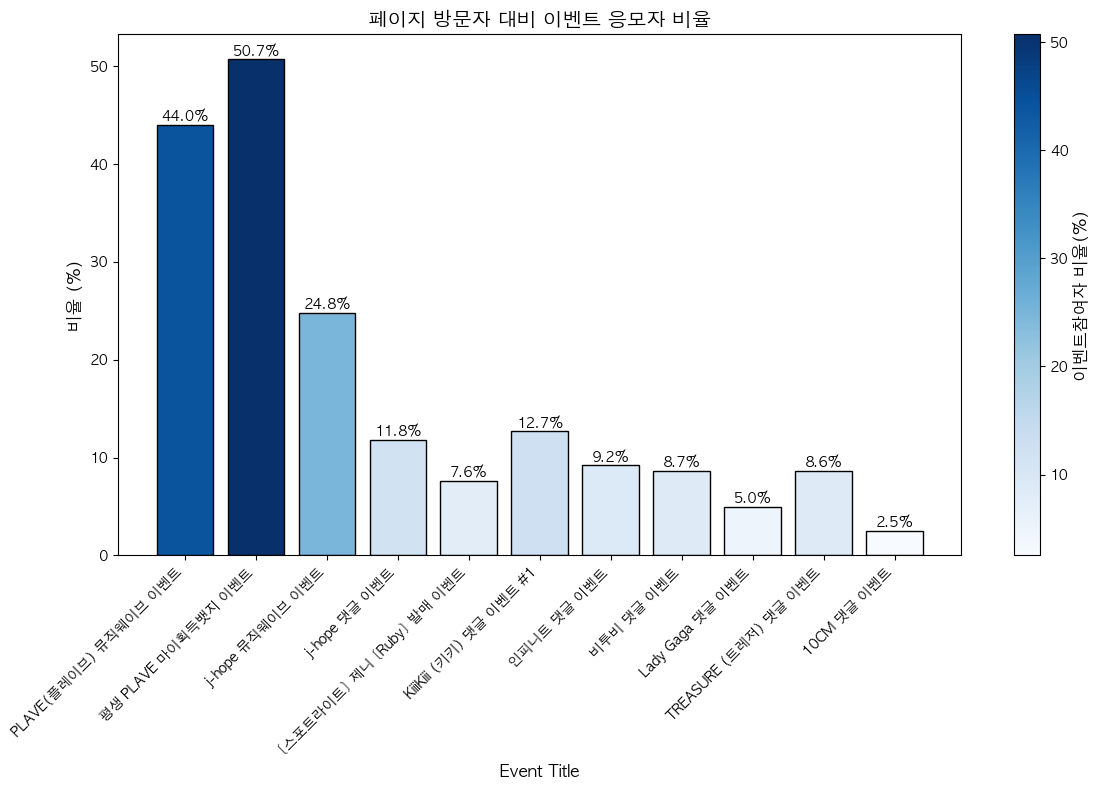

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

# 2025년도 이벤트 필터링
event_user_data['start_date'] = pd.to_datetime(event_user_data['start_date'])  # 날짜 형식 변환
events_2025 = event_user_data[event_user_data['start_date'].dt.year == 2025]  # 2025년도 필터링

# Normalize를 사용하여 ent_user_ratio 값의 색상 그라데이션 설정
norm = Normalize(vmin=events_2025['ent_user_ratio'].min(), vmax=events_2025['ent_user_ratio'].max())
cmap = plt.cm.Blues  # 색상 맵 설정 (Blues)

# 막대 색상 설정
colors = cmap(norm(events_2025['ent_user_ratio']))

# 그래프 생성
fig, ax = plt.subplots(figsize=(12, 8))  # Axes 객체 생성
bars = ax.bar(events_2025['title'], events_2025['ent_user_ratio'], color=colors, edgecolor='black')

# 데이터 라벨 추가
for bar, value in zip(bars, events_2025['ent_user_ratio']):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.1f}%', 
            ha='center', va='bottom', fontsize=10, color='black')

# 컬러바 추가
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)  # ax를 명시적으로 지정
cbar.set_label('이벤트참여자 비율(%)', fontsize=12)

# 그래프 꾸미기
ax.set_xlabel('Event Title', fontsize=12)
ax.set_ylabel('비율 (%)', fontsize=12)
ax.set_title('페이지 방문자 대비 이벤트 응모자 비율', fontsize=14)
ax.set_xticks(range(len(events_2025['title'])))
ax.set_xticklabels(events_2025['title'], rotation=45, ha='right', fontsize=10)
plt.tight_layout()

# 그래프 출력
plt.show()

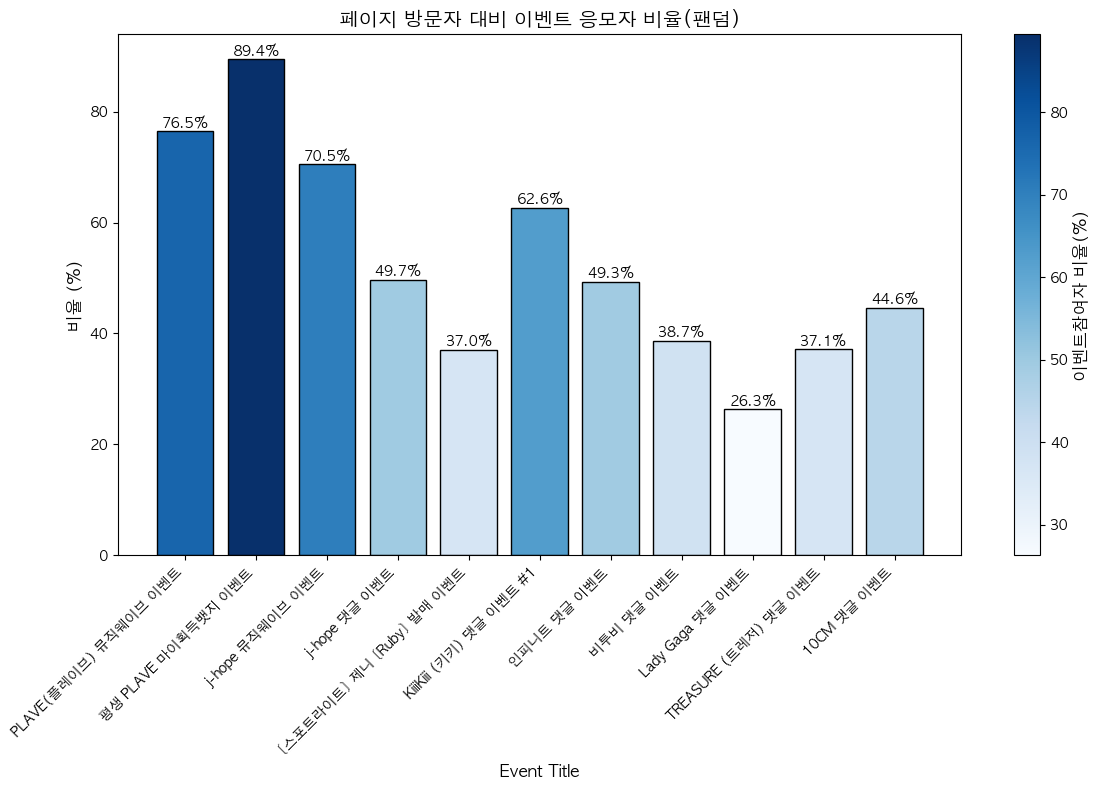

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

# 2025년도 이벤트 필터링
event_user_data['start_date'] = pd.to_datetime(event_user_data['start_date'])  # 날짜 형식 변환
events_2025 = event_user_data[event_user_data['start_date'].dt.year == 2025]  # 2025년도 필터링

# Normalize를 사용하여 ent_user_ratio 값의 색상 그라데이션 설정
norm = Normalize(vmin=events_2025['ent_fandom_user_ratio'].min(), vmax=events_2025['ent_fandom_user_ratio'].max())
cmap = plt.cm.Blues  # 색상 맵 설정 (Blues)

# 막대 색상 설정
colors = cmap(norm(events_2025['ent_fandom_user_ratio']))

# 그래프 생성
fig, ax = plt.subplots(figsize=(12, 8))  # Axes 객체 생성
bars = ax.bar(events_2025['title'], events_2025['ent_fandom_user_ratio'], color=colors, edgecolor='black')

# 데이터 라벨 추가
for bar, value in zip(bars, events_2025['ent_fandom_user_ratio']):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.1f}%', 
            ha='center', va='bottom', fontsize=10, color='black')

# 컬러바 추가
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)  # ax를 명시적으로 지정
cbar.set_label('이벤트참여자 비율(%)', fontsize=12)

# 그래프 꾸미기
ax.set_xlabel('Event Title', fontsize=12)
ax.set_ylabel('비율 (%)', fontsize=12)
ax.set_title('페이지 방문자 대비 이벤트 응모자 비율(팬덤)', fontsize=14)
ax.set_xticks(range(len(events_2025['title'])))
ax.set_xticklabels(events_2025['title'], rotation=45, ha='right', fontsize=10)
plt.tight_layout()

# 그래프 출력
plt.show()

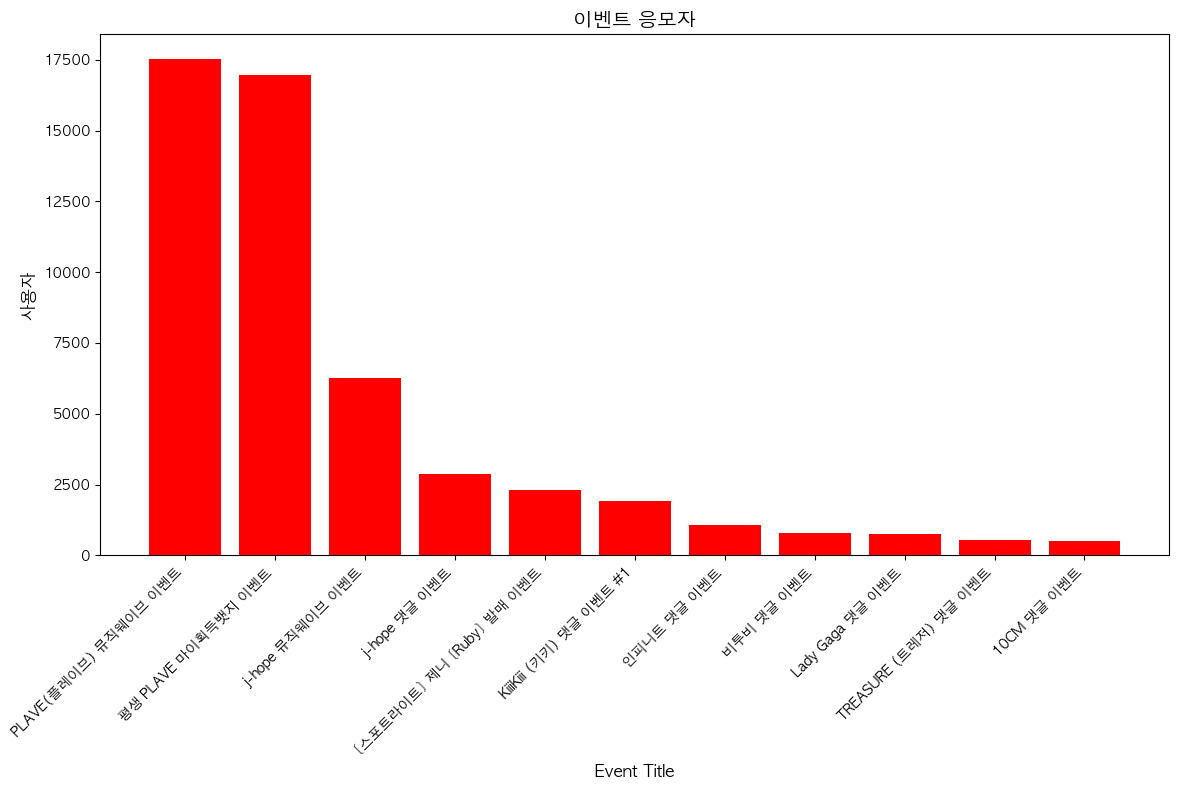

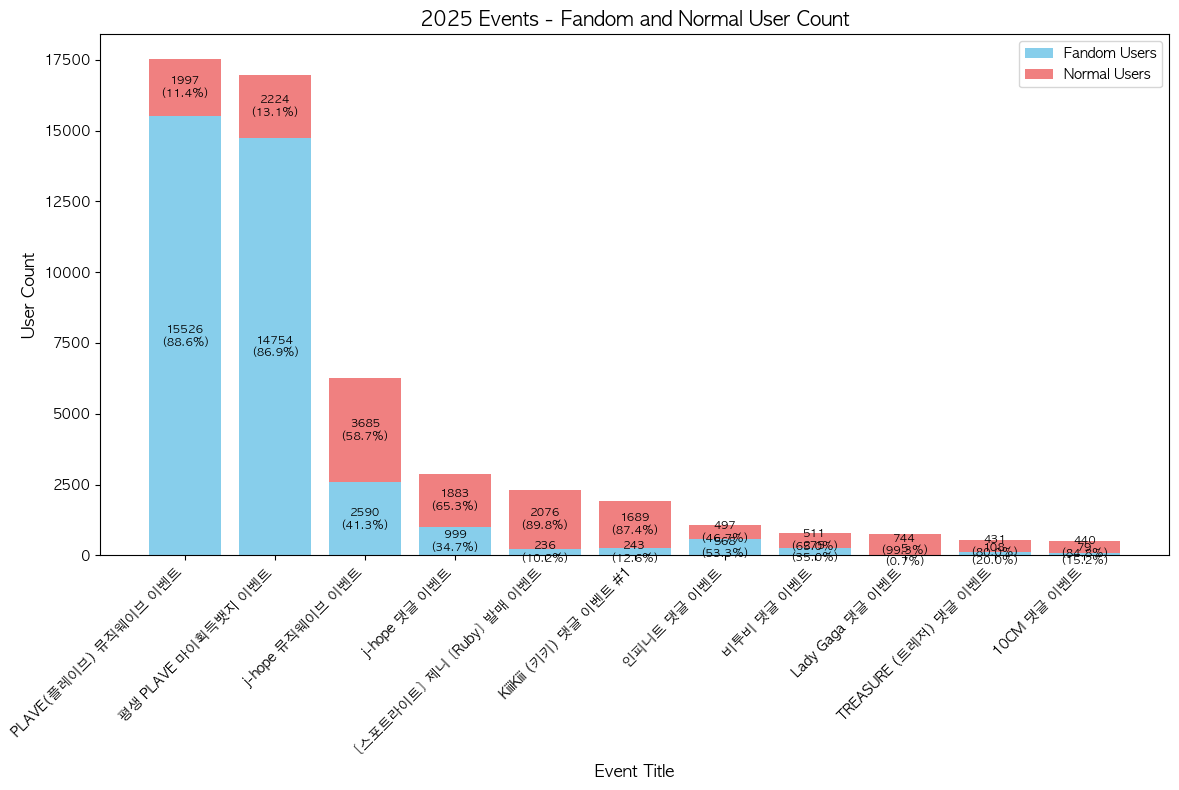

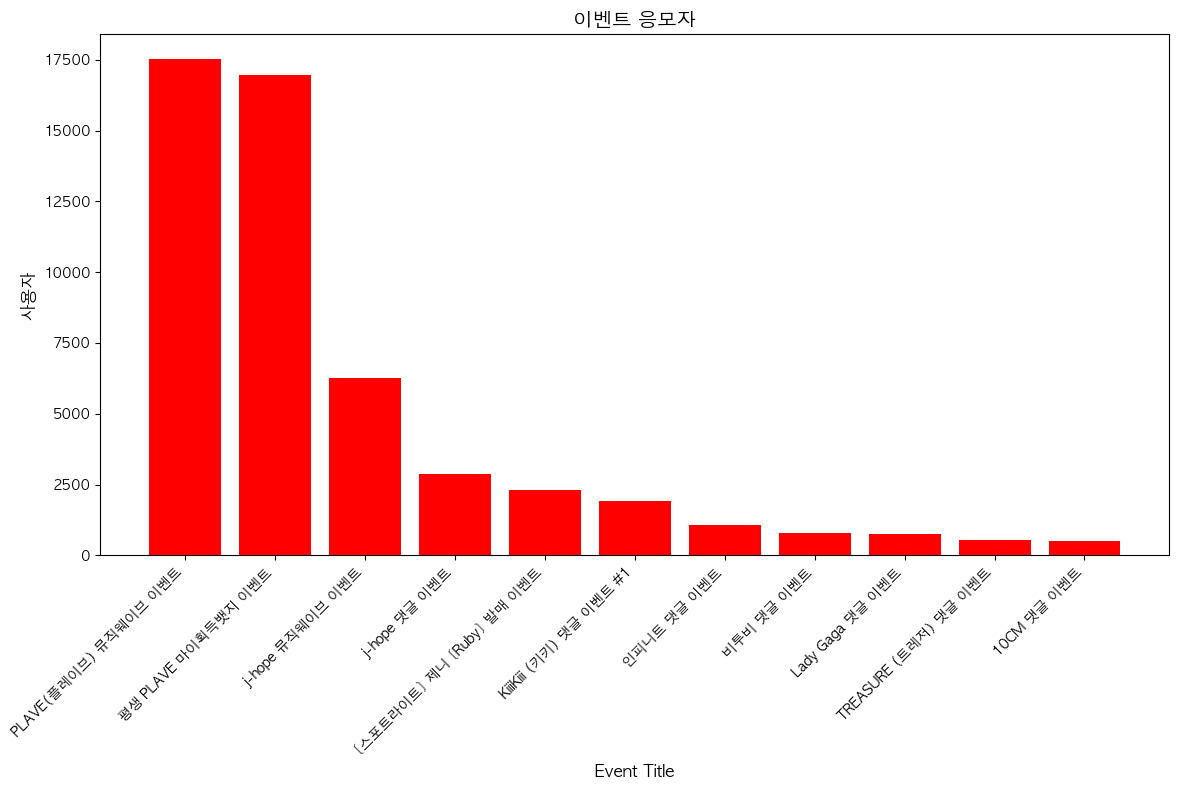

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 2025년도 이벤트 필터링
event_user_data['start_date'] = pd.to_datetime(event_user_data['start_date'])  # 날짜 형식 변환
events_2025 = event_user_data[event_user_data['start_date'].dt.year == 2025]  # 2025년도 필터링

# 이벤트별 ent_user_cnt 시각화
plt.figure(figsize=(12, 8))
plt.bar(events_2025['title'], events_2025['ent_user_cnt'], color='red')
plt.xlabel('Event Title', fontsize=12)
plt.ylabel('사용자', fontsize=12)
plt.title('이벤트 응모자', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

# 데이터 준비
titles = events_2025['title']
fandom_users = events_2025['ent_fandom_user_cnt']
normal_users = events_2025['ent_normal_user_cnt']

# 그래프 생성
fig, ax = plt.subplots(figsize=(12, 8))

# 스택형 막대 그래프
bar1 = ax.bar(titles, fandom_users, label='Fandom Users', color='skyblue')
bar2 = ax.bar(titles, normal_users, bottom=fandom_users, label='Normal Users', color='lightcoral')

# 데이터 라벨링
for i, (fandom, normal) in enumerate(zip(fandom_users, normal_users)):
    total = fandom + normal
    ax.text(i, fandom / 2 - 5, f'{fandom}\n({fandom / total * 100:.1f}%)', ha='center', va='center', fontsize=8, color='black')  # 팬덤 사용자 라벨
    ax.text(i, fandom + normal / 2 + 5, f'{normal}\n({normal / total * 100:.1f}%)', ha='center', va='center', fontsize=8, color='black')  # 일반 사용자 라벨


# 그래프 꾸미기
ax.set_xlabel('Event Title', fontsize=12)
ax.set_ylabel('User Count', fontsize=12)
ax.set_title('2025 Events - Fandom and Normal User Count', fontsize=14)
ax.set_xticks(range(len(titles)))
ax.set_xticklabels(titles, rotation=45, ha='right', fontsize=10)
ax.legend()

plt.tight_layout()
plt.show()

# 이벤트별 ent_user_cnt 시각화
plt.figure(figsize=(12, 8))
plt.bar(events_2025['title'], events_2025['ent_user_cnt'], color='red')
plt.xlabel('Event Title', fontsize=12)
plt.ylabel('사용자', fontsize=12)
plt.title('이벤트 응모자', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

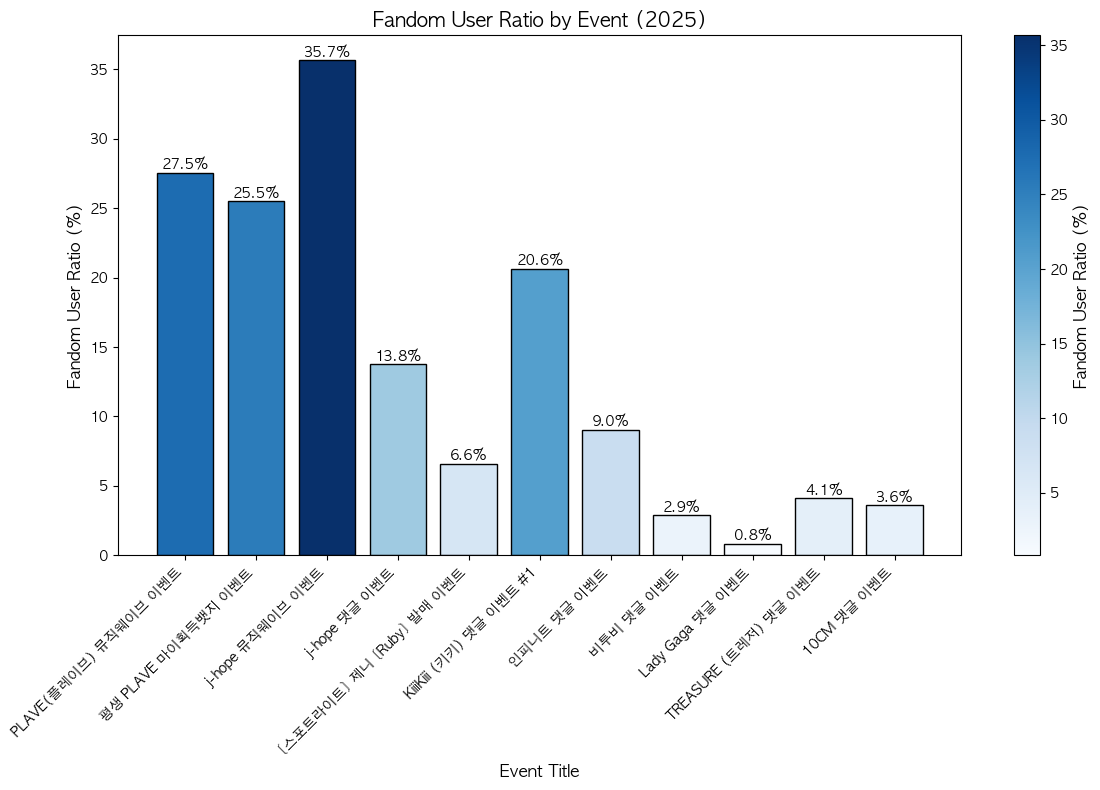

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

# fandom_user_ratio 값의 색상 그라데이션 설정
norm = Normalize(vmin=events_2025['fandom_user_ratio'].min(), vmax=events_2025['fandom_user_ratio'].max())
cmap = plt.cm.Blues  # 색상 맵 설정 (Blues)

# 막대 색상 설정
colors = cmap(norm(events_2025['fandom_user_ratio']))

# 그래프 생성
fig, ax = plt.subplots(figsize=(12, 8))  # Axes 객체 생성
bars = ax.bar(events_2025['title'], events_2025['fandom_user_ratio'], color=colors, edgecolor='black')

# 데이터 라벨 추가
for bar, value in zip(bars, events_2025['fandom_user_ratio']):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.1f}%', 
            ha='center', va='bottom', fontsize=10, color='black')

# 컬러바 추가
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)  # ax를 명시적으로 지정
cbar.set_label('Fandom User Ratio (%)', fontsize=12)

# 그래프 꾸미기
ax.set_xlabel('Event Title', fontsize=12)
ax.set_ylabel('Fandom User Ratio (%)', fontsize=12)
ax.set_title('Fandom User Ratio by Event (2025)', fontsize=14)
ax.set_xticks(range(len(events_2025['title'])))
ax.set_xticklabels(events_2025['title'], rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

## 이벤트 응모자 해지방어
- 이벤트 페이지 방문자 들의 해지사상품건수 밎 재가입자비율
- 동일 기간 이벤트 비교.
- 과거 플레이브 이벤트(24년 8월 뮤직웨이브,25년2월 뮤지구에이브)와 비교

In [12]:
# 동일기간 및 과거 이벤트 기준 참여 상품 및 해지상품 데이터
event_prod_query = '''
with event_df as(
select seq
         , event_id
         , parent_event_id
         , title
         , start_date
         , end_date
         , category
         , entry_target
         , winner_noti_date
         , gift_dp_name
         , case
            when event_id IN (36723,36341,36683) then 3207401
            when event_id = 36742 then 725984
            when event_id = 36746 then 468244
            when event_id = 36750 then 725984
            when event_id = 36749 then 995173
            when event_id = 36757 then 4099078
            when event_id = 36741 then 476181
            when event_id = 36740 then 647971
            when event_id = 36743 then 253688
            when event_id = 36747 then 2880278
          end artist_id  
         , case
            when event_id = 36723 then '뱃지이벤트'
            when event_id in (36742,36341,36683) then '뮤직웨이브'
            when event_id = 36746 then '에디션M'
            when event_id = 36750 then '매거진이벤트'
            when event_id = 36749 then '스포트라이트'
            when event_id = 36757 then '하이라이징'
            when event_id = 36741 then '매거진이벤트'
            when event_id = 36740 then '매거진이벤트'
            when event_id = 36743 then '매거진이벤트'
            when event_id = 36747 then '아티스트는뭘듣니'
           end event_type    
         , case
            when event_id = 36723 then 1000000386
            when event_id in (36742,36341,36683) then 1000003041
            when event_id = 36746 then 1000000498
            when event_id = 36750 then 1000000498
            when event_id = 36749 then 1000002847
            when event_id = 36757 then 1000000498
            when event_id = 36741 then 1000000498
            when event_id = 36740 then 1000000498
            when event_id = 36743 then 1000000498
            when event_id = 36747 then 1000000498
           end menu_id    
         , case
            when event_id = 36723 then '36723'
            when event_id = 36742 then '571'
            when event_id = 36746 then '15872'
            when event_id = 36750 then '15901'
            when event_id = 36749 then '152'
            when event_id = 36757 then '15911'
            when event_id = 36741 then '15893'
            when event_id = 36740 then '15892'
            when event_id = 36743 then '15894'
            when event_id = 36747 then '15897'
            when event_id in (36341,36683) then '1945'
           end conts_id  
    from HADOOP_KENT.MELON_ODS_POC_PRODUCTION.EVENT_INFO_RO 
    where melon_short_date_format(start_date) > '20240201'
    and melon_short_date_format(end_date) < '20250322'
    and entry_target = 'PROD'
    and event_id in (36723,36742,36750,36749,36757,36741,36740,36743,36747,36746,36341,36683)
    --and category = '100065' /* 이벤트 종류 (100065 : 멜론 이벤트, 100066 : 앨범이벤트, 100067 : 공연이벤트, 100068 : 뮤직스토리이벤트, 100069 : 스토리 이벤트, 100070 : 패밀리앱 이벤트, 100071 : MWK 이벤트) */
), prod_df as(
        select f1.dt
             , f1.user_mkey
             , f1.first_buy_no
             , f1.buy_no
             , f1.prod_prt_cd
             , f1.out_yn
             , f1.out_dt
             , if(f2.user_mkey is null,'N','Y') as rejoin_yn
        from(
        select t1.dt
             , t1.user_mkey
             , t1.first_buy_no
             , t1.buy_no
             , t1.prod_prt_cd
             , t1.prod_attr_cd
             , if(t2.lst_buy_no is not null,'Y','N') as out_yn
             , t2.dt as out_dt
        from(     
            SELECT A.DT
                 , A.USER_MKEY
                 , A.FIRST_BUY_NO
                 , A.BUY_NO
                 , B.PROD_PRT_CD
                 , B.prod_attr_cd
                 , A.at_buy_cnt
                 , RANK() OVER(PARTITION BY A.USER_MKEY,A.DT ORDER BY B.PROD_PRT_CD,B.prod_attr_cd,A.first_buy_no desc) as rnk -- 티켓,클럽 2개 모두 보유시 클럽 상품, MP3, 스트리밍 다있으면 스트리밍 상품 가져오기
            FROM HADOOP_KENT.MELON_MA_STAT_PRODUCTION.F_PROD_USER_FXMT_DT A
            JOIN HADOOP_KENT.MELON_MA_STAT_PRODUCTION.D_PROD B ON (A.PROD_ID = B.PROD_ID)
            JOIN HADOOP_KENT.MELON_ODS_COMMERCE_PRODUCTION.SBY_BUY_TB_RO C ON (A.BUY_NO = C.BUY_NO)
            WHERE (A.log_date between '20250228' and '20250321' or A.log_date between '20250203' and '20250216' or A.log_date between '20240820' and '20240901')
            AND A.PROD_STAT_CD NOT IN (3401, 3901)
            AND A.DT <= A.VLD_END_DATE -- DCB 일시정지 제외
            AND B.PROD_ATTR_CD NOT IN (10040, 10050) -- 종량,기타 제외
            AND B.PROD_SELL_PRT_CD = 60000 -- B2C
            --AND B.PROD_PRT_CD IN (20000,20010) -- 클럽상품,티켓상품
            AND B.PROD_PRT_CD IN (20000) -- 클럽상품
            AND A.PF_YN = 1
            GROUP BY 1, 2, 3, 4, 5, 6, 7
        ) t1
        left join hadoop_kent.melon_da_stat_production.a_out_prod_dtl_tbh t2 on t1.buy_no = t2.lst_buy_no
        where rnk = 1
        ) f1
        left join(
            select dt
                 , user_mkey
                 , first_buy_no
                 , buy_no
            FROM HADOOP_KENT.MELON_MA_STAT_PRODUCTION.F_PROD_USER_FXMT_DT T1
            JOIN HADOOP_KENT.MELON_MA_STAT_PRODUCTION.D_PROD T2  ON (T1.PROD_ID = T2.PROD_ID)
            JOIN HADOOP_KENT.MELON_ODS_COMMERCE_PRODUCTION.CPT_PROD_TB_RO T4 ON (T1.PROD_ID = T4.PROD_ID)
            WHERE (T1.log_date between '20250228' and '20250329' or T1.log_date between '20250203' and '20250224' or T1.log_date between '20240820' and '20240908')
              AND DATE_FORMAT(T1.DT, '%Y%m%d') BETWEEN '20220101' AND '20241231'
              AND PF_YN = 1
              AND T2.PROD_ATTR_CD NOT IN (10040, 10050)
              AND T1.PROD_JOIN_PRT_CD IN (1100, 1200, 1201, 1205, 1203, 1206, 1207) /*신규 로직에서 1206 제외*/ 
              AND T2.PROD_SELL_PRT_CD IN (60000) /*B2C*/
              AND PROD_PRT_CD = 20000  /*클럽 상품*/
            GROUP BY 1, 2, 3, 4
        ) f2 on f1.user_mkey = f2.user_mkey and f1.out_yn = 'Y' and date_diff('day',f1.dt,f2.dt) < 8
)


    --select A.event_id
    --     , A.member_key
    --     , A.reg_date
    --     , C.first_buy_no
    --     , C.buy_no
    --     , C.out_yn
    --     , C.out_dt
    
    select A.event_id
         , D.title
         , date(D.start_date) as start_date
         , date(D.end_date) as end_date
         , count(distinct A.member_key) as ent_user_cnt
         , count(distinct C.buy_no) as prod_cnt
         , count(distinct if(C.out_yn = 'Y',C.buy_no)) as out_prod_cnt     
         , cast(count(distinct if(C.out_yn = 'Y',C.buy_no)) as double)/cast(count(distinct C.buy_no) as double)*100 as out_prod_ratio
         , count(distinct if(C.out_yn = 'Y' and C.rejoin_yn ='Y',C.buy_no)) as rejoin_prod_cnt     
         , cast(count(distinct if(C.out_yn = 'Y' and C.rejoin_yn ='Y',C.buy_no)) as double)/cast(count(distinct if(C.out_yn = 'Y',C.buy_no)) as double)*100 as rejoin_prod_ratio
    from (
        select event_id
             , member_key
             , reg_date
             , case
                when event_id IN (36723,36341,36683) then 3207401
                when event_id = 36742 then 725984
                when event_id = 36746 then 468244
                when event_id = 36750 then 725984
                when event_id = 36749 then 995173
                when event_id = 36757 then 4099078
                when event_id = 36741 then 476181
                when event_id = 36740 then 647971
                when event_id = 36743 then 253688
                when event_id = 36747 then 2880278
              end artist_id  
        from HADOOP_KENT.MELON_ODS_POC_PRODUCTION.EVENT_ENTRY_MAIN_RO A
        where (melon_short_date_format(reg_date) between '20250227' and '20250322' or melon_short_date_format(reg_date) between '20250203' and '20250216' or melon_short_date_format(reg_date) between '20240820' and '20240901')
        and event_id in (36723,36742,36750,36749,36757,36741,36740,36743,36747,36746,36341,36683)
        group by 1,2,3,4
    ) A
    left join (
        select artist_id
             , member_key
             , log_date
        from HADOOP_KENT.MELON_MA_PROD_PRODUCTION.A_USER_ARTIST_FANDOM_TRGT_DAY 
        where (log_date between '20250228' and '20250321' or log_date between '20250203' and '20250216' or log_date between '20240820' and '20240901')
        AND (CONTAINS(FANDOM_TYPE,'A')=true OR CONTAINS(FANDOM_TYPE,'B')=true OR CONTAINS(FANDOM_TYPE,'C')=true)
        group by 1,2,3
    ) B on melon_short_date_format(A.reg_date) = B.log_date and A.artist_id = B.artist_id and A.member_key = B.member_key
    left join prod_df C on A.member_key = C.user_mkey and date(A.reg_date) = C.dt
    left join event_df D on A.event_id = D.event_id
    group by 1,2,3,4
    union all
    select 0
         , '이벤트미참여자'
         , null
         , null
         , 0 as ent_user_cnt
         , count(distinct first_buy_no) as prod_cnt
         , count(distinct if(out_yn = 'Y',first_buy_no)) as out_prod_cnt     
         , cast(count(distinct if(out_yn = 'Y',first_buy_no)) as double)/cast(count(distinct first_buy_no) as double)*100 as out_prod_ratio
         , count(distinct if(out_yn = 'Y' and rejoin_yn ='Y',first_buy_no)) as rejoin_prod_cnt     
         , cast(count(distinct if(out_yn = 'Y' and rejoin_yn ='Y',first_buy_no)) as double)/cast(count(distinct if(out_yn = 'Y',first_buy_no )) as double)*100 as rejoin_prod_ratio
    from prod_df A
    left join(
        select member_key             
        from HADOOP_KENT.MELON_ODS_POC_PRODUCTION.EVENT_ENTRY_MAIN_RO A
        where (melon_short_date_format(reg_date) between '20250227' and '20250322' or melon_short_date_format(reg_date) between '20250203' and '20250216' or melon_short_date_format(reg_date) between '20240820' and '20240901')
        and event_id in (36723,36742,36750,36749,36757,36741,36740,36743,36747,36746,36341,36683)
        group by 1
    ) B ON A.user_mkey = B.member_key
    where B.member_key is null
    
    
    
'''

cur.execute(event_prod_query)

results = cur.fetchall()
colnames = [part[0] for part in cur.description]

event_prod_df = pd.DataFrame(results, columns=colnames)

cur.cancel()
conn.close()
event_prod_df.head()

,event_id,title,start_date,end_date,ent_user_cnt,prod_cnt,out_prod_cnt,out_prod_ratio,rejoin_prod_cnt,rejoin_prod_ratio
0,36746,10CM 댓글 이벤트,2025-03-06,2025-03-20,519,516,76,14.728682,7,9.210526
1,36741,인피니트 댓글 이벤트,2025-03-06,2025-03-20,1065,1047,181,17.287488,7,3.867403
2,36743,Lady Gaga 댓글 이벤트,2025-03-07,2025-03-21,749,747,65,8.701473,9,13.846154
3,36747,TREASURE (트레저) 댓글 이벤트,2025-03-07,2025-03-21,539,528,76,14.393939,11,14.473684
4,36749,[스포트라이트] 제니 [Ruby] 발매 이벤트,2025-03-07,2025-03-20,2313,2292,310,13.525305,27,8.709677


In [119]:
event_prod_df

,event_id,title,start_date,end_date,ent_user_cnt,prod_cnt,out_prod_cnt,out_prod_ratio,rejoin_prod_cnt,rejoin_prod_ratio
0,36757,KiiiKiii (키키) 댓글 이벤트 #1,2025-03-12,2025-03-18,1932,1910,360,18.848168,40,11.111111
1,36746,10CM 댓글 이벤트,2025-03-06,2025-03-20,519,516,76,14.728682,7,9.210526
2,36747,TREASURE (트레저) 댓글 이벤트,2025-03-07,2025-03-21,539,528,76,14.393939,11,14.473684
3,36749,[스포트라이트] 제니 [Ruby] 발매 이벤트,2025-03-07,2025-03-20,2315,2294,310,13.513514,27,8.709677
4,36740,비투비 댓글 이벤트,2025-03-05,2025-03-19,786,774,105,13.565891,10,9.523810
5,36742,j-hope 뮤직웨이브 이벤트,2025-03-07,2025-03-21,6279,6088,709,11.645861,64,9.026798
6,36743,Lady Gaga 댓글 이벤트,2025-03-07,2025-03-21,749,747,65,8.701473,9,13.846154
7,36683,PLAVE(플레이브) 뮤직웨이브 이벤트,2025-02-03,2025-02-16,17536,16374,2599,15.872725,434,16.698730
8,36750,j-hope 댓글 이벤트,2025-03-07,2025-03-21,2885,2852,357,12.517532,34,9.523810
9,36723,평생 PLAVE 마이획득뱃지 이벤트,2025-02-28,2025-03-21,16992,16687,2226,13.339726,304,13.656783


/var/folders/qw/6lks7c5d14scf7qtctm8m6jh0000gn/T/ipykernel_64448/4219269315.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['start_date'] = pd.to_datetime(filtered_df['start_date'])  # 날짜 형식 변환


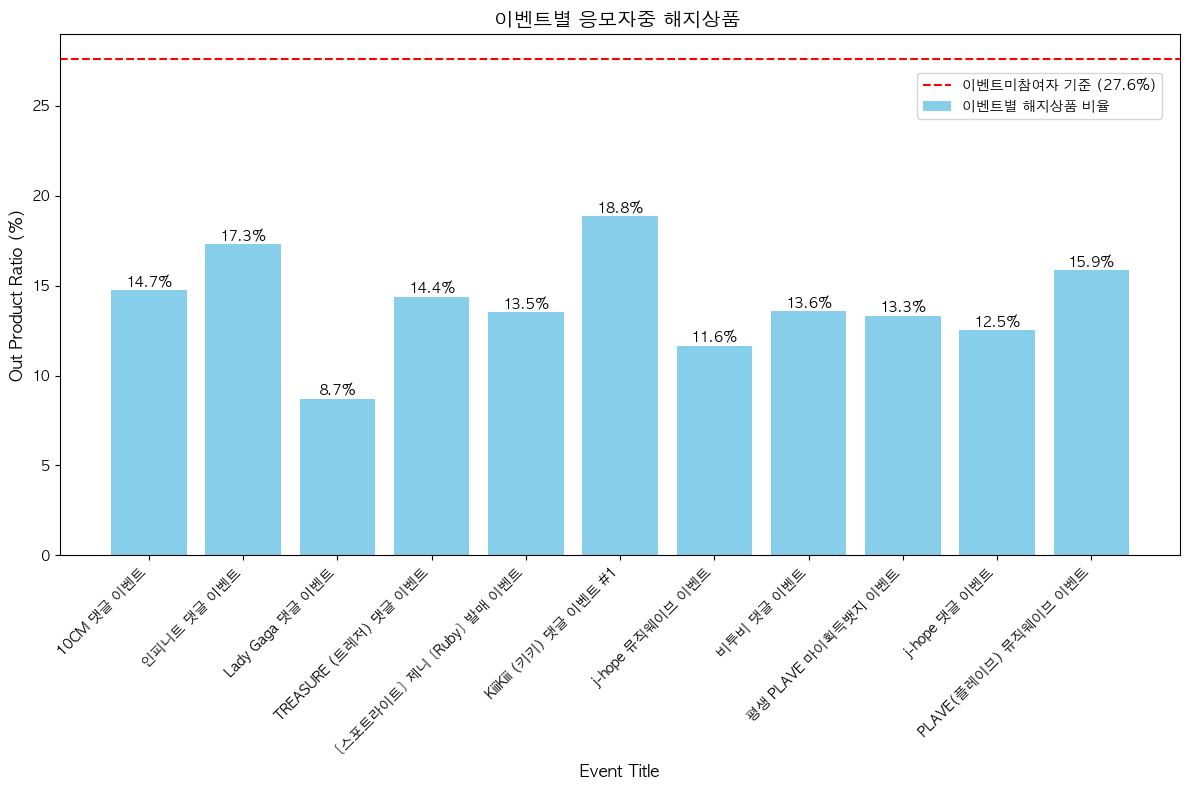

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# 이벤트미참여자 제외
filtered_df = event_prod_df[event_prod_df['title'] != '이벤트미참여자']
filtered_df['start_date'] = pd.to_datetime(filtered_df['start_date'])  # 날짜 형식 변환
filtered_df = filtered_df[filtered_df['start_date'].dt.year == 2025]  # 2025년도 필터링


# 이벤트미참여자의 out_prod_ratio 값 추출
non_participant_ratio = event_prod_df.loc[event_prod_df['title'] == '이벤트미참여자', 'out_prod_ratio'].values[0]

# 그래프 생성
plt.figure(figsize=(12, 8))
bars = plt.bar(filtered_df['title'], filtered_df['out_prod_ratio'], color='skyblue', label='이벤트별 해지상품 비율')

# 수평선 추가
plt.axhline(y=non_participant_ratio, color='red', linestyle='--', label=f'이벤트미참여자 기준 ({non_participant_ratio:.1f}%)')

# 데이터 라벨 추가
for bar, value in zip(bars, filtered_df['out_prod_ratio']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.1f}%', 
             ha='center', va='bottom', fontsize=10, color='black')

# 그래프 꾸미기
plt.xlabel('Event Title', fontsize=12)
plt.ylabel('Out Product Ratio (%)', fontsize=12)
plt.title('이벤트별 응모자중 해지상품 ', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend()
plt.tight_layout()
plt.legend(loc='upper right', bbox_to_anchor=(0.99, 0.94))
plt.show()



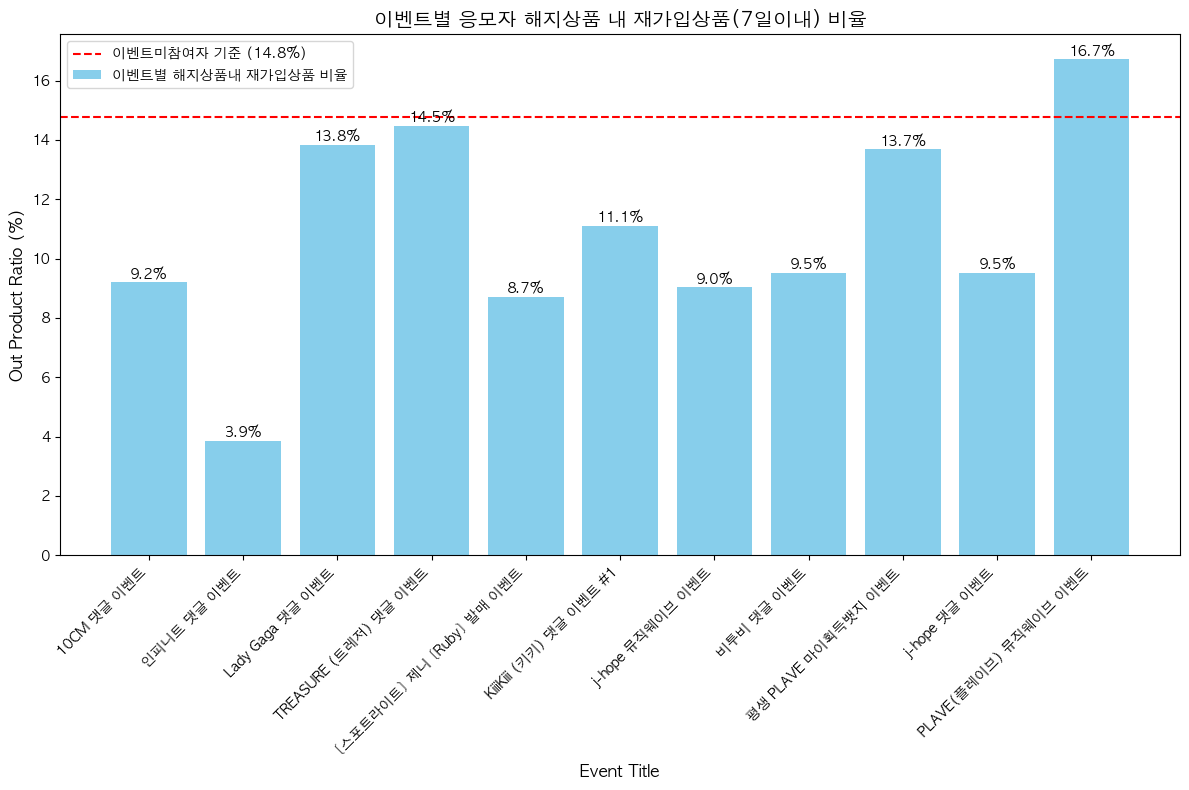

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# 이벤트미참여자 제외
filtered_df = event_prod_df[event_prod_df['title'] != '이벤트미참여자'].copy()  # .copy() 추가

# start_date를 datetime 형식으로 변환
if not pd.api.types.is_datetime64_any_dtype(filtered_df['start_date']):
    filtered_df['start_date'] = pd.to_datetime(filtered_df['start_date'], errors='coerce')  # datetime 변환

# 2025년도 데이터 필터링
filtered_df = filtered_df[filtered_df['start_date'].dt.year == 2025]

# 이벤트미참여자의 rejoin_prod_ratio 값 추출
non_participant_ratio = event_prod_df.loc[event_prod_df['title'] == '이벤트미참여자', 'rejoin_prod_ratio'].values[0]

# 그래프 생성
plt.figure(figsize=(12, 8))
bars = plt.bar(filtered_df['title'], filtered_df['rejoin_prod_ratio'], color='skyblue', label='이벤트별 해지상품내 재가입상품 비율')

# 수평선 추가
plt.axhline(y=non_participant_ratio, color='red', linestyle='--', label=f'이벤트미참여자 기준 ({non_participant_ratio:.1f}%)')

# 데이터 라벨 추가
for bar, value in zip(bars, filtered_df['rejoin_prod_ratio']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.1f}%', 
             ha='center', va='bottom', fontsize=10, color='black')

# 그래프 꾸미기
plt.xlabel('Event Title', fontsize=12)
plt.ylabel('Out Product Ratio (%)', fontsize=12)
plt.title('이벤트별 응모자 해지상품 내 재가입상품(7일이내) 비율', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend()
plt.tight_layout()
plt.show()

### 이벤트별 최초신규 및 재가입 유입 효과 비교

In [7]:
# 동일기간 및 과거 이벤트 기준 참여 상품 및 해지상품 데이터
event_prod_join_prt_query = '''
select event_id
     , title
     , count(distinct member_key) as ent_user_cnt
     , count(distinct buy_no) as ent_user_prod_cnt
     , count(distinct if(prod_group = '재가입신규(7일이내)',buy_no)) as rejoin_prod_7day_cnt
     , count(distinct if(prod_group = '재가입신규(7일이후)',buy_no)) as rejoin_prod_7day_after_cnt    
     , count(distinct if(prod_group = '최초신규',buy_no)) as first_prod_cnt
     , count(distinct if(prod_group = '기존상품',buy_no)) as keep_prod_cnt
from(
    select A.event_id
         , D.title 
         , A.member_key
         , if(B.member_key is not null,'Y','N') as fandom_yn
         , C.buy_no
         , C.prod_group
         , C.first_buy_no
         , C.at_buy_cnt
         , C.out_dt
         , C.non_prod_term
    from(
        select event_id
             , member_key
             , reg_date
             , case
                when event_id IN (36723,36341,36683) then 3207401
                when event_id = 36742 then 725984
                when event_id = 36746 then 468244
                when event_id = 36750 then 725984
                when event_id = 36749 then 995173
                when event_id = 36757 then 4099078
                when event_id = 36741 then 476181
                when event_id = 36740 then 647971
                when event_id = 36743 then 253688
                when event_id = 36747 then 2880278
              end artist_id  
        from HADOOP_KENT.MELON_ODS_POC_PRODUCTION.EVENT_ENTRY_MAIN_RO 
        where (melon_short_date_format(reg_date) between '20250227' and '20250322' or melon_short_date_format(reg_date) between '20250203' and '20250216' or melon_short_date_format(reg_date) between '20240820' and '20240901')
        and event_id in (36723,36742,36750,36749,36757,36741,36740,36743,36747,36746,36683)
        group by 1,2,3,4
    ) A
    left join (
        select artist_id
             , member_key
             , log_date
        from HADOOP_KENT.MELON_MA_PROD_PRODUCTION.A_USER_ARTIST_FANDOM_TRGT_DAY 
        where (log_date between '20250228' and '20250321' or log_date between '20250203' and '20250216' or log_date between '20240820' and '20240901')
        AND (CONTAINS(FANDOM_TYPE,'A')=true OR CONTAINS(FANDOM_TYPE,'B')=true OR CONTAINS(FANDOM_TYPE,'C')=true)
        group by 1,2,3
    ) B on melon_short_date_format(A.reg_date) = B.log_date and A.artist_id = B.artist_id and A.member_key = B.member_key
    left join(
        select dt
             , user_mkey
             , first_buy_no
             , buy_no
             , vld_start_date
             , at_buy_cnt
             , case
                when at_buy_cnt = 0 and out_dt is not null and non_prod_term < 7 then '재가입신규(7일이내)' 
                when at_buy_cnt = 0 and out_dt is not null and non_prod_term > 6 then '재가입신규(7일이후)' 
                when at_buy_cnt = 0 and out_dt is null then '최초신규' 
                when at_buy_cnt > 0 then '기존상품'
               end as prod_group
             , prod_prt_cd
             , prod_attr_cd
             , out_dt
             , non_prod_term
             , rnk
        from(     
        select t1.dt
             , t1.user_mkey
             , t1.first_buy_no
             , t1.buy_no
             , t1.vld_start_date
             , t1.at_buy_cnt
             , t1.prod_prt_cd
             , t1.prod_attr_cd
             , t2.dt as out_dt
             , date_diff('day',t2.dt,t1.vld_start_date) as non_prod_term
             , rank() over(partition by t1.user_mkey,t1.dt,t1.first_buy_no order by t2.dt desc) as rnk
        from(
        select dt
             , user_mkey
             , first_buy_no
             , buy_no
             , vld_start_date
             , at_buy_cnt
             , prod_prt_cd
             , prod_attr_cd
        from(     
        SELECT A.DT
             , A.USER_MKEY
             , A.FIRST_BUY_NO
             , A.BUY_NO
             , date(vld_strt_date) as vld_start_date
             , B.PROD_PRT_CD
             , B.prod_attr_cd
             , A.at_buy_cnt
             , RANK() OVER(PARTITION BY A.DT,A.USER_MKEY ORDER BY PROD_PRT_CD,prod_attr_cd,A.at_buy_cnt desc) as rnk 
        FROM HADOOP_KENT.MELON_MA_STAT_PRODUCTION.F_PROD_USER_FXMT_DT A
        JOIN HADOOP_KENT.MELON_MA_STAT_PRODUCTION.D_PROD B ON (A.PROD_ID = B.PROD_ID)
        JOIN HADOOP_KENT.MELON_ODS_COMMERCE_PRODUCTION.SBY_BUY_TB_RO C ON (A.BUY_NO = C.BUY_NO)
        WHERE (A.log_date between '20250228' and '20250321' or A.log_date between '20250203' and '20250216')
        AND A.PROD_STAT_CD NOT IN (3401, 3901)
        AND A.DT <= A.VLD_END_DATE -- DCB 일시정지 제외
        AND B.PROD_ATTR_CD NOT IN (10040, 10050) -- 종량,기타 제외
        AND B.PROD_SELL_PRT_CD = 60000 -- B2C
        AND B.PROD_PRT_CD = 20000 --IN (20000,20010) -- 클럽상품,티켓상품
        AND A.PF_YN = 1
        GROUP BY 1, 2, 3, 4, 5, 6,7, 8
        )
        where rnk = 1
        ) t1
        left join hadoop_kent.melon_da_stat_production.a_out_prod_dtl_tbh t2 on t1.vld_start_date > t2.dt and t1.user_mkey = t2.user_mkey and t1.at_buy_cnt = 0
        )
        where rnk = 1
    ) C on A.member_key = C.user_mkey and date(A.reg_date) = C.dt
    left join HADOOP_KENT.MELON_ODS_POC_PRODUCTION.EVENT_INFO_RO  D on A.event_id = D.event_id
    group by 1,2,3,4,5,6,7,8,9,10
)
group by 1,2
order by 3 desc
    
'''

cur.execute(event_prod_join_prt_query)

results = cur.fetchall()
colnames = [part[0] for part in cur.description]

event_prod_join_prt_df = pd.DataFrame(results, columns=colnames)

cur.cancel()
conn.close()
event_prod_join_prt_df.head()

,event_id,title,ent_user_cnt,ent_user_prod_cnt,rejoin_prod_7day_cnt,rejoin_prod_7day_after_cnt,first_prod_cnt,keep_prod_cnt
0,36683,PLAVE(플레이브) 뮤직웨이브 이벤트,17527,16375,479,2799,1459,11638
1,36723,평생 PLAVE 마이획득뱃지 이벤트,16982,16674,877,1832,1239,12726
2,36742,j-hope 뮤직웨이브 이벤트,6277,6088,154,608,101,5225
3,36750,j-hope 댓글 이벤트,2884,2853,81,272,86,2414
4,36749,[스포트라이트] 제니 [Ruby] 발매 이벤트,2313,2292,87,134,50,2021


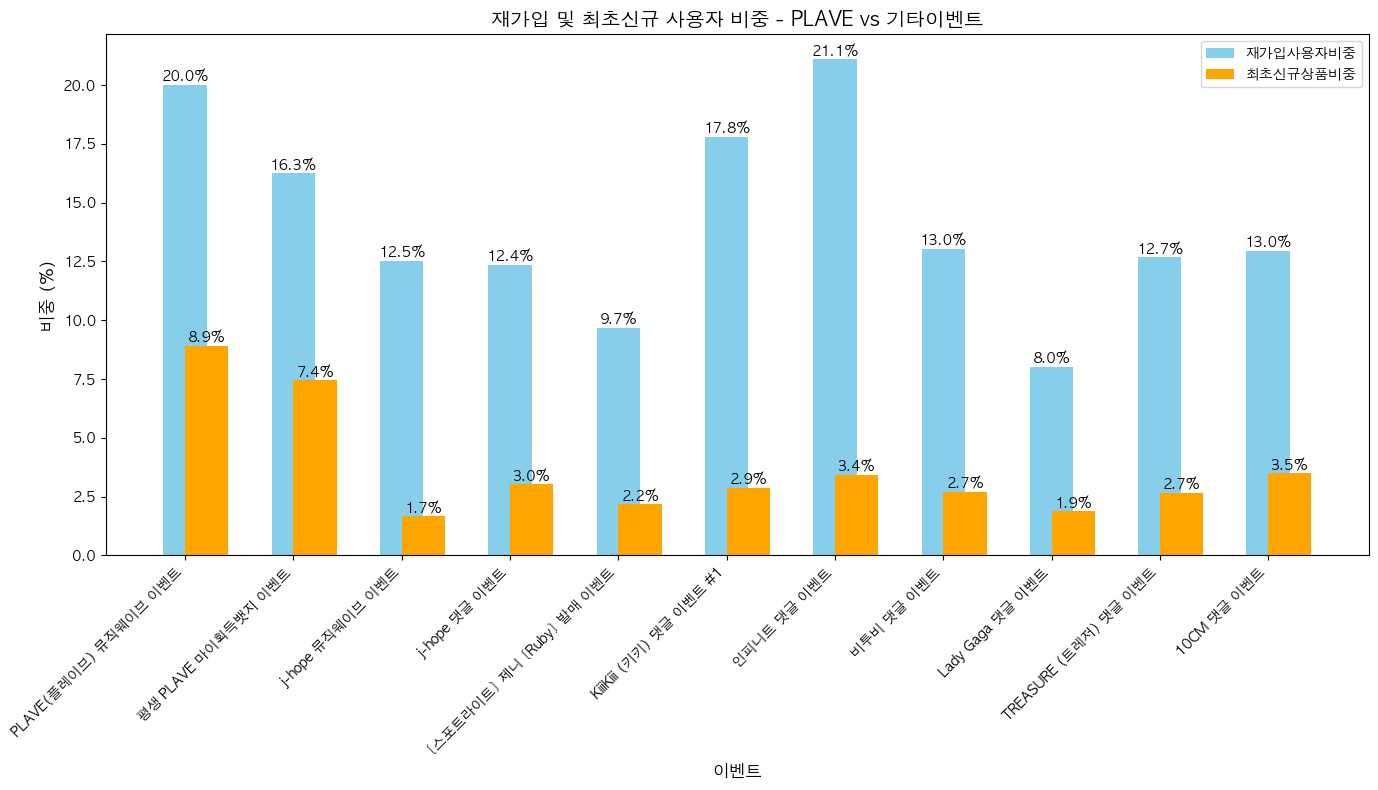

In [226]:
import pandas as pd
import matplotlib.pyplot as plt

# Rejoin Ratio와 First Join Ratio 계산
event_prod_join_prt_df['rejoin_ratio'] = (
    (event_prod_join_prt_df['rejoin_prod_7day_cnt'] + event_prod_join_prt_df['rejoin_prod_7day_after_cnt']) /
    event_prod_join_prt_df['ent_user_prod_cnt']
) * 100

event_prod_join_prt_df['first_join_ratio'] = (
    event_prod_join_prt_df['first_prod_cnt'] / event_prod_join_prt_df['ent_user_prod_cnt']
) * 100

# PLAVE 관련 이벤트와 비교군 이벤트 필터링
plave_events = event_prod_join_prt_df[
    event_prod_join_prt_df['title'].str.contains('PLAVE|플레이브')
].copy()

comparison_events = event_prod_join_prt_df[
    ~event_prod_join_prt_df['title'].str.contains('PLAVE|플레이브')
].copy()

# PLAVE 이벤트와 비교군 이벤트 병합
plave_events['group'] = 'PLAVE'
comparison_events['group'] = 'Comparison'
combined_events = pd.concat([plave_events, comparison_events])

# 막대 그래프 생성
plt.figure(figsize=(14, 8))
x = range(len(combined_events))
colors_rejoin_7day = ['skyblue' if group == 'PLAVE' else 'lightgray' for group in combined_events['group']]
colors_first_join = ['orange' if group == 'PLAVE' else 'gainsboro' for group in combined_events['group']]


# Rejoin Ratio 막대
bars1 = plt.bar(x, combined_events['rejoin_ratio'], width=0.4, label='재가입사용자비중', color='skyblue', align='center')

# First Join Ratio 막대
bars2 = plt.bar(x, combined_events['first_join_ratio'], width=0.4, label='최초신규상품비중', color='orange', align='edge')

# 데이터 라벨 추가
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

# 그래프 꾸미기
plt.xticks(x, combined_events['title'], rotation=45, ha='right', fontsize=10)
plt.xlabel('이벤트', fontsize=12)
plt.ylabel('비중 (%)', fontsize=12)
plt.title('재가입 및 최초신규 사용자 비중 - PLAVE vs 기타이벤트', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

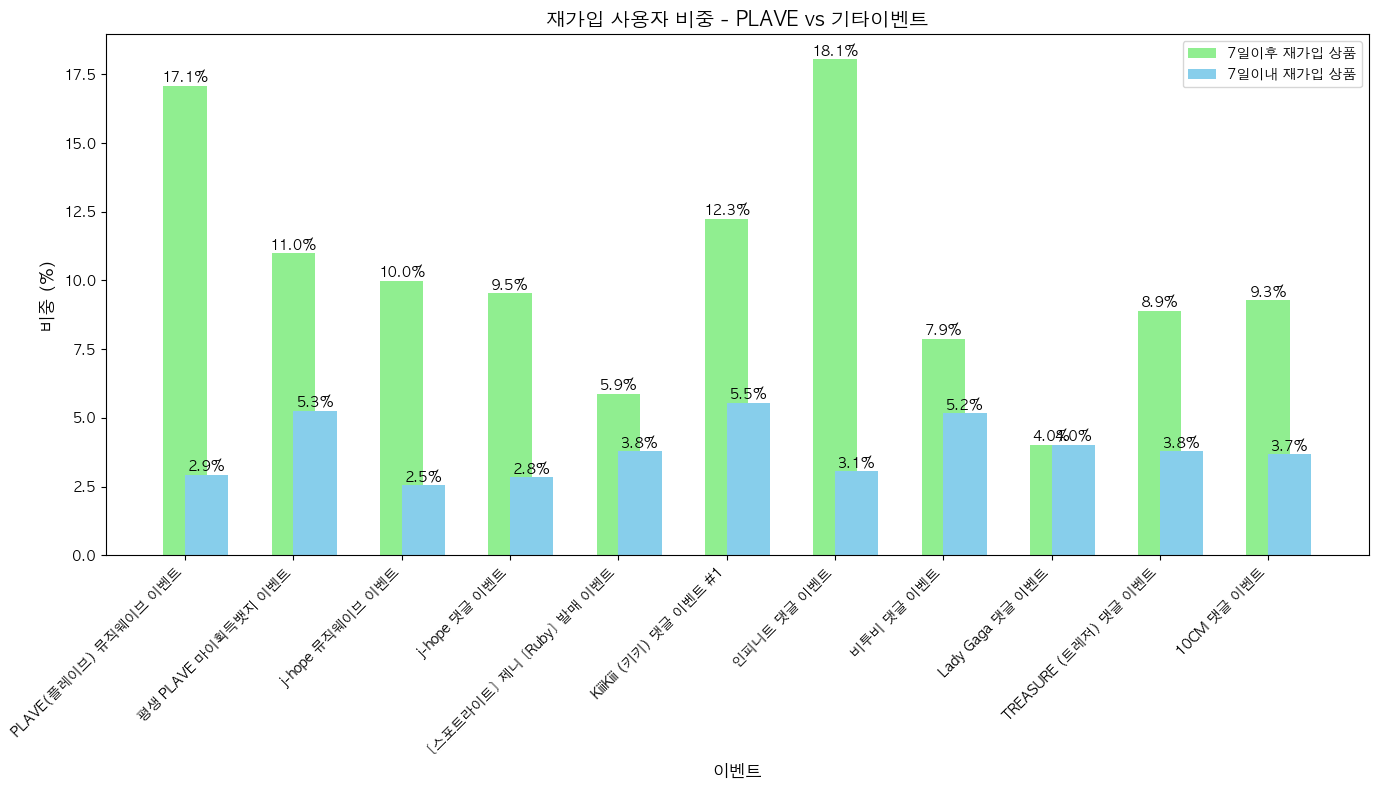

In [225]:
import pandas as pd
import matplotlib.pyplot as plt

# Rejoin Ratio와 First Join Ratio 계산
event_prod_join_prt_df['rejoin_prod_7day_ratio'] = (
    event_prod_join_prt_df['rejoin_prod_7day_cnt']/ event_prod_join_prt_df['ent_user_prod_cnt']
) * 100

event_prod_join_prt_df['rejoin_prod_7day_after_ratio'] = (
    event_prod_join_prt_df['rejoin_prod_7day_after_cnt'] / event_prod_join_prt_df['ent_user_prod_cnt']
) * 100

# PLAVE 관련 이벤트와 비교군 이벤트 필터링
plave_events = event_prod_join_prt_df[
    event_prod_join_prt_df['title'].str.contains('PLAVE|플레이브')
].copy()

comparison_events = event_prod_join_prt_df[
    ~event_prod_join_prt_df['title'].str.contains('PLAVE|플레이브')
].copy()

# PLAVE 이벤트와 비교군 이벤트 병합
plave_events['group'] = 'PLAVE'
comparison_events['group'] = 'Comparison'
combined_events = pd.concat([plave_events, comparison_events])

# 막대 그래프 생성
plt.figure(figsize=(14, 8))
x = range(len(combined_events))
colors_rejoin_7day = ['skyblue' if group == 'PLAVE' else 'lightgray' for group in combined_events['group']]
colors_rejoin_7day_after = ['lightgreen' if group == 'PLAVE' else 'gainsboro' for group in combined_events['group']]

# 7일이후 재가입 상품 비중 막대
bars2 = plt.bar(x, combined_events['rejoin_prod_7day_after_ratio'], width=0.4, label='7일이후 재가입 상품', color='lightgreen', align='center')

# 7일이내 재가입 상품 비중 막대
bars1 = plt.bar(x, combined_events['rejoin_prod_7day_ratio'], width=0.4, label='7일이내 재가입 상품', color='skyblue', align='edge')


# 데이터 라벨 추가
for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

# 그래프 꾸미기
plt.xticks(x, combined_events['title'], rotation=45, ha='right', fontsize=10)
plt.xlabel('이벤트', fontsize=12)
plt.ylabel('비중 (%)', fontsize=12)
plt.title('재가입 사용자 비중 - PLAVE vs 기타이벤트', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
# 재가입신규 - 상품미보유기간에 따른 사용자 분포
event_prod_rejoin_prod_query = '''
select prod_group
      , non_prod_term
     , count(distinct member_key) as cnt
from hadoop_kent.melon_sys_temp_production.samuel_plave_event_ent_user_tb
where prod_group in ('재가입신규(7일이후)','재가입신규(7일이내)')
group by 1,2
order by 1,2
    
'''

cur.execute(event_prod_rejoin_prod_query)

results = cur.fetchall()
colnames = [part[0] for part in cur.description]

event_prod_rejoin_prod_df = pd.DataFrame(results, columns=colnames)

cur.cancel()
conn.close()
event_prod_rejoin_prod_df.head()

,prod_group,non_prod_term,cnt
0,재가입신규(7일이내),1,824
1,재가입신규(7일이내),2,73
2,재가입신규(7일이내),3,28
3,재가입신규(7일이내),4,33
4,재가입신규(7일이내),5,20


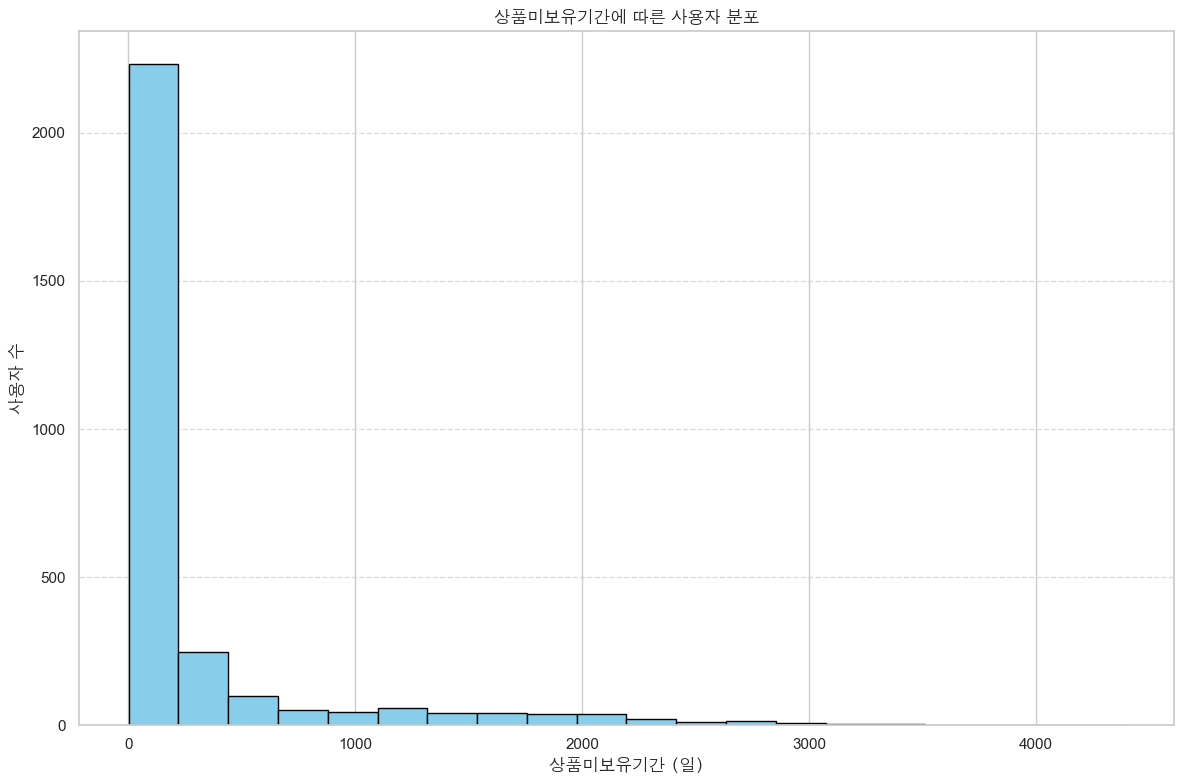

In [10]:
# 폰트 설정
font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'  # MacOS 예시
font_prop = fm.FontProperties(fname=font_path)

# 히스토그램 생성
plt.figure(figsize=(12, 8))
plt.hist(event_prod_rejoin_prod_df['non_prod_term'], bins=20, weights=event_prod_rejoin_prod_df['cnt'], color='skyblue', edgecolor='black')

# 그래프 꾸미기
plt.xlabel('상품미보유기간 (일)', fontsize=12, fontproperties=font_prop)
plt.ylabel('사용자 수', fontsize=12, fontproperties=font_prop)
plt.title('상품미보유기간에 따른 사용자 분포', fontsize=14, fontproperties=font_prop)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



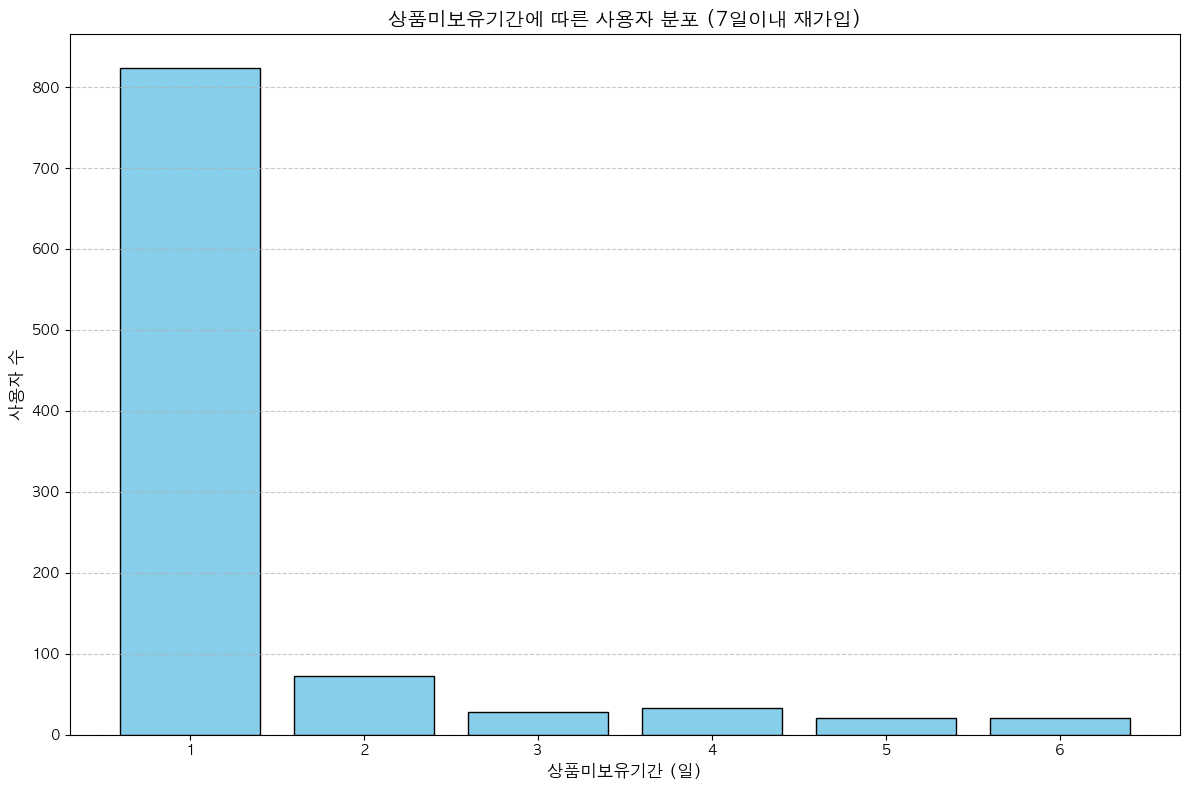

In [141]:
# non_prod_term = 0 제외
filtered_df = event_prod_rejoin_prod_df[event_prod_rejoin_prod_df['prod_group'] == '재가입신규(7일이내)'].copy()

# Bar Plot 생성
plt.figure(figsize=(12, 8))
plt.bar(filtered_df['non_prod_term'], filtered_df['cnt'], color='skyblue', edgecolor='black')

# 그래프 꾸미기
plt.xlabel('상품미보유기간 (일)', fontsize=12)
plt.ylabel('사용자 수', fontsize=12)
plt.title('상품미보유기간에 따른 사용자 분포 (7일이내 재가입)', fontsize=14)
plt.xticks()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


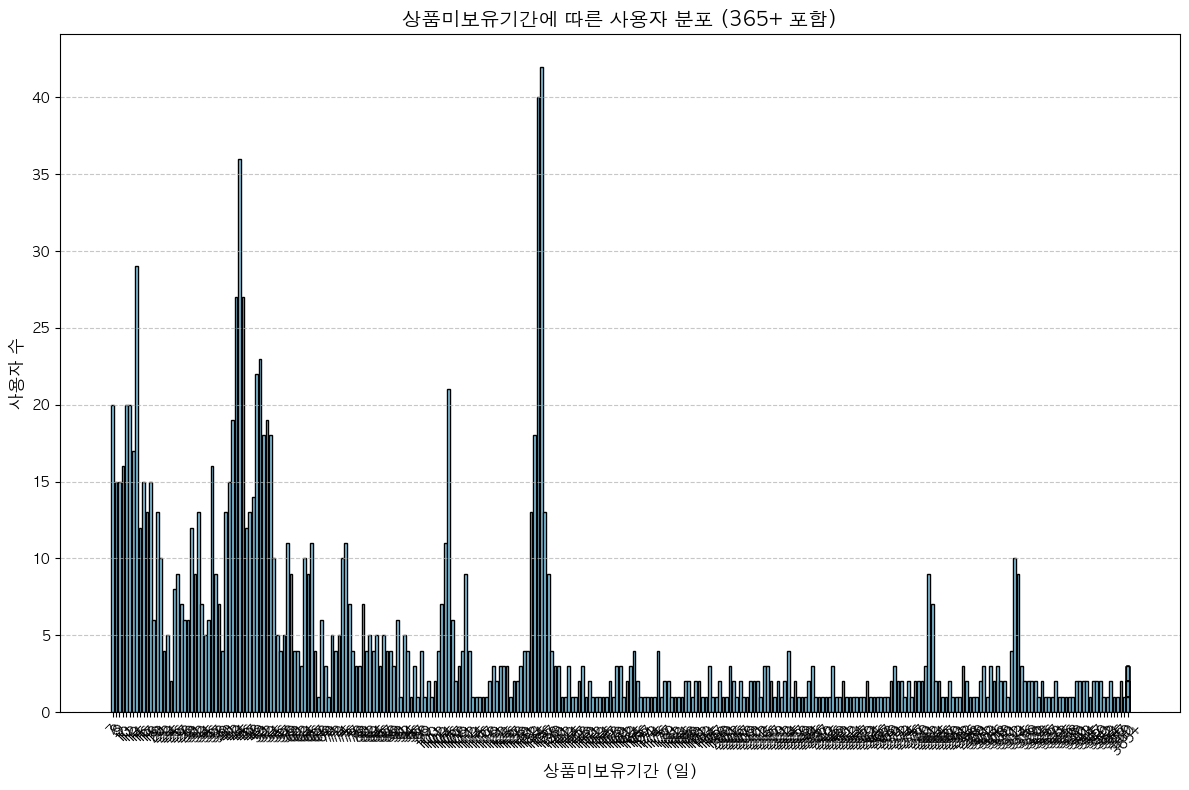

In [143]:
# non_prod_term = 0 제외
filtered_df = event_prod_rejoin_prod_df[event_prod_rejoin_prod_df['prod_group'] == '재가입신규(7일이후)'].copy()

# non_prod_term을 문자열로 변환하고 365 이상은 365로 처리
filtered_df['non_prod_term'] = filtered_df['non_prod_term'].apply(
    lambda x: '365+' if x >= 365 else str(x)
)

# Bar Plot 생성
plt.figure(figsize=(12, 8))
plt.bar(filtered_df['non_prod_term'], filtered_df['cnt'], color='skyblue', edgecolor='black')

# 그래프 꾸미기
plt.xlabel('상품미보유기간 (일)', fontsize=12)
plt.ylabel('사용자 수', fontsize=12)
plt.title('상품미보유기간에 따른 사용자 분포 (365+ 포함)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [15]:
# 재가입신규 - 상품미보유기간 x 뮤직웨이브이벤트 참여 여부에 따른 사용자 분포
event_prod_rejoin_prod_query_2 = '''
select prod_group
     , musicwave_event_ent_yn
     , count(distinct member_key) as cnt
from hadoop_kent.melon_sys_temp_production.samuel_plave_event_ent_user_tb
where prod_group in ('재가입신규(7일이후)','재가입신규(7일이내)')
group by 1,2
order by 1,2
    
'''

cur.execute(event_prod_rejoin_prod_query_2)

results = cur.fetchall()
colnames = [part[0] for part in cur.description]

event_prod_rejoin_prod_df_2 = pd.DataFrame(results, columns=colnames)

cur.cancel()
conn.close()
event_prod_rejoin_prod_df_2.head()

,prod_group,musicwave_event_ent_yn,cnt
0,재가입신규(7일이내),N,413
1,재가입신규(7일이내),Y,586
2,재가입신규(7일이후),N,1031
3,재가입신규(7일이후),Y,922


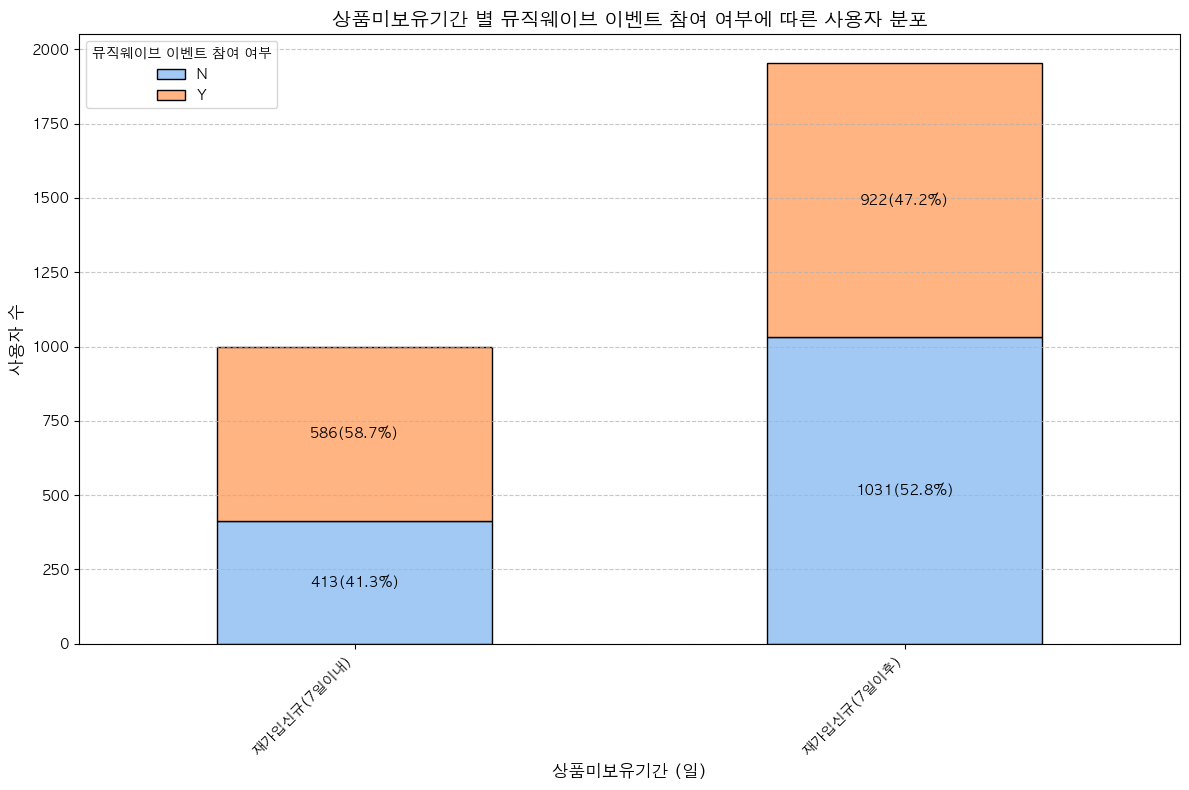

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 데이터 준비
pivot_df = event_prod_rejoin_prod_df_2.pivot(index='prod_group', columns='musicwave_event_ent_yn', values='cnt').fillna(0)

# 전체 합계 계산 (비중 계산용)
pivot_df['total'] = pivot_df.sum(axis=1)

# 색상 팔레트 설정
colors = sns.color_palette("pastel", len(pivot_df.columns) - 1)

# Bar Plot 생성
ax = pivot_df.drop(columns='total').plot(kind='bar', stacked=True, figsize=(12, 8), color=colors, edgecolor='black')

# 각 막대 위에 건수와 비중 표시
for i, bar_group in enumerate(ax.containers):
    for bar in bar_group:
        height = bar.get_height()
        if height > 0:
            total = pivot_df.iloc[int(bar.get_x() + bar.get_width() / 2)]['total']
            percentage = (height / total) * 100
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2,
                    f'{int(height)}({percentage:.1f}%)', ha='center', va='center', fontsize=10, color='black')

# 그래프 꾸미기
plt.xlabel('상품미보유기간 (일)', fontsize=12)
plt.ylabel('사용자 수', fontsize=12)
plt.title('상품미보유기간 별 뮤직웨이브 이벤트 참여 여부에 따른 사용자 분포', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='뮤직웨이브 이벤트 참여 여부', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# 그래프 출력
plt.show()

In [169]:
# 최초신규 - 상품미보유기간에 따른 사용자 분포
event_prod_first_prod_query = '''
select case
          when non_prod_term between 0 and 6 then 'A) 0~6일'
          when non_prod_term between 7 and 30 then 'B) 7~30일'
          when non_prod_term between 31 and 90 then 'C) 31~90일'
          when non_prod_term between 91 and 180 then 'D) 91~180일'
          when non_prod_term between 181 and 365 then 'E) 181~365일'
          when non_prod_term > 365 then 'F) 365+'
       end as non_prod_term
     , count(distinct member_key) as cnt
from hadoop_kent.melon_sys_temp_production.samuel_plave_event_ent_user_tb
where prod_group = '최초신규'
group by 1
order by 1
    
'''

cur.execute(event_prod_first_prod_query)

results = cur.fetchall()
colnames = [part[0] for part in cur.description]

event_prod_first_prod_df = pd.DataFrame(results, columns=colnames)

cur.cancel()
conn.close()
event_prod_first_prod_df.head()

,non_prod_term,cnt
0,A) 0~6일,686
1,B) 7~30일,43
2,C) 31~90일,56
3,D) 91~180일,64
4,E) 181~365일,47


In [194]:
1290-686

604

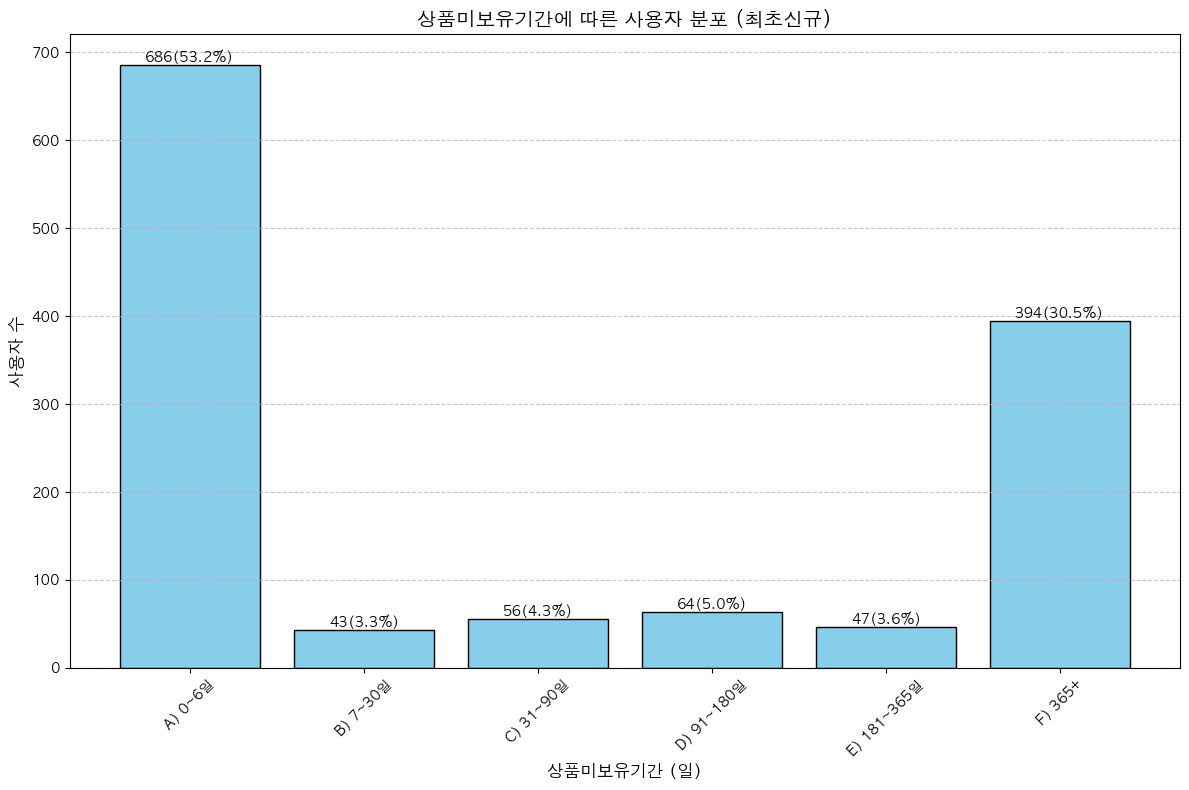

In [172]:
# 전체 사용자 수 계산
total_cnt = event_prod_first_prod_df['cnt'].sum()

# Bar Plot 생성
plt.figure(figsize=(12, 8))
bars = plt.bar(event_prod_first_prod_df['non_prod_term'], event_prod_first_prod_df['cnt'], color='skyblue', edgecolor='black')

# 데이터 라벨 추가 (값과 비율 표시)
for bar, cnt in zip(bars, event_prod_first_prod_df['cnt']):
    height = bar.get_height()
    percentage = (cnt / total_cnt) * 100  # 비율 계산
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(cnt)}({percentage:.1f}%)', 
             ha='center', va='bottom', fontsize=10, color='black')

# 그래프 꾸미기
plt.xlabel('상품미보유기간 (일)', fontsize=12)
plt.ylabel('사용자 수', fontsize=12)
plt.title('상품미보유기간에 따른 사용자 분포 (최초신규)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [158]:
# 기존상품보유자 - 상품미보유기간에 따른 사용자 분포
keep_prod_query = '''
select musicwave_event_ent_yn
     , count(distinct member_key) as cnt
from hadoop_kent.melon_sys_temp_production.samuel_plave_event_ent_user_tb
where (prod_group = '기존상품' or prod_group is null)
group by 1
order by 1
    
'''

cur.execute(keep_prod_query)

results = cur.fetchall()
colnames = [part[0] for part in cur.description]

keep_prod_df = pd.DataFrame(results, columns=colnames)

cur.cancel()
conn.close()
keep_prod_df.head()

,musicwave_event_ent_yn,cnt
0,N,5553
1,Y,7197


In [193]:
7197/(7197 + 5553)*100

56.44705882352942

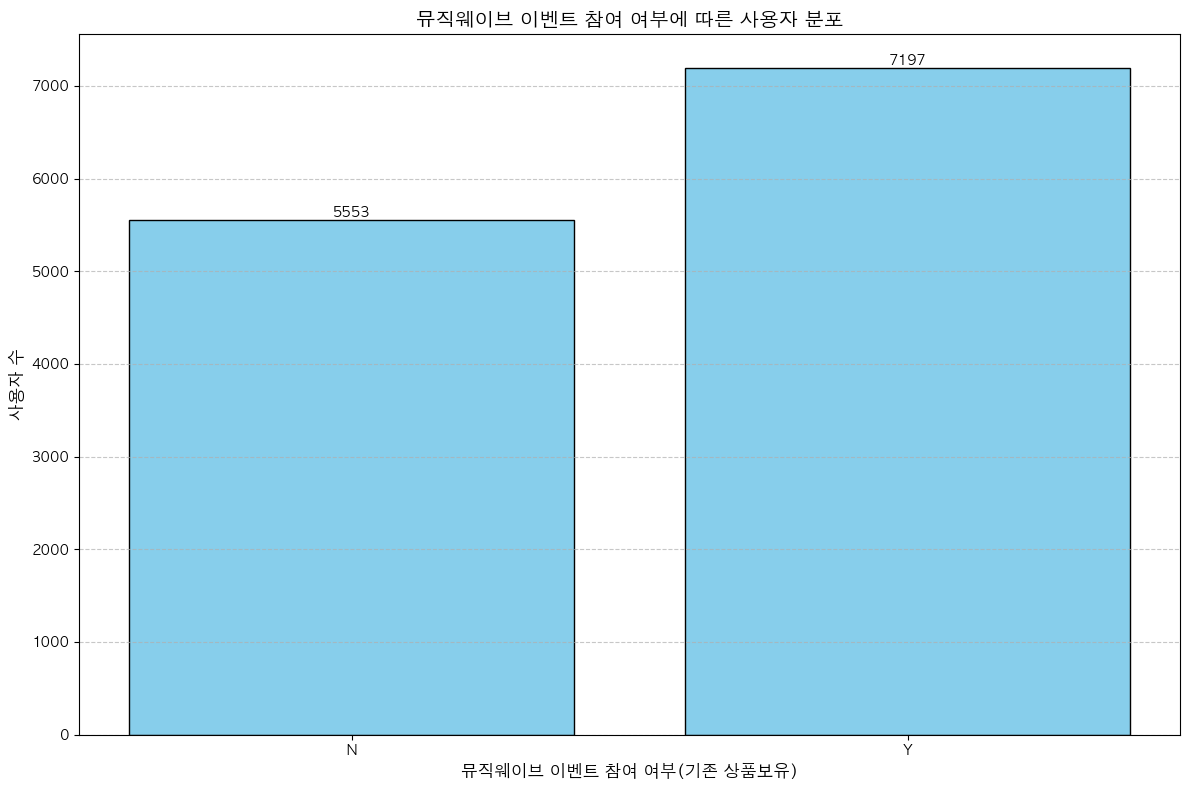

In [191]:
import matplotlib.pyplot as plt

# Bar Plot 생성
plt.figure(figsize=(12, 8))
bars = plt.bar(keep_prod_df['musicwave_event_ent_yn'], keep_prod_df['cnt'], color='skyblue', edgecolor='black')

# 각 막대 위에 cnt 값 표시
for bar, cnt in zip(bars, keep_prod_df['cnt']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(cnt)}', 
             ha='center', va='bottom', fontsize=10, color='black')

# 그래프 꾸미기
plt.xlabel('뮤직웨이브 이벤트 참여 여부(기존 상품보유)', fontsize=12)
plt.ylabel('사용자 수', fontsize=12)
plt.title('뮤직웨이브 이벤트 참여 여부에 따른 사용자 분포', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [161]:
# 기존상품보유자 - 상품미보유기간에 따른 사용자 분포
musicwave_event_query = '''
select musicwave_event_ent_yn
     , count(distinct member_key) as cnt
from hadoop_kent.melon_sys_temp_production.samuel_plave_event_ent_user_tb
group by 1
order by 1
    
'''

cur.execute(musicwave_event_query)

results = cur.fetchall()
colnames = [part[0] for part in cur.description]

musicwave_event_df = pd.DataFrame(results, columns=colnames)

cur.cancel()
conn.close()
musicwave_event_df.head()

,musicwave_event_ent_yn,cnt
0,N,7770
1,Y,9222


In [227]:
7197 + 922 + 586

8705

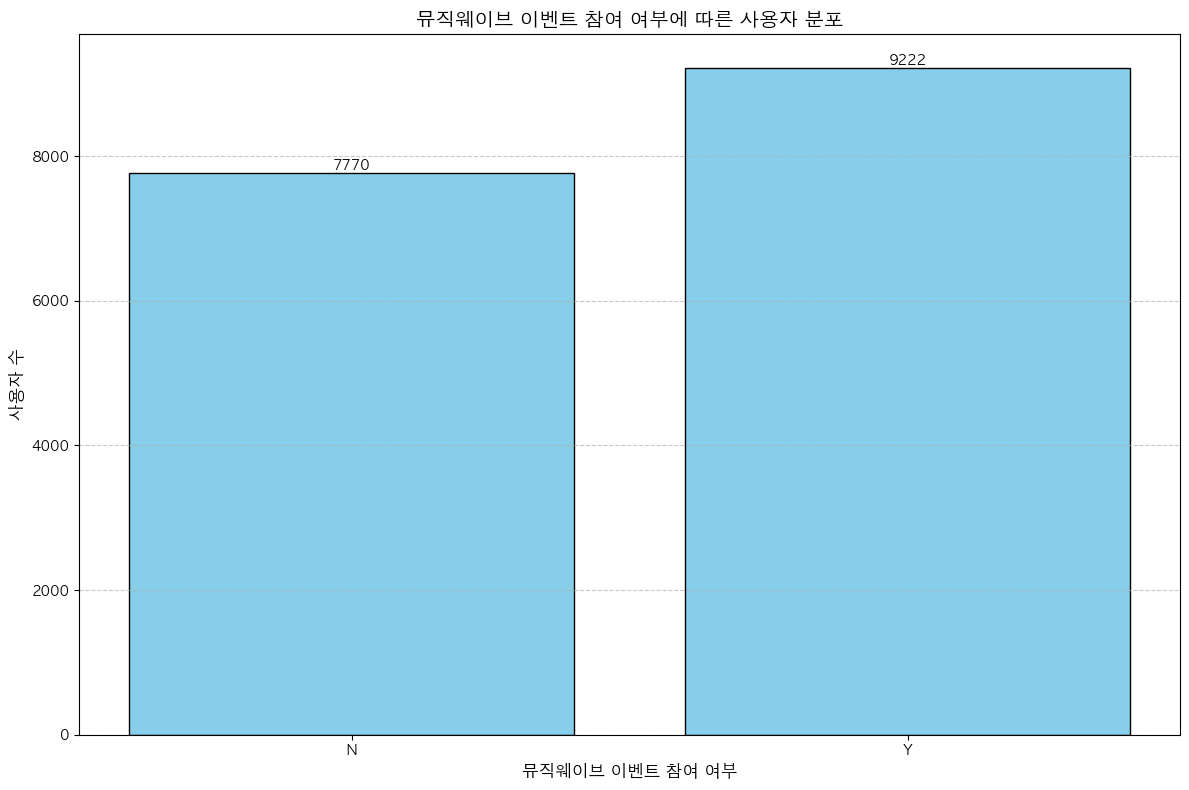

In [176]:
import matplotlib.pyplot as plt

# Bar Plot 생성
plt.figure(figsize=(12, 8))
bars = plt.bar(musicwave_event_df['musicwave_event_ent_yn'], musicwave_event_df['cnt'], color='skyblue', edgecolor='black')

# 각 막대 위에 cnt 값 표시
for bar, cnt in zip(bars, musicwave_event_df['cnt']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(cnt)}', 
             ha='center', va='bottom', fontsize=10, color='black')

# 그래프 꾸미기
plt.xlabel('뮤직웨이브 이벤트 참여 여부', fontsize=12)
plt.ylabel('사용자 수', fontsize=12)
plt.title('뮤직웨이브 이벤트 참여 여부에 따른 사용자 분포', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [2]:
# 아티스트별 팬덤 사용자 변화
fandom_user_query = '''
        select date(date_parse(t1.log_date,'%Y%m%d')) as dt
             , t1.artist_id
             , t2.artist_name_web_list
             , count(distinct t1.member_key) as user_cnt
             , count(if(t1.prod_hold_yn = 1,t1.member_Key)) as prod_hold_user_cnt
             , cast(count(if(prod_hold_yn = 1,member_Key)) as double)/cast(count(distinct member_key) as double)*100 as prod_hold_user_ratio
        from HADOOP_KENT.MELON_MA_PROD_PRODUCTION.A_USER_ARTIST_FANDOM_TRGT_DAY t1
        left join hadoop_kent.melon_ods_meta_production.pb_artist_dtl_tb_ro t2 on t1.artist_id = t2.artist_id
        where t1.log_date between '20240201' and '20250511'
        AND (CONTAINS(FANDOM_TYPE,'A')=true OR CONTAINS(FANDOM_TYPE,'B')=true OR CONTAINS(FANDOM_TYPE,'C')=true)
        and t1.artist_id in (3207401,3458776,3466604,3180539)
        group by 1,2,3
        order by 2,1
'''

cur.execute(fandom_user_query)

results = cur.fetchall()
colnames = [part[0] for part in cur.description]

fandom_user_df = pd.DataFrame(results, columns=colnames)

cur.cancel()
conn.close()
fandom_user_df.head()

,dt,artist_id,artist_name_web_list,user_cnt,prod_hold_user_cnt,prod_hold_user_ratio
0,2024-02-01,3180539,황영웅,9724,7067,72.675854
1,2024-02-02,3180539,황영웅,9728,7069,72.666530
2,2024-02-03,3180539,황영웅,9746,7075,72.593885
3,2024-02-04,3180539,황영웅,9757,7073,72.491545
4,2024-02-05,3180539,황영웅,9765,7072,72.421915


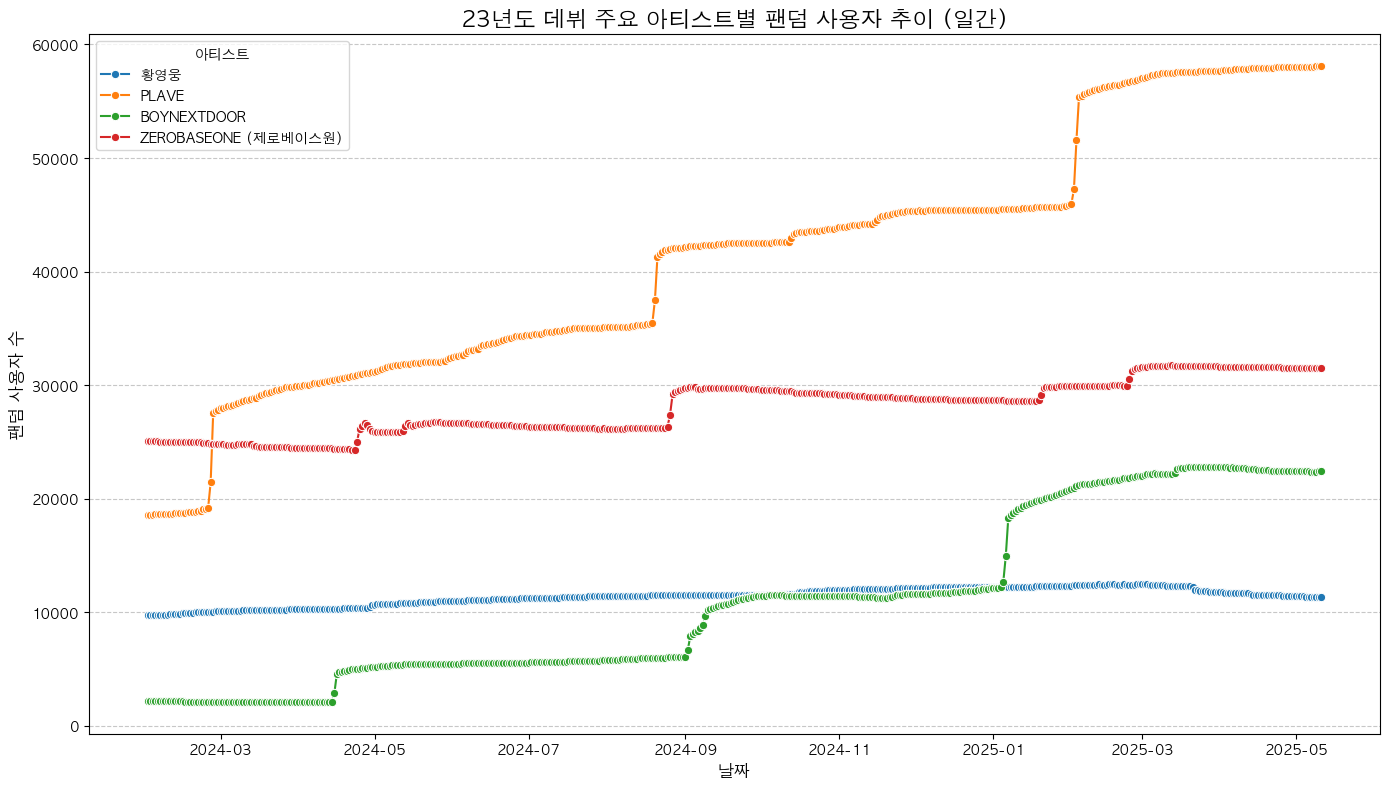

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 준비
fandom_user_df['dt'] = pd.to_datetime(fandom_user_df['dt'])  # 날짜 형식 변환

# 시각화 설정
plt.figure(figsize=(14, 8))
sns.lineplot(data=fandom_user_df, x='dt', y='user_cnt', hue='artist_name_web_list', marker='o')

# 그래프 꾸미기
plt.title('23년도 데뷔 주요 아티스트별 팬덤 사용자 추이 (일간)', fontsize=16)
plt.xlabel('날짜', fontsize=12)
plt.ylabel('팬덤 사용자 수', fontsize=12)
plt.legend(title='아티스트', fontsize=10)
plt.xticks(rotation=0, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# 그래프 출력
plt.show()

### 이벤트 별 응모자 중 팬덤상품 리텐션 비교

In [5]:
# 아티스트별 팬덤 사용자 변화
etc_fandom_prod_retention_query = '''
with event_df as(
select seq
         , event_id
         , parent_event_id
         , title
         , start_date
         , end_date
         , category
         , entry_target
         , winner_noti_date
         , gift_dp_name
         , case
            when event_id = 36742 then 725984
            when event_id = 36746 then 468244
            when event_id = 36750 then 725984
            when event_id = 36749 then 995173
            when event_id = 36757 then 4099078
            when event_id = 36741 then 476181
            when event_id = 36740 then 647971
            when event_id = 36743 then 253688
            when event_id = 36747 then 2880278
          end artist_id  
    from HADOOP_KENT.MELON_ODS_POC_PRODUCTION.EVENT_INFO_RO 
    where melon_short_date_format(start_date) > '20240201'
    and melon_short_date_format(end_date) < '20250322'
    and entry_target = 'PROD'
    and event_id in (36742,36746,36749,36757,36741,36740,36743,36747) --,36750
    --and category = '100065' /* 이벤트 종류 (100065 : 멜론 이벤트, 100066 : 앨범이벤트, 100067 : 공연이벤트, 100068 : 뮤직스토리이벤트, 100069 : 스토리 이벤트, 100070 : 패밀리앱 이벤트, 100071 : MWK 이벤트) */
), FANDOM_USER_DF AS(
    SELECT A.ARTIST_ID
         , A.MEMBER_KEY
    FROM HADOOP_KENT.MELON_MA_PROD_PRODUCTION.A_USER_ARTIST_FANDOM_TRGT_DAY A
    JOIN event_df B ON A.artist_id = B.artist_id
    WHERE LOG_DATE BETWEEN '20250301' AND '20250331'
    AND (CONTAINS(FANDOM_TYPE,'A')=true OR CONTAINS(FANDOM_TYPE,'B')=true OR CONTAINS(FANDOM_TYPE,'C')=true)
    GROUP BY 1,2
)

SELECT
    t1.DT
  , t1.artist_id
  , t1.NEW_PROD_YN
  , if(T1.EVENT_ID is null, t2.event_id,t1.event_id) as event_id
  , if(T1.EVENT_ID is null, t2.title,t1.title) as event_title
  , t1.EVENT_ENT_YN
  , t1.FST_PROD_CNT
  , t1.M1_PROD_CNT
  , IF(M1_PROD_CNT = 0, NULL, cast(M1_PROD_CNT  as double)/FST_PROD_CNT*100) AS m1_prod_rate
FROM (
    SELECT
        DATE_FORMAT(FST_DT, '%Y-%m') AS DT
      , artist_id
      , EVENT_ID
      , TITLE
      , EVENT_ENT_YN
      , NEW_PROD_YN
      , COUNT(DISTINCT FIRST_BUY_NO) AS FST_PROD_CNT
      , COUNT(DISTINCT IF(TERM = 1, BUY_NO, NULL))  AS M1_PROD_CNT 
    FROM (
        SELECT
            FST_DT
          , MEMBER_KEY
          , artist_id
          , EVENT_ID
          , TITLE
          , EVENT_ENT_YN
          , NEW_PROD_YN
          , FIRST_BUY_NO
          , DT
          , BUY_NO
          , IF(NEW_TERM = LAG(NEW_TERM) OVER (PARTITION BY FST_DT, FIRST_BUY_NO, MEMBER_KEY ORDER BY DT), NEW_TERM+1, NEW_TERM) AS TERM
          , DATE_DIFF('MONTH', DATE(DATE_FORMAT(FST_DT, '%Y-%m-01')), DATE(DATE(DATE_FORMAT(CURRENT_DATE, '%Y-%m-01')))) AS TEMP
        FROM (
            SELECT 
                FST_DT
              , FIRST_BUY_NO
              , MEMBER_KEY
              , artist_id
              , EVENT_ID
              , TITLE
              , EVENT_ENT_YN
              , NEW_PROD_YN
              , DT
              , BUY_NO
              , CASE
                    WHEN (BF_TERM + 1) = TERM THEN TERM
                    WHEN (BF_TERM + 1) <> TERM AND (MONTH(BF_DT) = MONTH(DT)) THEN (TERM + 1)
                    ELSE TERM
                END AS NEW_TERM
            FROM (
                SELECT FST_DT
                     , FIRST_BUY_NO
                     , MEMBER_KEY
                     , artist_id
                     , EVENT_ID
                     , TITLE
                     , EVENT_ENT_YN
                     , NEW_PROD_YN
                     , DT
                     , BUY_NO
                     , TERM
                     , COALESCE(LAG(DT)     OVER (PARTITION BY FST_DT, FIRST_BUY_NO, MEMBER_KEY ORDER BY DT), FST_DT) AS BF_DT
                     , COALESCE(LAG(BUY_NO) OVER (PARTITION BY FST_DT, FIRST_BUY_NO, MEMBER_KEY ORDER BY DT), FIRST_BUY_NO) AS BF_BUY_NO
                     , COALESCE(LAG(TERM)   OVER (PARTITION BY FST_DT, FIRST_BUY_NO, MEMBER_KEY ORDER BY DT), 0) AS BF_TERM
                FROM (
                    SELECT F1.DT AS FST_DT
                         , F3.EVENT_ID
                         , F3.TITLE -- 이벤트 타이틀
                         , F1.artist_id -- 팬덤 아티스트
                         , IF(F3.MEMBER_KEY IS NOT NULL,'Y','N') AS EVENT_ENT_YN -- 이벤트 참여여부
                         , F1.NEW_PROD_YN
                         , F1.FIRST_BUY_NO
                         , F1.MEMBER_KEY
                         , F2.BUY_NO
                         , F2.DT
                         , DATE_DIFF('MONTH', F1.DT, F2.DT) AS TERM
                    FROM (
                        select *
                        from(
                        SELECT DT
                             , FIRST_BUY_NO
                             , BUY_NO
                             , USER_MKEY AS MEMBER_KEY
                             , IF(T1.PROD_JOIN_PRT_CD = 1202,'기존상품','신규상품') AS NEW_PROD_YN
                             , t5.artist_id
                             , rank() over(partition by user_mkey,first_buy_no order by buy_no) as rnk -- 3월 1일 결제 > 3월 29일 자동결제 상품 케이스의 경우 3월1일 결제 상품 기준으로 집계
                        FROM HADOOP_KENT.MELON_MA_STAT_PRODUCTION.F_PROD_USER_FXMT_DT T1
                        JOIN HADOOP_KENT.MELON_MA_STAT_PRODUCTION.D_PROD T2  ON (T1.PROD_ID = T2.PROD_ID)
                        JOIN HADOOP_KENT.MELON_MA_STAT_PRODUCTION.D_PROMO T3 ON (T1.PROMO_ID = T3.PROMO_ID)
                        JOIN HADOOP_KENT.MELON_ODS_COMMERCE_PRODUCTION.CPT_PROD_TB_RO T4 ON (T1.PROD_ID = T4.PROD_ID)
                        join( --팬덤 사용자만 집계
                            select member_key,artist_id
                            from fandom_user_df
                            group by 1,2
                        ) T5 on t1.USER_MKEY = t5.MEMBER_KEY 
                        WHERE T1.LOG_DATE BETWEEN '20250301' AND '20250331'
                          AND MELON_SHORT_DATE_FORMAT(T1.DT) BETWEEN '20250301' AND '20250331'
                          AND PF_YN = 1
                          AND T2.PROD_ATTR_CD NOT IN (10040, 10050)
                          AND T1.PROD_JOIN_PRT_CD IN (1100, 1200, 1201, 1205, 1203,1206,1207,1202) /*신규 로직에서 1206 제외*/
                          AND T2.PROD_SELL_PRT_CD IN (60000) /*B2C*/
                          AND PROD_PRT_CD = 20000  /*클럽 상품*/
                        GROUP BY 1, 2, 3, 4, 5, 6
                        )
                        where rnk = 1
                    ) F1
                    LEFT OUTER JOIN (
                        SELECT DT
                             , FIRST_BUY_NO
                             , BUY_NO
                             , USER_MKEY AS MEMBER_KEY
                        FROM HADOOP_KENT.MELON_MA_STAT_PRODUCTION.F_PROD_USER_FXMT_DT  T1
                        JOIN HADOOP_KENT.MELON_MA_STAT_PRODUCTION.D_PROD               T2 ON (T1.PROD_ID = T2.PROD_ID)
                        JOIN HADOOP_KENT.MELON_MA_STAT_PRODUCTION.D_PROMO              T3 ON (T1.PROMO_ID = T3.PROMO_ID)
                        JOIN HADOOP_KENT.MELON_ODS_COMMERCE_PRODUCTION.CPT_PROD_TB_RO     T4 ON (T1.PROD_ID = T4.PROD_ID)
                        WHERE T1.LOG_DATE BETWEEN '20250301' AND '20250630'
                          AND MELON_SHORT_DATE_FORMAT(T1.DT) BETWEEN '20250301' AND '20250630'
                          AND PF_YN = 1
                          AND T2.PROD_ATTR_CD NOT IN (10040, 10050)
                          AND T1.PROD_JOIN_PRT_CD IN (1202) /*자결*/
                          AND T2.PROD_SELL_PRT_CD IN (60000) /*B2C*/
                          AND SELL_TYPE_CODE = 'ON1300'
                        GROUP BY 1, 2, 3, 4
                    ) F2 ON (F1.FIRST_BUY_NO = F2.FIRST_BUY_NO AND F1.MEMBER_KEY = F2.MEMBER_KEY AND F1.BUY_NO < F2.BUY_NO)
                    LEFT JOIN ( -- 이벤트 참여 여부 확인
                        SELECT A.MEMBER_KEY 
                             , A.event_id
                             , B.title
                             , B.artist_id
                        FROM HADOOP_KENT.MELON_ODS_POC_PRODUCTION.EVENT_ENTRY_MAIN_RO A
                        left join event_df B on A.event_id = B.event_id
                        join fandom_user_df C on A.member_Key = C.member_Key and B.artist_id = C.artist_id
                        WHERE MELON_SHORT_DATE_FORMAT(A.REG_DATE) BETWEEN '20250301' AND '20250321'
                        AND A.event_id in (36742,36746,36749,36757,36741,36740,36743,36747) --,36750
                        GROUP BY 1,2,3,4
                    ) F3 ON F1.MEMBER_KEY = F3.MEMBER_KEY AND F1.ARTIST_ID = F3.ARTIST_ID
                    GROUP BY 1,2,3,4,5,6,7,8,9,10,11   
                )
            )
        )
    )
--    WHERE TERM < TEMP
    GROUP BY 1,2,3,4,5,6
) T1
LEFT JOIN EVENT_DF T2 ON T1.ARTIST_ID = T2.ARTIST_ID
ORDER BY 4,3,6




'''

cur.execute(etc_fandom_prod_retention_query)

results = cur.fetchall()
colnames = [part[0] for part in cur.description]

etc_fandom_prod_retention_df = pd.DataFrame(results, columns=colnames)

cur.cancel()
conn.close()
etc_fandom_prod_retention_df.head()

,dt,artist_id,new_prod_yn,event_id,event_title,event_ent_yn,fst_prod_cnt,m1_prod_cnt,m1_prod_rate
0,2025-03,647971,기존상품,36740,비투비 댓글 이벤트,N,3788,3403,89.836325
1,2025-03,647971,기존상품,36740,비투비 댓글 이벤트,Y,215,197,91.627907
2,2025-03,647971,신규상품,36740,비투비 댓글 이벤트,N,664,461,69.427711
3,2025-03,647971,신규상품,36740,비투비 댓글 이벤트,Y,57,30,52.631579
4,2025-03,476181,기존상품,36741,인피니트 댓글 이벤트,N,1865,1646,88.257373


In [6]:
# 아티스트별 팬덤 사용자 변화
plave_fandom_prod_retention_query = '''
WITH FANDOM_USER_DF AS(
    SELECT SUBSTR(LOG_DATE,1,6) AS YM
         , MEMBER_KEY
    FROM HADOOP_KENT.MELON_MA_PROD_PRODUCTION.A_USER_ARTIST_FANDOM_TRGT_DAY 
    WHERE LOG_DATE BETWEEN '20250201' AND '20250228'
    AND ARTIST_ID = 3207401
    AND (CONTAINS(FANDOM_TYPE,'A')=true OR CONTAINS(FANDOM_TYPE,'B')=true OR CONTAINS(FANDOM_TYPE,'C')=true)
    GROUP BY 1,2
)

SELECT
    DT as dt
  , 3207401 AS artist_id
  , NEW_PROD_YN as new_prod_yn
  , 36723 AS event_id
  , '평생 PLAVE 마이획득뱃지 이벤트' AS event_title
  , EVENT_ENT_YN as event_ent_yn
  , FST_PROD_CNT as fst_prod_cnt
  , M1_PROD_CNT as m1_prod_cnt
  , IF(M1_PROD_CNT = 0, NULL, cast(M1_PROD_CNT  as double)/FST_PROD_CNT*100) AS m1_prod_rate  
FROM (
    SELECT
        DATE_FORMAT(FST_DT, '%Y-%m') AS DT
      , EVENT_ENT_YN
      , NEW_PROD_YN
      , COUNT(DISTINCT FIRST_BUY_NO) AS FST_PROD_CNT
      , COUNT(DISTINCT IF(TERM = 1, BUY_NO, NULL))  AS M1_PROD_CNT 
      , COUNT(DISTINCT IF(TERM = 2, BUY_NO, NULL))  AS M2_PROD_CNT 
      , COUNT(DISTINCT IF(TERM = 3, BUY_NO, NULL))  AS M3_PROD_CNT 
    FROM (
        SELECT
            FST_DT
          , MEMBER_KEY
          , EVENT_ENT_YN
          , NEW_PROD_YN
          , FIRST_BUY_NO
          , DT
          , BUY_NO
          , IF(NEW_TERM = LAG(NEW_TERM) OVER (PARTITION BY FST_DT, FIRST_BUY_NO, MEMBER_KEY ORDER BY DT), NEW_TERM+1, NEW_TERM) AS TERM
--          , DATE_DIFF('MONTH', DATE(DATE_FORMAT(FST_DT, '%Y-%m-01')), DATE(DATE(DATE_FORMAT(CURRENT_DATE, '%Y-%m-01')))) AS TEMP
        FROM (
            SELECT 
                FST_DT
              , FIRST_BUY_NO
              , MEMBER_KEY
              , EVENT_ENT_YN
              , NEW_PROD_YN
              , DT
              , BUY_NO
              , CASE
                    WHEN (BF_TERM + 1) = TERM THEN TERM
                    WHEN (BF_TERM + 1) <> TERM AND (MONTH(BF_DT) = MONTH(DT)) THEN (TERM + 1)
                    ELSE TERM
                END AS NEW_TERM
            FROM (
                SELECT
                    FST_DT
                  , FIRST_BUY_NO
                  , MEMBER_KEY
                  , EVENT_ENT_YN
                  , NEW_PROD_YN
                  , DT
                  , BUY_NO
                  , TERM
                  , COALESCE(LAG(DT)     OVER (PARTITION BY FST_DT, FIRST_BUY_NO, MEMBER_KEY ORDER BY DT), FST_DT) AS BF_DT
                  , COALESCE(LAG(BUY_NO) OVER (PARTITION BY FST_DT, FIRST_BUY_NO, MEMBER_KEY ORDER BY DT), FIRST_BUY_NO) AS BF_BUY_NO
                  , COALESCE(LAG(TERM)   OVER (PARTITION BY FST_DT, FIRST_BUY_NO, MEMBER_KEY ORDER BY DT), 0) AS BF_TERM
                FROM (
                    SELECT F1.DT AS FST_DT
                         , IF(F3.MEMBER_KEY IS NOT NULL,'Y','N') AS EVENT_ENT_YN
                         , F1.NEW_PROD_YN
                         , F1.FIRST_BUY_NO
                         , F1.MEMBER_KEY
                         , F2.BUY_NO
                         , F2.DT
                         , DATE_DIFF('MONTH', F1.DT, F2.DT) AS TERM
                    FROM (
                        SELECT DT
                             , FIRST_BUY_NO
                             , BUY_NO
                             , USER_MKEY AS MEMBER_KEY
                             , IF(T1.PROD_JOIN_PRT_CD = 1202,'기존상품','신규상품') AS NEW_PROD_YN
                             , rank() over(partition by user_mkey,first_buy_no order by buy_no) as rnk
                        FROM HADOOP_KENT.MELON_MA_STAT_PRODUCTION.F_PROD_USER_FXMT_DT T1
                        JOIN HADOOP_KENT.MELON_MA_STAT_PRODUCTION.D_PROD T2  ON (T1.PROD_ID = T2.PROD_ID)
                        JOIN HADOOP_KENT.MELON_MA_STAT_PRODUCTION.D_PROMO T3 ON (T1.PROMO_ID = T3.PROMO_ID)
                        JOIN HADOOP_KENT.MELON_ODS_COMMERCE_PRODUCTION.CPT_PROD_TB_RO T4 ON (T1.PROD_ID = T4.PROD_ID)
                        WHERE T1.LOG_DATE BETWEEN '20250201' AND '20250228'
                          AND MELON_SHORT_DATE_FORMAT(T1.DT) BETWEEN '20250201' AND '20250228'
                          AND PF_YN = 1
                          AND T2.PROD_ATTR_CD NOT IN (10040, 10050)
                          AND T1.PROD_JOIN_PRT_CD IN (1100, 1200, 1201, 1205, 1203,1206,1207,1202) /*신규 로직에서 1206 제외*/
                          AND T2.PROD_SELL_PRT_CD IN (60000) /*B2C*/
                          AND PROD_PRT_CD = 20000  /*클럽 상품*/
                        GROUP BY 1, 2, 3, 4, 5
                    ) F1
                    LEFT OUTER JOIN (
                        SELECT DT
                             , FIRST_BUY_NO
                             , BUY_NO
                             , USER_MKEY AS MEMBER_KEY
                        FROM HADOOP_KENT.MELON_MA_STAT_PRODUCTION.F_PROD_USER_FXMT_DT  T1
                        JOIN HADOOP_KENT.MELON_MA_STAT_PRODUCTION.D_PROD               T2 ON (T1.PROD_ID = T2.PROD_ID)
                        JOIN HADOOP_KENT.MELON_MA_STAT_PRODUCTION.D_PROMO              T3 ON (T1.PROMO_ID = T3.PROMO_ID)
                        JOIN HADOOP_KENT.MELON_ODS_COMMERCE_PRODUCTION.CPT_PROD_TB_RO     T4 ON (T1.PROD_ID = T4.PROD_ID)
                        WHERE T1.LOG_DATE BETWEEN '20250201' AND '20250630'
                          AND MELON_SHORT_DATE_FORMAT(T1.DT) BETWEEN '20250201' AND '20250630'
                          AND PF_YN = 1
                          AND T2.PROD_ATTR_CD NOT IN (10040, 10050)
                          AND T1.PROD_JOIN_PRT_CD IN (1202) /*자결*/
                          AND T2.PROD_SELL_PRT_CD IN (60000) /*B2C*/
                          AND SELL_TYPE_CODE = 'ON1300'
                        GROUP BY 1, 2, 3, 4
                    ) F2 ON (F1.FIRST_BUY_NO = F2.FIRST_BUY_NO AND F1.MEMBER_KEY = F2.MEMBER_KEY AND F1.BUY_NO < F2.BUY_NO)
                    LEFT JOIN (
                        SELECT MEMBER_KEY 
                        FROM HADOOP_KENT.MELON_ODS_POC_PRODUCTION.EVENT_ENTRY_MAIN_RO 
                        WHERE MELON_SHORT_DATE_FORMAT(REG_DATE) BETWEEN '20250228' AND '20250321'
                        AND EVENT_ID = 36723
                        GROUP BY 1
                    ) F3 ON (F1.MEMBER_KEY = F3.MEMBER_KEY AND MELON_SHORT_DATE_FORMAT(F1.DT) BETWEEN '20250201' AND '20250331')
                )
            )
        )
    ) T1
    JOIN FANDOM_USER_DF T2 ON DATE_FORMAT(T1.FST_DT, '%Y%m') = T2.YM AND T1.MEMBER_KEY = T2.MEMBER_KEY
    
--    WHERE TERM < TEMP
    GROUP BY 1,2,3
)
ORDER BY 1,2,3
'''

cur.execute(plave_fandom_prod_retention_query)

results = cur.fetchall()
colnames = [part[0] for part in cur.description]

plave_fandom_prod_retention_df = pd.DataFrame(results, columns=colnames)

cur.cancel()
conn.close()
plave_fandom_prod_retention_df.head()

,dt,artist_id,new_prod_yn,event_id,event_title,event_ent_yn,fst_prod_cnt,m1_prod_cnt,m1_prod_rate
0,2025-02,3207401,기존상품,36723,평생 PLAVE 마이획득뱃지 이벤트,Y,8620,7954,92.273782
1,2025-02,3207401,기존상품,36723,평생 PLAVE 마이획득뱃지 이벤트,N,11404,9996,87.653455
2,2025-02,3207401,신규상품,36723,평생 PLAVE 마이획득뱃지 이벤트,Y,4371,3256,74.490963
3,2025-02,3207401,신규상품,36723,평생 PLAVE 마이획득뱃지 이벤트,N,10892,6171,56.656261


In [7]:
import pandas as pd

# 두 DataFrame을 행 결합
fandom_prod_retention_df = pd.concat([plave_fandom_prod_retention_df, etc_fandom_prod_retention_df], ignore_index=True)

# 결합된 DataFrame 확인
print(fandom_prod_retention_df.head())
print(fandom_prod_retention_df.tail())

        dt  artist_id new_prod_yn  event_id          event_title event_ent_yn  \
0  2025-02    3207401        기존상품     36723  평생 PLAVE 마이획득뱃지 이벤트            Y   
1  2025-02    3207401        기존상품     36723  평생 PLAVE 마이획득뱃지 이벤트            N   
2  2025-02    3207401        신규상품     36723  평생 PLAVE 마이획득뱃지 이벤트            Y   
3  2025-02    3207401        신규상품     36723  평생 PLAVE 마이획득뱃지 이벤트            N   
4  2025-03     647971        기존상품     36740           비투비 댓글 이벤트            N   

   fst_prod_cnt  m1_prod_cnt  m1_prod_rate  
0          8620         7954     92.273782  
1         11404         9996     87.653455  
2          4371         3256     74.490963  
3         10892         6171     56.656261  
4          3788         3403     89.836325  
         dt  artist_id new_prod_yn  event_id                event_title  \
31  2025-03     995173        신규상품     36749  [스포트라이트] 제니 [Ruby] 발매 이벤트   
32  2025-03    4099078        기존상품     36757    KiiiKiii (키키) 댓글 이벤트 #1   
33  2025-03    409

In [14]:
fandom_prod_retention_df

,dt,artist_id,new_prod_yn,event_id,event_title,event_ent_yn,fst_prod_cnt,m1_prod_cnt,m1_prod_rate
0,2025-02,3207401,기존상품,36723,평생 PLAVE 마이획득뱃지 이벤트,Y,8620,7954,92.273782
1,2025-02,3207401,기존상품,36723,평생 PLAVE 마이획득뱃지 이벤트,N,11404,9996,87.653455
2,2025-02,3207401,신규상품,36723,평생 PLAVE 마이획득뱃지 이벤트,Y,4371,3256,74.490963
3,2025-02,3207401,신규상품,36723,평생 PLAVE 마이획득뱃지 이벤트,N,10892,6171,56.656261
4,2025-03,647971,기존상품,36740,비투비 댓글 이벤트,N,3788,3403,89.836325
5,2025-03,647971,기존상품,36740,비투비 댓글 이벤트,Y,215,197,91.627907
6,2025-03,647971,신규상품,36740,비투비 댓글 이벤트,N,664,461,69.427711
7,2025-03,647971,신규상품,36740,비투비 댓글 이벤트,Y,57,30,52.631579
8,2025-03,476181,기존상품,36741,인피니트 댓글 이벤트,N,1865,1646,88.257373
9,2025-03,476181,기존상품,36741,인피니트 댓글 이벤트,Y,318,295,92.767296


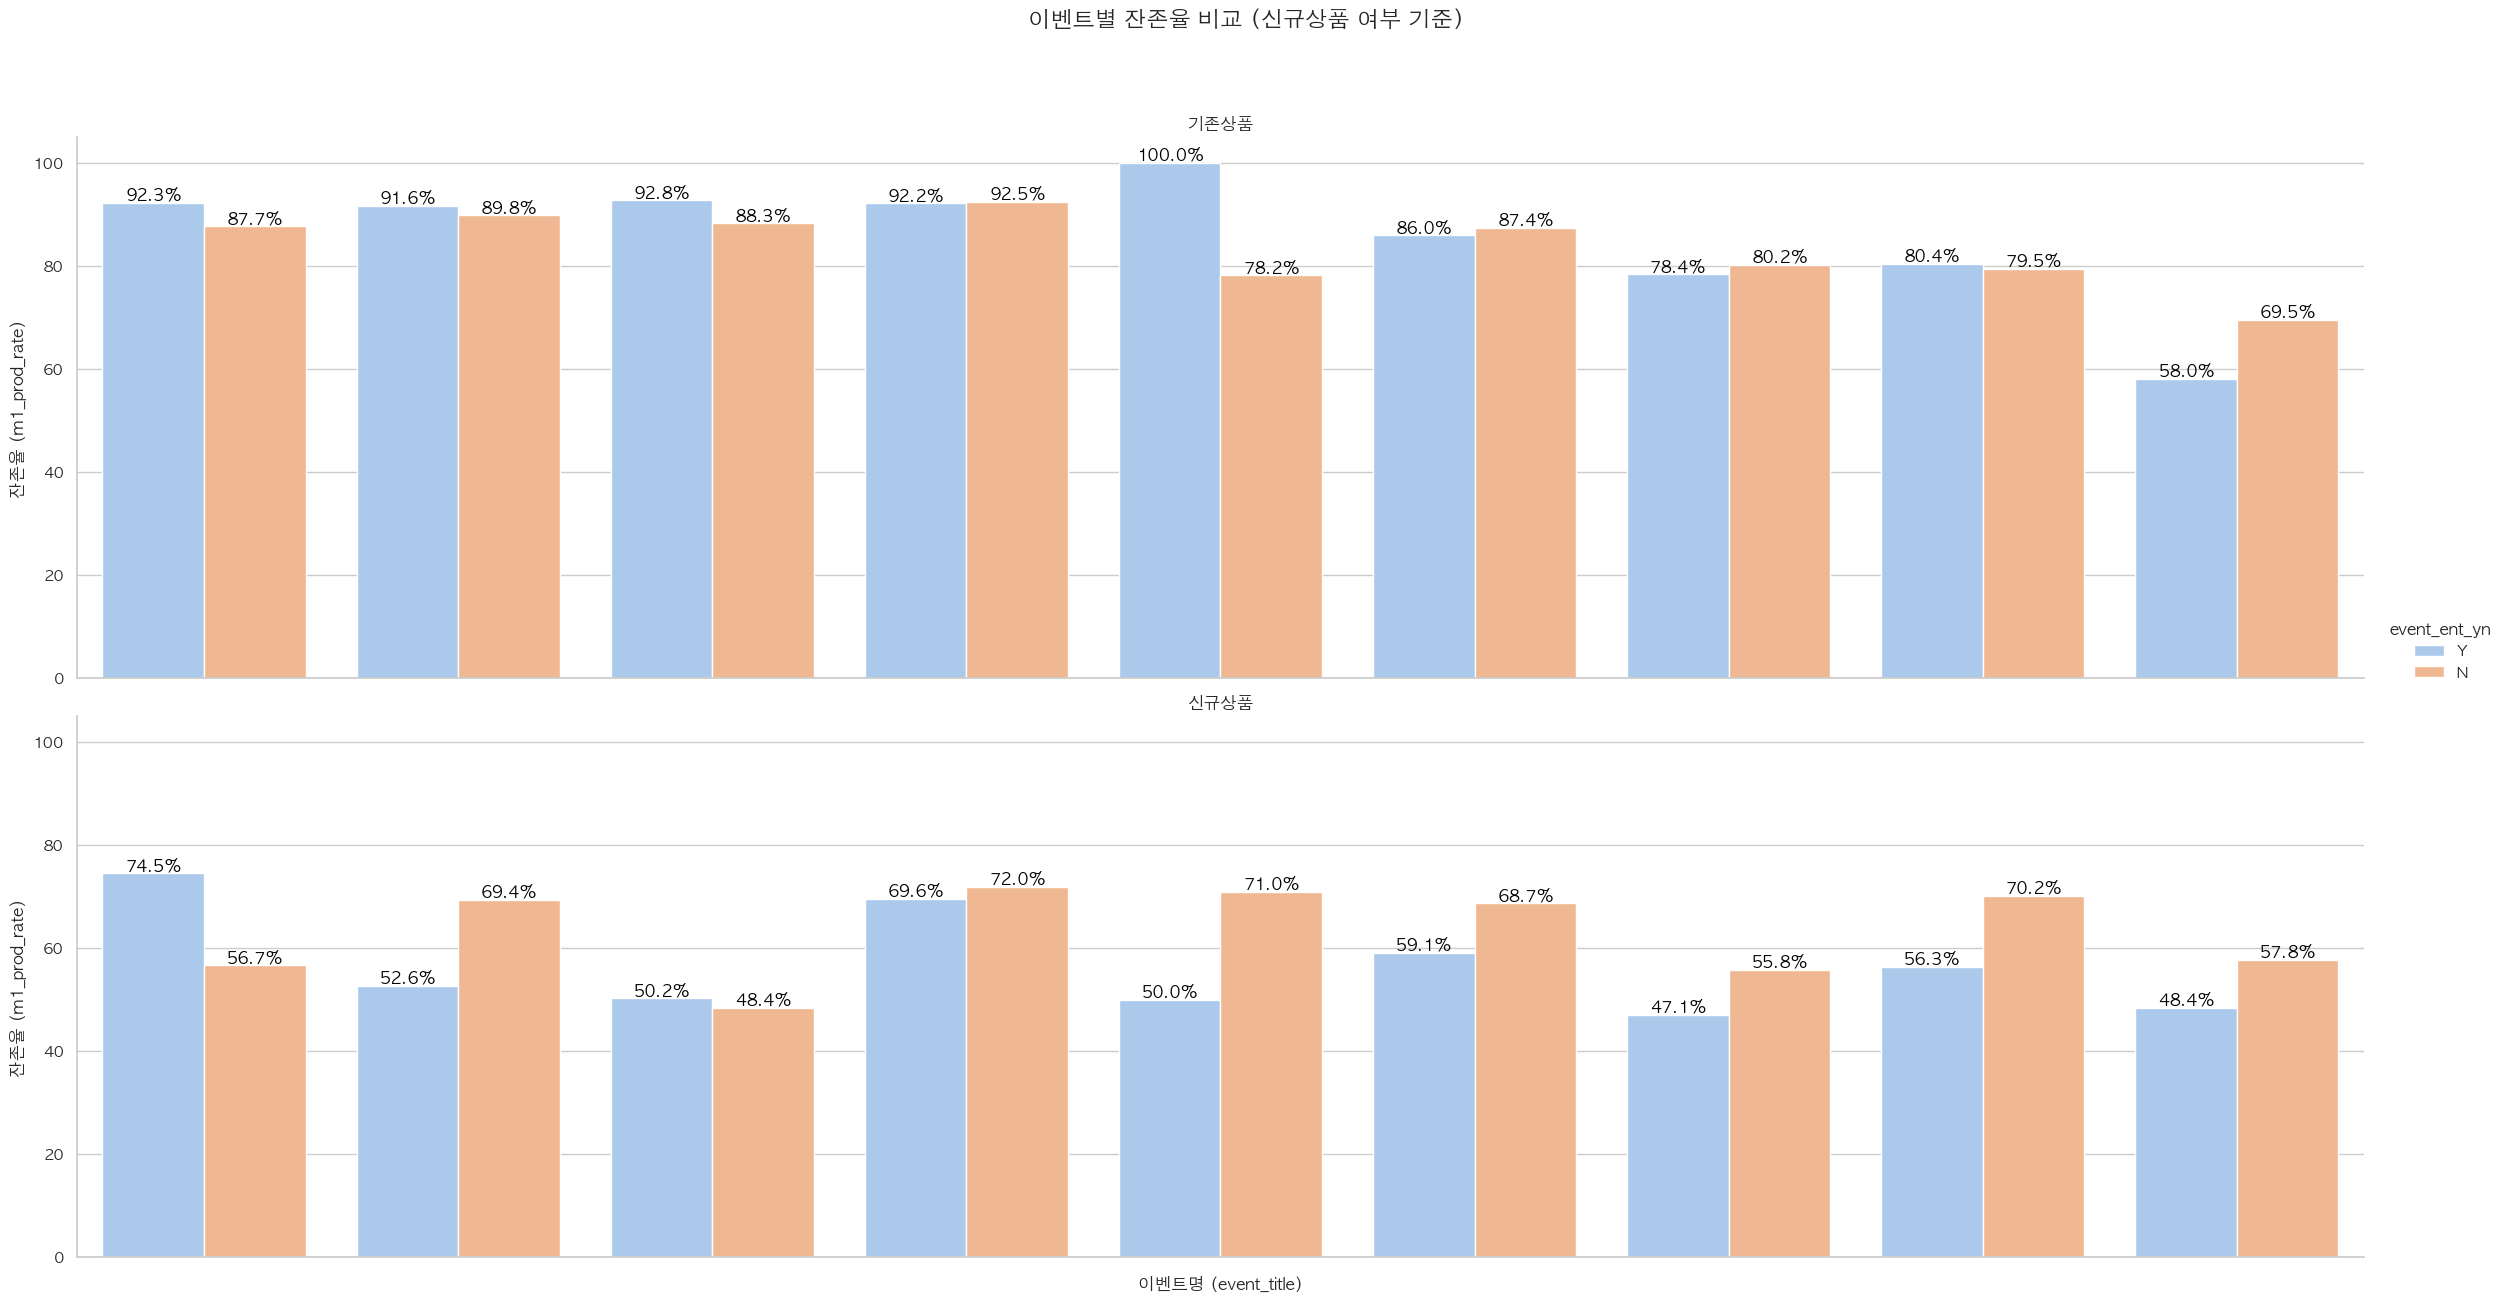

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import font_manager as fm

# Seaborn 스타일 설정
sns.set(style="whitegrid")

# 폰트 설정
font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'  # MacOS 예시
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# FacetGrid를 사용하여 신규상품 여부(new_prod_yn) 기준으로 나누기
g = sns.catplot(
    data=fandom_prod_retention_df,
    x="event_title",
    y="m1_prod_rate",
    hue="event_ent_yn",
    row="new_prod_yn",
    kind="bar",
    height=8,
    aspect=3,
    palette="pastel"
)

# 하단 여백 추가
g.fig.subplots_adjust(bottom=0.2)  

# 각 막대 위에 데이터 라벨 추가
for ax in g.axes.flat:
    for bar in ax.patches:
        height = bar.get_height()
        if height > 0:  # 높이가 0인 경우 제외
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height,
                f"{height:.1f}%",
                ha="center",
                va="bottom",
                fontsize=12,
                color="black"
            )

# x축 레이블 줄바꿈 추가
fandom_prod_retention_df['event_title'] = fandom_prod_retention_df['event_title'].apply(
    lambda x: '\n'.join(x.split(' '))
)

# x축 레이블 설정
for ax in g.axes.flat:
    ax.set_xticks(ax.get_xticks())  # 틱 위치를 고정
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=10)
    
# 그래프 제목 및 레이아웃 설정
g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.set_axis_labels("이벤트명 (event_title)", "잔존율 (m1_prod_rate)")
g.fig.subplots_adjust(top=0.9)  # 상단 여백 조정
g.fig.suptitle("이벤트별 잔존율 비교 (신규상품 여부 기준)", fontsize=16)

# 그래프 출력
plt.show()

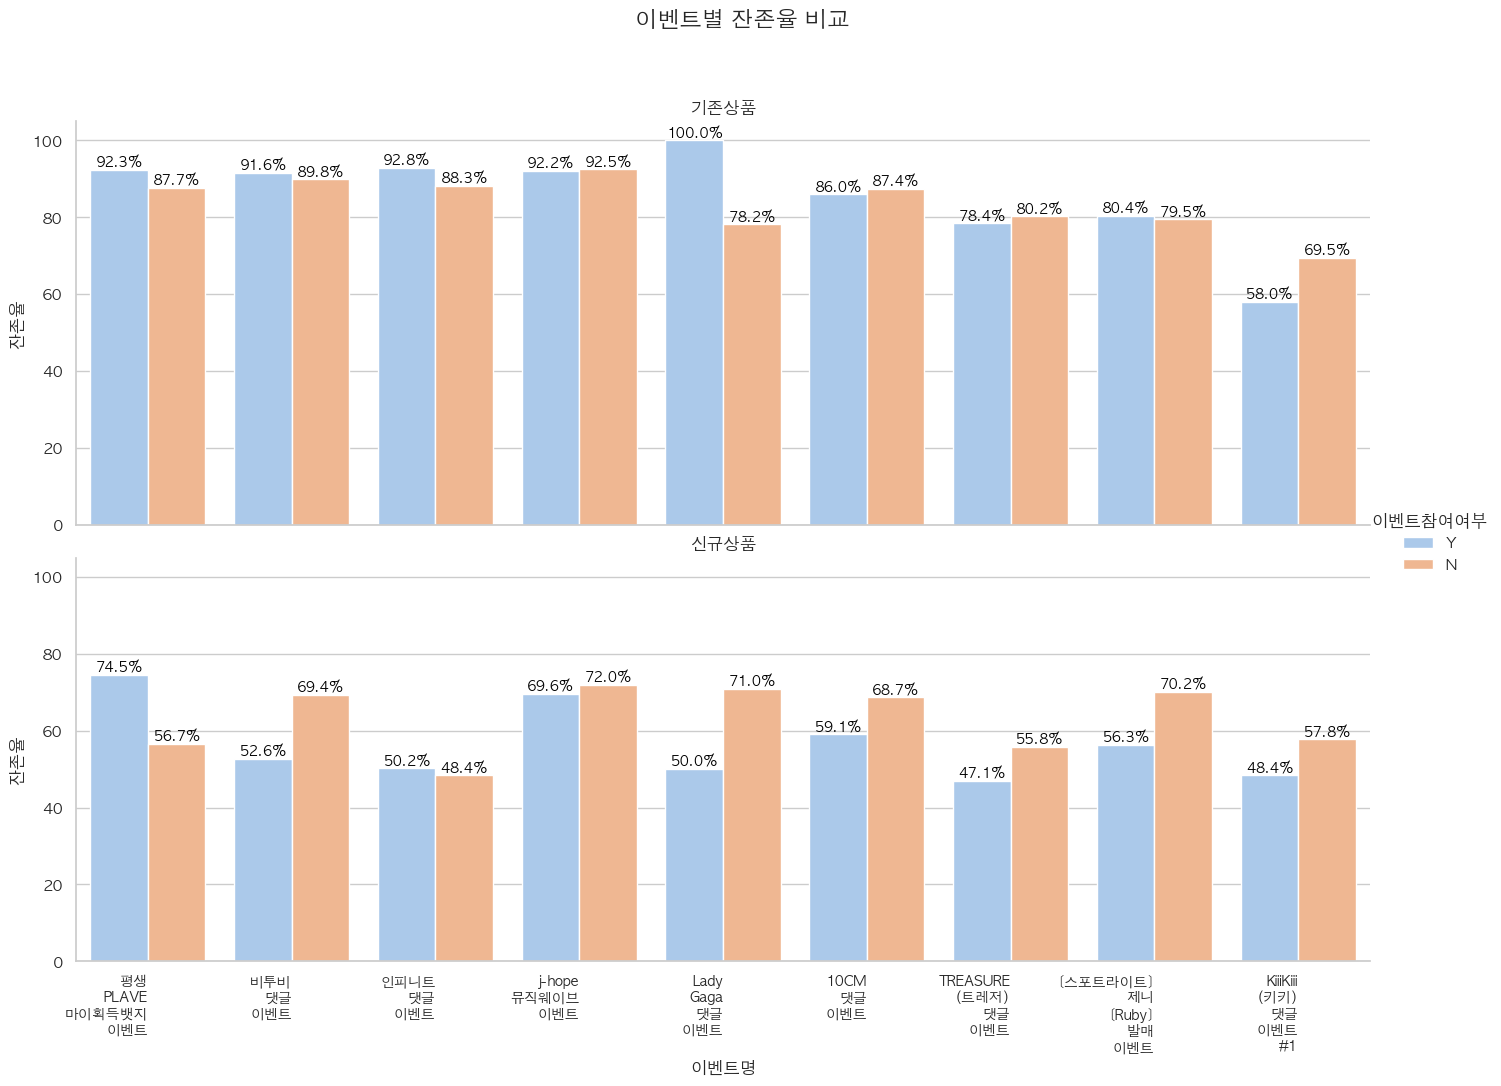

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import font_manager as fm

# Seaborn 스타일 설정
sns.set(style="whitegrid")

# 폰트 설정
font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'  # MacOS 예시
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# FacetGrid를 사용하여 신규상품 여부(new_prod_yn) 기준으로 나누기
g = sns.catplot(
    data=fandom_prod_retention_df,
    x="event_title",
    y="m1_prod_rate",
    hue="event_ent_yn",
    row="new_prod_yn",
    kind="bar",
    height=7,
    aspect=2,
    palette="pastel"
)

# 각 막대 위에 데이터 라벨 추가
for ax in g.axes.flat:
    for bar in ax.patches:
        height = bar.get_height()
        if height > 0:  # 높이가 0인 경우 제외
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height,
                f"{height:.1f}%",
                ha="center",
                va="bottom",
                fontsize=10,
                color="black"
            )

# x축 레이블 설정
for ax in g.axes.flat:
    ax.set_xticks(range(len(fandom_prod_retention_df['event_title'].unique())))
    ax.set_xticklabels(fandom_prod_retention_df['event_title'].unique(), ha="right", fontsize=10)

# Legend 타이틀 변경
g._legend.set_title("이벤트참여여부")

# 그래프 제목 및 레이아웃 설정
g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.set_axis_labels("이벤트명", "잔존율")
g.fig.subplots_adjust(top=0.9, bottom=0.3)  # 상단 및 하단 여백 조정
g.fig.suptitle("이벤트별 잔존율 비교", fontsize=16)

# 그래프 출력
plt.show()

## 플레이브 뱃지 이벤트 외부유입 경로 

In [45]:
# 외부유입 일간 트래픽 추이
inflow_pageview_day_query = '''
    select date(A.reg_date) as dt
         , inflow_place_code    
         , inflow_prt_nm
         , count(distinct A.member_key) as pageview_user_cnt
         , count(1) as pageview_cnt
    from hadoop_kent.melon_ods_stat_production.o_pv_log_ro A
    LEFT JOIN HADOOP_KENT.MELON_MA_STAT_PRODUCTION.D_INFLOW_PRT C ON A.INFLOW_PLACE_CODE = C.INFLOW_PRT_CODE
    where A.log_date between '20250228' and '20250321'
    and melon_short_date_format(A.reg_date) between '20250227' and '20250322' 
    and A.menu_id = 1000000386
    and conts_id = '36723'
    and inflow_prt_nm is not null
    group by 1,2,3
'''

cur.execute(inflow_pageview_day_query)

results = cur.fetchall()
colnames = [part[0] for part in cur.description]

inflow_pageview_day = pd.DataFrame(results, columns=colnames)

cur.cancel()
conn.close()
inflow_pageview_day.head()


,dt,inflow_place_code,inflow_prt_nm,pageview_user_cnt,pageview_cnt
0,2025-03-11,W103,포털>구글,1,1
1,2025-03-21,W103,포털>구글,1,1
2,2025-03-14,W103,포털>구글,1,1
3,2025-03-13,W20336,SNS>카카오톡>이벤트,6,11
4,2025-03-04,W20336,SNS>카카오톡>이벤트,16,34


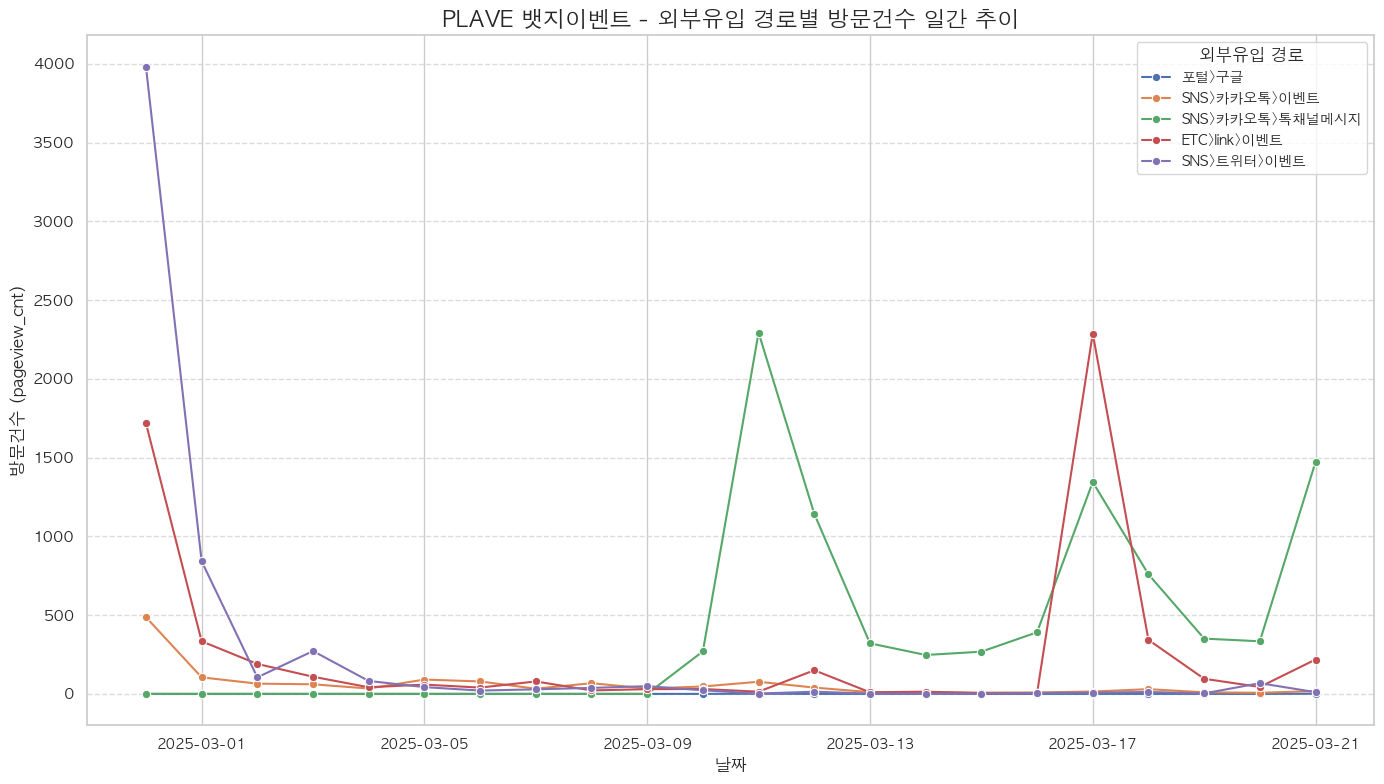

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# inflow_pageview_day 데이터프레임 예시
# inflow_pageview_day = pd.DataFrame({
#     'dt': ['2025-02-28', '2025-03-01', '2025-03-02', '2025-03-01', '2025-03-03'],
#     'inflow_prt_nm': ['경로A', '경로A', '경로A', '경로B', '경로B'],
#     'pageview_cnt': [100, 150, 200, 50, 80]
# })
# inflow_pageview_day['dt'] = pd.to_datetime(inflow_pageview_day['dt'])

# 날짜 범위 생성
date_range = pd.date_range(
    start=inflow_pageview_day['dt'].min(),
    end=inflow_pageview_day['dt'].max()
)

# 모든 경로와 날짜 조합 생성
all_combinations = pd.MultiIndex.from_product(
    [date_range, inflow_pageview_day['inflow_prt_nm'].unique()],
    names=['dt', 'inflow_prt_nm']
)

# 데이터프레임 재구성 (비어있는 일자 채우기)
inflow_pageview_day = inflow_pageview_day.set_index(['dt', 'inflow_prt_nm'])
inflow_pageview_day = inflow_pageview_day.reindex(all_combinations, fill_value=0).reset_index()

# Line Plot 생성
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=inflow_pageview_day,
    x='dt',
    y='pageview_cnt',
    hue='inflow_prt_nm',
    marker='o'
)

# 그래프 꾸미기
plt.title('PLAVE 뱃지이벤트 - 외부유입 경로별 방문건수 일간 추이', fontsize=16)
plt.xlabel('날짜', fontsize=12)
plt.ylabel('방문건수 (pageview_cnt)', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.legend(title='외부유입 경로', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# 그래프 출력
plt.show()

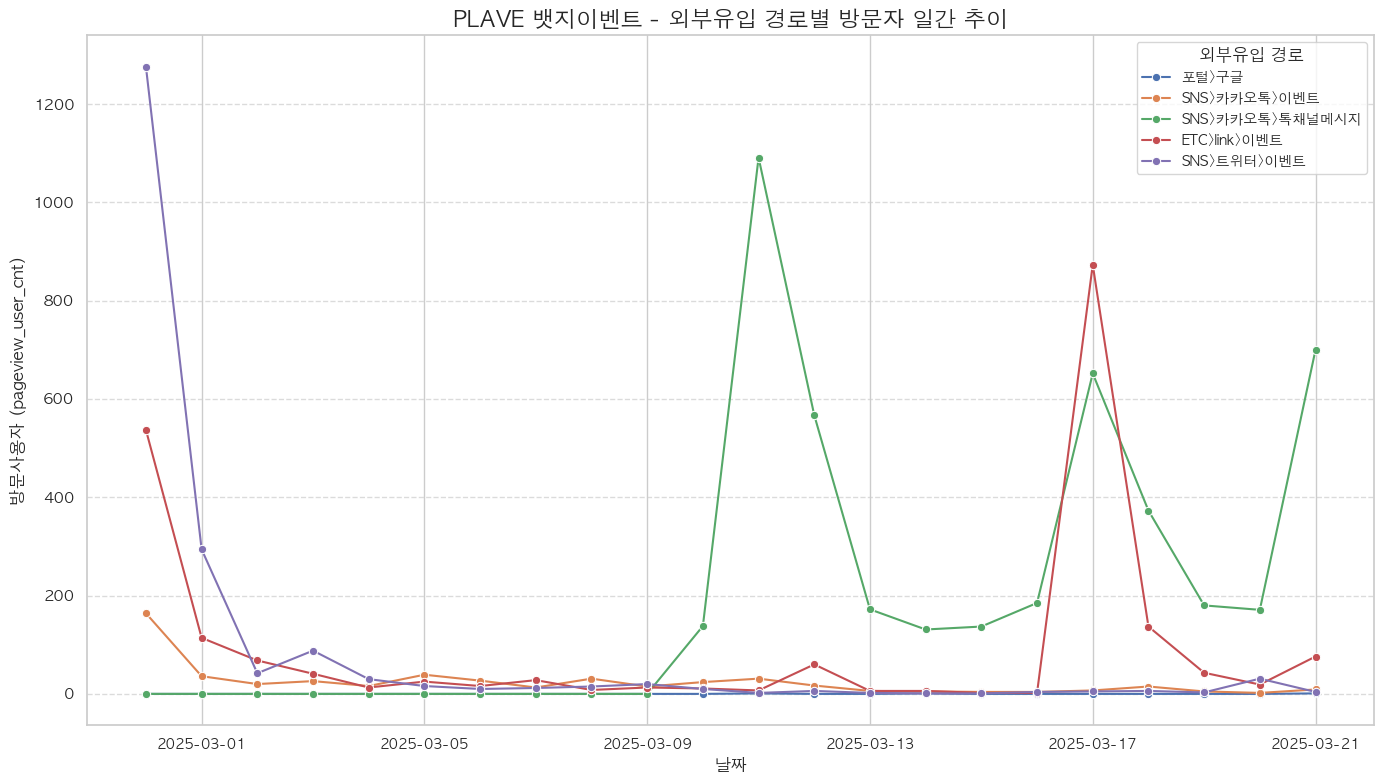

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# inflow_pageview_day 데이터프레임 예시
# inflow_pageview_day = pd.DataFrame({
#     'dt': ['2025-02-28', '2025-03-01', '2025-03-02', '2025-03-01', '2025-03-03'],
#     'inflow_prt_nm': ['경로A', '경로A', '경로A', '경로B', '경로B'],
#     'pageview_cnt': [100, 150, 200, 50, 80]
# })
# inflow_pageview_day['dt'] = pd.to_datetime(inflow_pageview_day['dt'])

# 날짜 범위 생성
date_range = pd.date_range(
    start=inflow_pageview_day['dt'].min(),
    end=inflow_pageview_day['dt'].max()
)

# 모든 경로와 날짜 조합 생성
all_combinations = pd.MultiIndex.from_product(
    [date_range, inflow_pageview_day['inflow_prt_nm'].unique()],
    names=['dt', 'inflow_prt_nm']
)

# 데이터프레임 재구성 (비어있는 일자 채우기)
inflow_pageview_day = inflow_pageview_day.set_index(['dt', 'inflow_prt_nm'])
inflow_pageview_day = inflow_pageview_day.reindex(all_combinations, fill_value=0).reset_index()

# Line Plot 생성
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=inflow_pageview_day,
    x='dt',
    y='pageview_user_cnt',
    hue='inflow_prt_nm',
    marker='o'
)

# 그래프 꾸미기
plt.title('PLAVE 뱃지이벤트 - 외부유입 경로별 방문자 일간 추이', fontsize=16)
plt.xlabel('날짜', fontsize=12)
plt.ylabel('방문사용자 (pageview_user_cnt)', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.legend(title='외부유입 경로', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# 그래프 출력
plt.show()

In [46]:
# 외부유입 지표
inflow_pageview_query = '''
    select inflow_prt_nm
         , inflow_place_code
         , count(distinct A.member_key) as pageview_user_cnt
         , count(1) as pageview_cnt
    from hadoop_kent.melon_ods_stat_production.o_pv_log_ro A
    LEFT JOIN HADOOP_KENT.MELON_MA_STAT_PRODUCTION.D_INFLOW_PRT C ON A.INFLOW_PLACE_CODE = C.INFLOW_PRT_CODE
    where A.log_date between '20250228' and '20250321'
    and melon_short_date_format(A.reg_date) between '20250227' and '20250322' 
    and A.menu_id = 1000000386
    and conts_id = '36723'
    and inflow_prt_nm is not null
    group by 1,2
    order by 3 desc
'''

cur.execute(inflow_pageview_query)

results = cur.fetchall()
colnames = [part[0] for part in cur.description]

inflow_pageview = pd.DataFrame(results, columns=colnames)

cur.cancel()
conn.close()
inflow_pageview.head()

,inflow_prt_nm,inflow_place_code,pageview_user_cnt,pageview_cnt
0,SNS>카카오톡>톡채널메시지,W20335,3719,9195
1,ETC>link>이벤트,W91001,1815,5839
2,SNS>트위터>이벤트,W20203,1690,5616
3,SNS>카카오톡>이벤트,W20336,384,1341
4,포털>구글,W103,2,3


### 이벤트 아티스트 
- 22년도 데뷔후 주요 아티스트들의 팬덤 분포(연령대,성별)
- 남자 순위 여자순위.
- 남성 비중, 여성비중 ~ 팬덤 사용자 증감 상관계수

In [3]:
# 남성,여성비중 증감과 팬덤 사용자 증감 상관성 분석 
fandom_user_gndr_query = '''
    select t1.artist_id
         , t2.artist_name_web_list
         , t2.debut_day
         , t1.dt
         , t1.user_cnt 
         , t1.male_user_cnt
         , t1.female_user_cnt
         , cast(t1.female_user_cnt as double)/t1.user_cnt*100 as female_user_ratio
         , t1.age_102030_user_cnt
         , cast(t1.age_102030_user_cnt as double)/t1.user_cnt*100 as age_102030_user_ratio
    from(
        select artist_id             
             , date(date_parse(log_date,'%Y%m%d')) as dt
             , count(distinct A.member_key) as user_cnt
             , count(distinct if(MEMBER_GNDR = 1,A.member_key)) as male_user_cnt
             , count(distinct if(MEMBER_GNDR = 2,A.member_key)) as female_user_cnt
             , count(distinct if(AGE_ENT_PRT_CD in (1,23,4,5,6),A.member_key)) as age_102030_user_cnt
        from HADOOP_KENT.MELON_MA_PROD_PRODUCTION.A_USER_ARTIST_FANDOM_TRGT_DAY  A
        left join(
            select MEMBER_KEY
                 , MEMBER_GNDR
                 , AGE_ENT_PRT_CD
            from HADOOP_KENT.MELON_MA_TMK_PRODUCTION.A_USER_PROFILE_DAY
            where log_date = '20250511'
            GROUP BY 1,2,3
        ) B on A.member_key = B.member_key
        where log_date between '20240101' and '20250511'
        and (CONTAINS(FANDOM_TYPE,'A')=true OR CONTAINS(FANDOM_TYPE,'B')=true OR CONTAINS(FANDOM_TYPE,'C')=true)
        and artist_id in (3207401,3466604,3458776,3478478,3114174,3180539,3064111,3092950,3070786,3610529,3743525,3457231,3156910,2399724)
        and B.member_key is not null
        group by 1,2
    ) t1    
    left join hadoop_kent.melon_ods_meta_production.pb_artist_dtl_tb_ro t2 on t1.artist_id = t2.artist_id
    order by 1,4
'''

cur.execute(fandom_user_gndr_query)

results = cur.fetchall()
colnames = [part[0] for part in cur.description]

fandom_user_gndr = pd.DataFrame(results, columns=colnames)

cur.cancel()
conn.close()
fandom_user_gndr.head()

,artist_id,artist_name_web_list,debut_day,dt,user_cnt,male_user_cnt,female_user_cnt,female_user_ratio,age_102030_user_cnt,age_102030_user_ratio
0,2399724,YENA (최예나),20220117,2024-01-01,2894,1606,1288,44.505874,1101,38.044229
1,2399724,YENA (최예나),20220117,2024-01-02,2893,1606,1287,44.486692,1101,38.057380
2,2399724,YENA (최예나),20220117,2024-01-03,2894,1607,1287,44.471320,1101,38.044229
3,2399724,YENA (최예나),20220117,2024-01-04,2893,1607,1286,44.452126,1101,38.057380
4,2399724,YENA (최예나),20220117,2024-01-05,2893,1607,1286,44.452126,1101,38.057380


    artist_name_web_list  male_corr  female_corr
0            BOYNEXTDOOR   0.934122     0.999043
1            FIFTY FIFTY   0.988347     0.981014
2           H1-KEY (하이키)   0.986073     0.989127
3     LE SSERAFIM (르세라핌)   0.990987     0.994317
4                  NMIXX   0.984084     0.973457
5               NewJeans   0.964663     0.994484
6                  PLAVE   0.948884     0.999501
7                   QWER   0.982112     0.860525
8                  RIIZE   0.936901     0.999255
9             YENA (최예나)   0.999135     0.998519
10  ZEROBASEONE (제로베이스원)   0.808898     0.953284
11                아이리 칸나   0.987252     0.795778
12            아일릿(ILLIT)   0.983038     0.996509
13                   황영웅   0.828244     0.997023


/var/folders/qw/6lks7c5d14scf7qtctm8m6jh0000gn/T/ipykernel_72858/86026136.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_results = correlation_data.groupby('artist_name_web_list').apply(


<Figure size 1200x800 with 0 Axes>

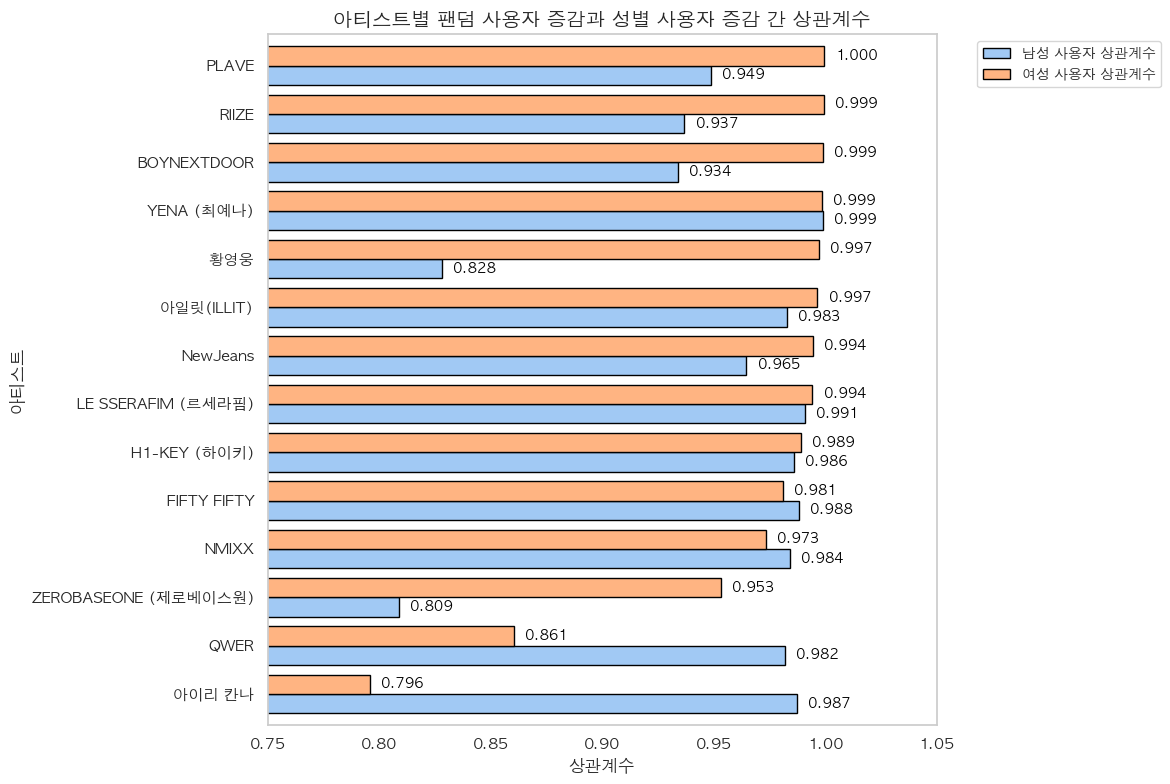

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드 (fandom_user_gndr 데이터프레임이 이미 준비되어 있다고 가정)
# fandom_user_gndr = pd.DataFrame(...) 

# 남성 사용자 증감과 여성 사용자 증감을 계산
fandom_user_gndr['male_user_diff'] = fandom_user_gndr.groupby('artist_name_web_list')['male_user_cnt'].diff()
fandom_user_gndr['female_user_diff'] = fandom_user_gndr.groupby('artist_name_web_list')['female_user_cnt'].diff()
fandom_user_gndr['user_diff'] = fandom_user_gndr.groupby('artist_name_web_list')['user_cnt'].diff()

# 상관성 분석을 위한 데이터 필터링 (NaN 제거)
correlation_data = fandom_user_gndr.dropna(subset=['male_user_diff', 'female_user_diff', 'user_diff'])

# 아티스트별 상관계수 계산
correlation_results = correlation_data.groupby('artist_name_web_list').apply(
    lambda group: pd.Series({
        'male_corr': group['user_diff'].corr(group['male_user_diff']),
        'female_corr': group['user_diff'].corr(group['female_user_diff'])
    })
).reset_index()

# 결과 출력
print(correlation_results)

# 여성 사용자 상관계수 기준으로 내림차순 정렬
correlation_results_sorted = correlation_results.sort_values(by='female_corr', ascending=True)

# 시각화: 아티스트별 상관계수 비교 (수평 막대 그래프)
plt.figure(figsize=(12, 8))
ax = correlation_results_sorted.set_index('artist_name_web_list')[['male_corr', 'female_corr']].plot(
    kind='barh', figsize=(12, 8), color=sns.color_palette("pastel", 2), edgecolor='black', width=0.8
)

plt.title('아티스트별 팬덤 사용자 증감과 성별 사용자 증감 간 상관계수', fontsize=14)
plt.xlabel('상관계수', fontsize=12)
plt.ylabel('아티스트', fontsize=12)

# x축 범위를 0.75~1.0으로 설정
plt.xlim(0.75, 1.05)

# 각 막대 끝에 상관계수 값 추가
for bars, corr_label in zip(ax.containers, ['male_corr', 'female_corr']):
    for bar in bars:
        width = bar.get_width()
        plt.text(
            width + 0.005,  # 막대 끝에서 약간 오른쪽으로 위치
            bar.get_y() + bar.get_height() / 2,  # 막대의 중앙에 위치
            f'{width:.3f}',  # 소수점 두 자리까지 표시
            ha='left', va='center', fontsize=10, color='black'
        )

# 범례를 그래프 바깥으로 이동
plt.legend(['남성 사용자 상관계수', '여성 사용자 상관계수'], fontsize=10, loc='upper left', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()

In [115]:
fandom_user_gndr.describe()
fandom_user_gndr.info()
fandom_user_gndr.head(20)
fandom_user_gndr.tail(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6874 entries, 0 to 6873
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   artist_id             6874 non-null   int64         
 1   artist_name_web_list  6874 non-null   object        
 2   debut_day             5880 non-null   object        
 3   dt                    6874 non-null   datetime64[ns]
 4   user_cnt              6874 non-null   int64         
 5   male_user_cnt         6874 non-null   int64         
 6   female_user_cnt       6874 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 376.1+ KB


,artist_id,artist_name_web_list,debut_day,dt,user_cnt,male_user_cnt,female_user_cnt
6854,3743525,아일릿(ILLIT),20240300,2025-04-22,2151,718,1433
6855,3743525,아일릿(ILLIT),20240300,2025-04-23,2152,717,1435
6856,3743525,아일릿(ILLIT),20240300,2025-04-24,2151,716,1435
6857,3743525,아일릿(ILLIT),20240300,2025-04-25,2153,716,1437
6858,3743525,아일릿(ILLIT),20240300,2025-04-26,2151,716,1435
6859,3743525,아일릿(ILLIT),20240300,2025-04-27,2150,715,1435
6860,3743525,아일릿(ILLIT),20240300,2025-04-28,2149,716,1433
6861,3743525,아일릿(ILLIT),20240300,2025-04-29,2147,714,1433
6862,3743525,아일릿(ILLIT),20240300,2025-04-30,2147,713,1434
6863,3743525,아일릿(ILLIT),20240300,2025-05-01,2146,714,1432


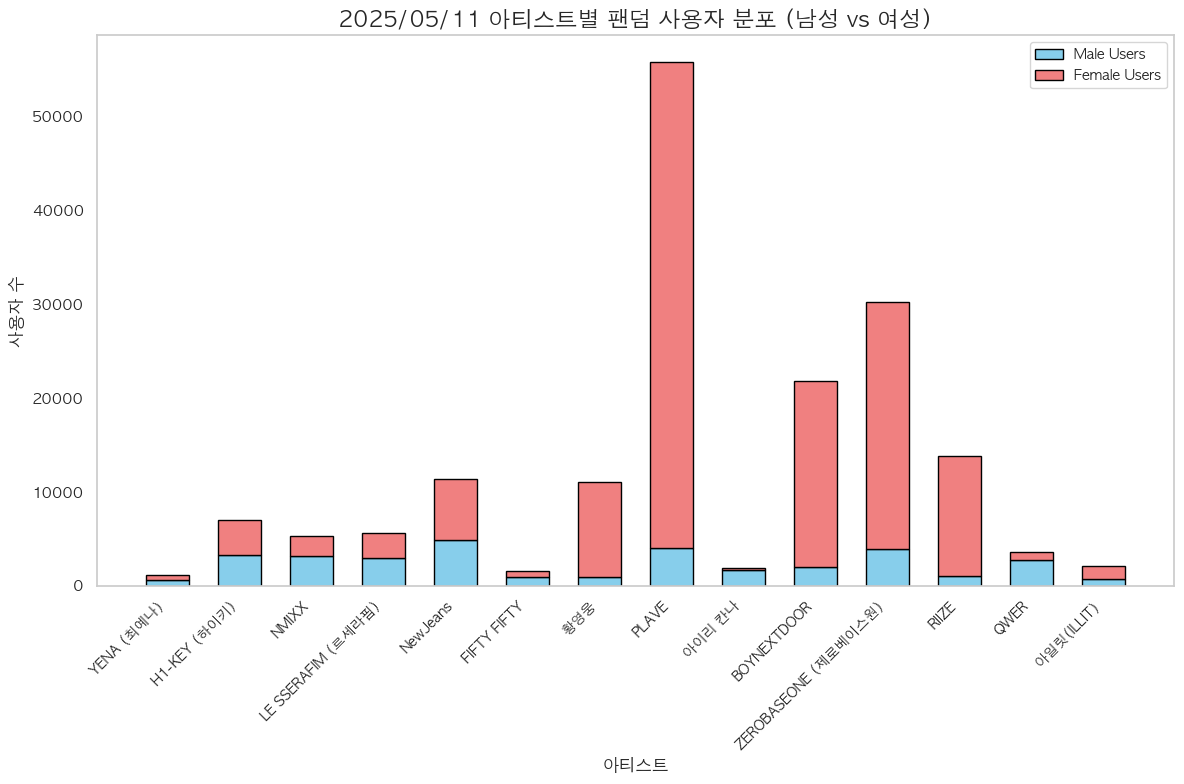

In [122]:
import pandas as pd
import matplotlib.pyplot as plt

# 'dt' 컬럼의 데이터 타입 확인 및 변환
if fandom_user_gndr['dt'].dtype == 'object':
    fandom_user_gndr['dt'] = pd.to_datetime(fandom_user_gndr['dt'], errors='coerce')

# 2025/05/11 데이터 필터링
latest_date = '2025-05-11'
filtered_data = fandom_user_gndr[fandom_user_gndr['dt'] == latest_date].copy()

# 스택형 바 플롯 생성
plt.figure(figsize=(12, 8))
bar_width = 0.6

# 남성 사용자와 여성 사용자 데이터
male_users = filtered_data['male_user_cnt']
female_users = filtered_data['female_user_cnt']
artists = filtered_data['artist_name_web_list']

# 스택형 바 플롯
plt.bar(artists, male_users, label='Male Users', color='skyblue', edgecolor='black', width=bar_width)
plt.bar(artists, female_users, bottom=male_users, label='Female Users', color='lightcoral', edgecolor='black', width=bar_width)

# 그래프 꾸미기
plt.title('2025/05/11 아티스트별 팬덤 사용자 분포 (남성 vs 여성)', fontsize=16)
plt.xlabel('아티스트', fontsize=12)
plt.ylabel('사용자 수', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(fontsize=10)
plt.tight_layout()

# 그래프 출력
plt.show()

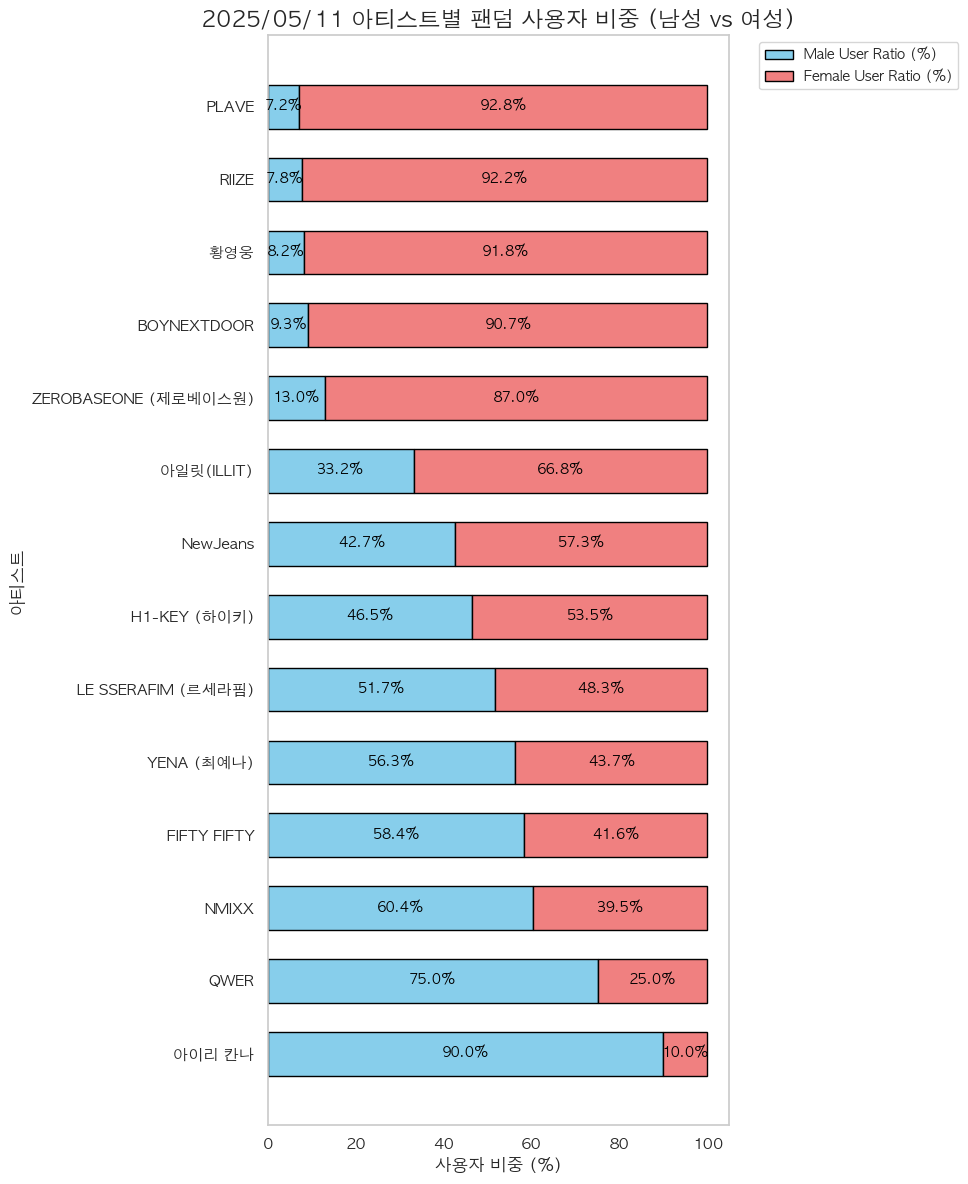

In [126]:
import pandas as pd
import matplotlib.pyplot as plt

# 'dt' 컬럼의 데이터 타입 확인 및 변환
if fandom_user_gndr['dt'].dtype == 'object':
    fandom_user_gndr['dt'] = pd.to_datetime(fandom_user_gndr['dt'], errors='coerce')

# 2025/05/11 데이터 필터링
latest_date = '2025-05-11'
filtered_data = fandom_user_gndr[fandom_user_gndr['dt'] == latest_date].copy()

# 여성 사용자 비중과 남성 사용자 비중 계산
#filtered_data['female_user_ratio'] = (filtered_data['female_user_cnt'] / filtered_data['user_cnt']) * 100
filtered_data['male_user_ratio'] = (filtered_data['male_user_cnt'] / filtered_data['user_cnt']) * 100

# 여성 사용자 상관계수 기준으로 내림차순 정렬
filtered_data = filtered_data.sort_values(by='female_user_ratio', ascending=True)

# 스택형 바 플롯 생성 (x축과 y축 전환)
plt.figure(figsize=(10, 12))
bar_width = 0.6

# 남성 사용자 비중과 여성 사용자 비중 데이터
male_ratios = filtered_data['male_user_ratio']
female_ratios = filtered_data['female_user_ratio']
artists = filtered_data['artist_name_web_list']

# 스택형 바 플롯 (x축과 y축 전환)
plt.barh(artists, male_ratios, label='Male User Ratio (%)', color='skyblue', edgecolor='black', height=bar_width)
plt.barh(artists, female_ratios, left=male_ratios, label='Female User Ratio (%)', color='lightcoral', edgecolor='black', height=bar_width)

# 영역별 비율 표시
for i, (male, female) in enumerate(zip(male_ratios, female_ratios)):
    plt.text(male / 2, i, f'{male:.1f}%', ha='center', va='center', fontsize=10, color='black')  # 남성 비율
    plt.text(male + female / 2, i, f'{female:.1f}%', ha='center', va='center', fontsize=10, color='black')  # 여성 비율

# 그래프 꾸미기
plt.title('2025/05/11 아티스트별 팬덤 사용자 비중 (남성 vs 여성)', fontsize=16)
plt.xlabel('사용자 비중 (%)', fontsize=12)
plt.ylabel('아티스트', fontsize=12)
plt.legend(fontsize=10, loc='upper left', bbox_to_anchor=(1.05, 1))  # 레전드를 그래프 바깥으로 이동
plt.tight_layout()

# 그래프 출력
plt.show()

datetime64[ns]


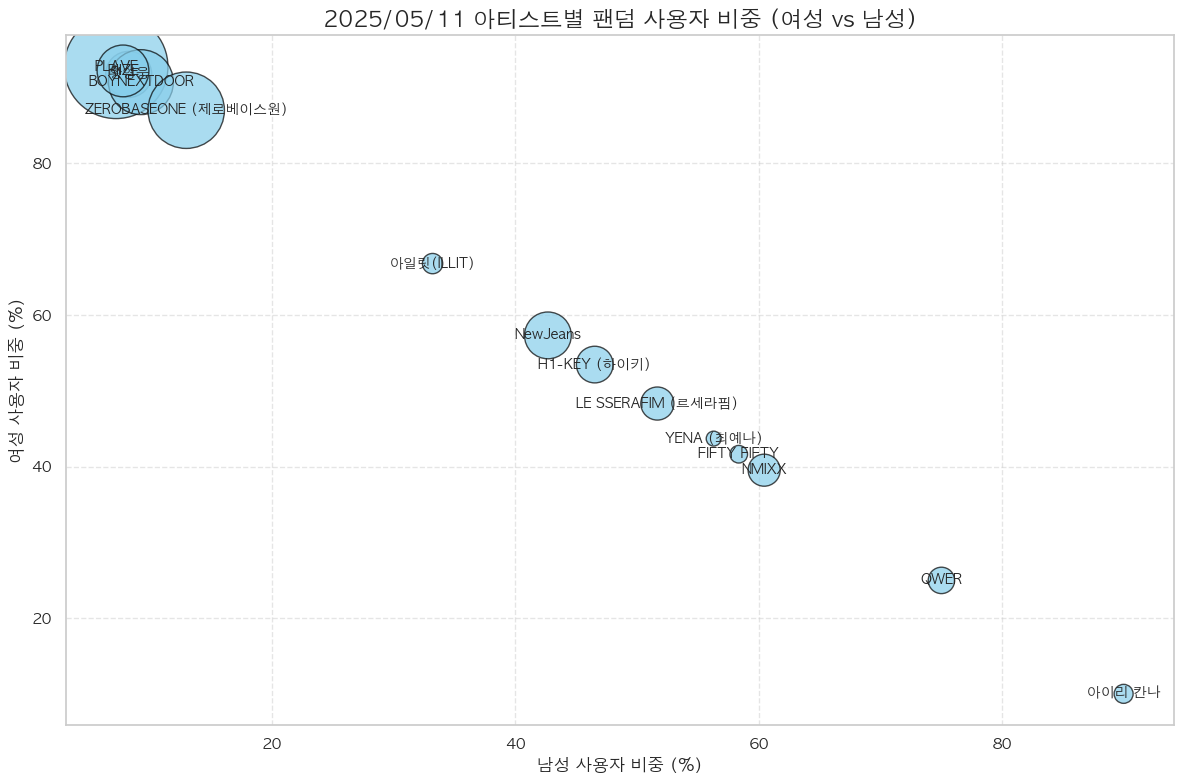

In [116]:
import pandas as pd
import matplotlib.pyplot as plt

# 'dt' 컬럼의 데이터 타입 확인
print(fandom_user_gndr['dt'].dtype)

# 'dt' 컬럼이 문자열이라면 datetime으로 변환
if fandom_user_gndr['dt'].dtype == 'object':
    fandom_user_gndr['dt'] = pd.to_datetime(fandom_user_gndr['dt'], errors='coerce')

# 2025/05/11 데이터 필터링
latest_date = '2025-05-11'
filtered_data = fandom_user_gndr[fandom_user_gndr['dt'] == latest_date].copy()

# 여성 사용자 비중과 남성 사용자 비중 계산
filtered_data['female_user_ratio'] = (filtered_data['female_user_cnt'] / filtered_data['user_cnt']) * 100
filtered_data['male_user_ratio'] = (filtered_data['male_user_cnt'] / filtered_data['user_cnt']) * 100

# Scatter plot 생성
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    filtered_data['male_user_ratio'], 
    filtered_data['female_user_ratio'],     
    s=filtered_data['user_cnt'] / 10,  # 팬덤 사용자 수에 비례한 점 크기
    alpha=0.7, 
    c='skyblue', 
    edgecolor='black'
)

# 각 점에 아티스트 이름 추가
for i, row in filtered_data.iterrows():
    plt.text(
        row['male_user_ratio'], 
        row['female_user_ratio'],         
        row['artist_name_web_list'], 
        fontsize=10, 
        ha='center', 
        va='center'
    )

# 그래프 꾸미기
plt.title('2025/05/11 아티스트별 팬덤 사용자 비중 (여성 vs 남성)', fontsize=16)
plt.xlabel('남성 사용자 비중 (%)', fontsize=12)
plt.ylabel('여성 사용자 비중 (%)', fontsize=12)
plt.grid(alpha=0.5, linestyle='--')
plt.tight_layout()

# 그래프 출력
plt.show()

object


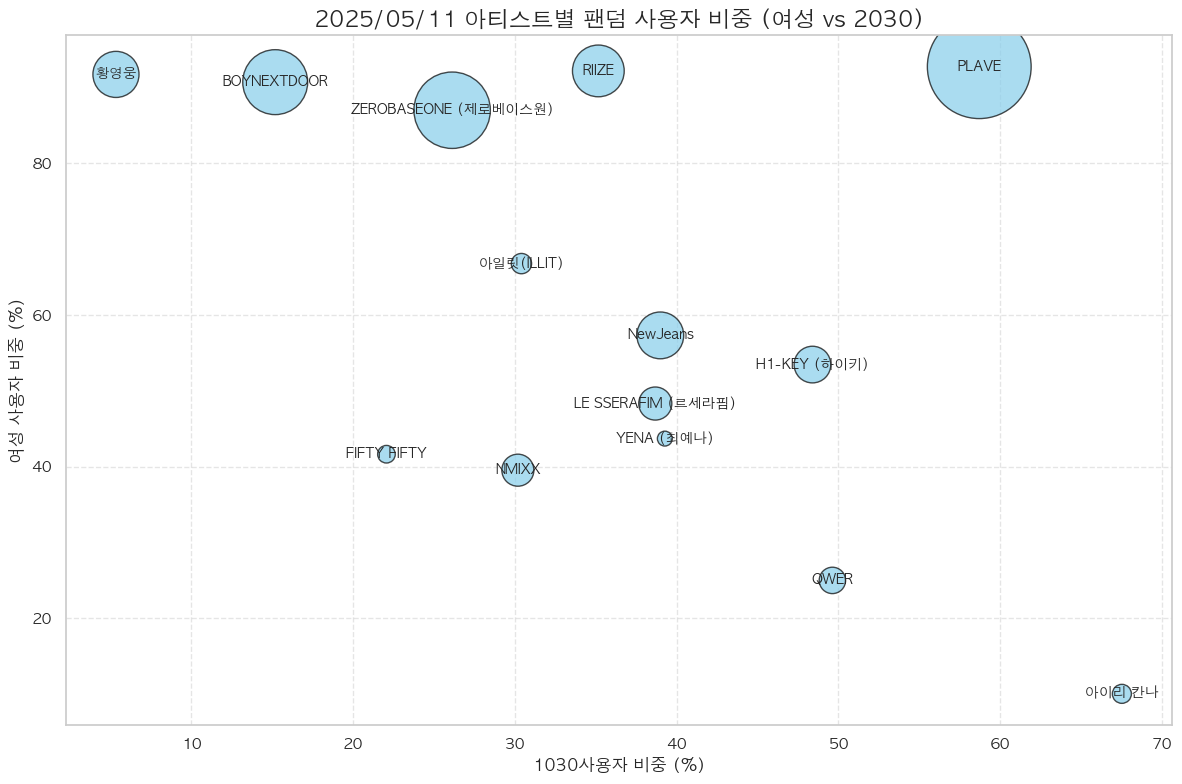

In [128]:
import pandas as pd
import matplotlib.pyplot as plt

# 'dt' 컬럼의 데이터 타입 확인
print(fandom_user_gndr['dt'].dtype)

# 'dt' 컬럼이 문자열이라면 datetime으로 변환
if fandom_user_gndr['dt'].dtype == 'object':
    fandom_user_gndr['dt'] = pd.to_datetime(fandom_user_gndr['dt'], errors='coerce')

# 2025/05/11 데이터 필터링
latest_date = '2025-05-11'
filtered_data = fandom_user_gndr[fandom_user_gndr['dt'] == latest_date].copy()


# Scatter plot 생성
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    filtered_data['age_102030_user_ratio'], 
    filtered_data['female_user_ratio'],     
    s=filtered_data['user_cnt'] / 10,  # 팬덤 사용자 수에 비례한 점 크기
    alpha=0.7, 
    c='skyblue', 
    edgecolor='black'
)

# 각 점에 아티스트 이름 추가
for i, row in filtered_data.iterrows():
    plt.text(
        row['age_102030_user_ratio'], 
        row['female_user_ratio'],         
        row['artist_name_web_list'], 
        fontsize=10, 
        ha='center', 
        va='center'
    )

# 그래프 꾸미기
plt.title('2025/05/11 아티스트별 팬덤 사용자 비중 (여성 vs 2030)', fontsize=16)
plt.xlabel('1030사용자 비중 (%)', fontsize=12)
plt.ylabel('여성 사용자 비중 (%)', fontsize=12)
plt.grid(alpha=0.5, linestyle='--')
plt.tight_layout()

# 그래프 출력
plt.show()